# Example 1.4 | Panel Data

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Data

In [3]:
sales = pd.read_csv('data/Coffee_Sales_Reciepts_raw.csv')

def time_to_hour(time_str):
    """ Convert 'HH:MM:SS' to hour. """
    h, m, s = map(int, time_str.split(':'))
    return h
sales['Hours'] = sales.transaction_time.apply(time_to_hour)

def rename_shop(name):
    shop_name_dict = {3:'Shop A', 5:'Shop B', 8:'Shop C'}
    return shop_name_dict[name]
sales['Shop'] = sales['sales_outlet_id'].apply(rename_shop)

# Remove late day transations from Shop C for a better example
sales = sales[~( (sales.Shop == 'Shop C') & (sales.Hours > 15) )]

# Simplify dataset for example
sales = sales[['transaction_id', 'staff_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'Hours', 'Shop']]

sales.to_csv('data/Coffee_Sales_Reciepts.csv')

In [4]:
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv', index_col=0)
large_sales = sales[sales.quantity > 1]
large_sales.to_csv('data/Coffee_Sales_Reciepts_Large.csv')

## Concept

#### Coffee Shop Transactions

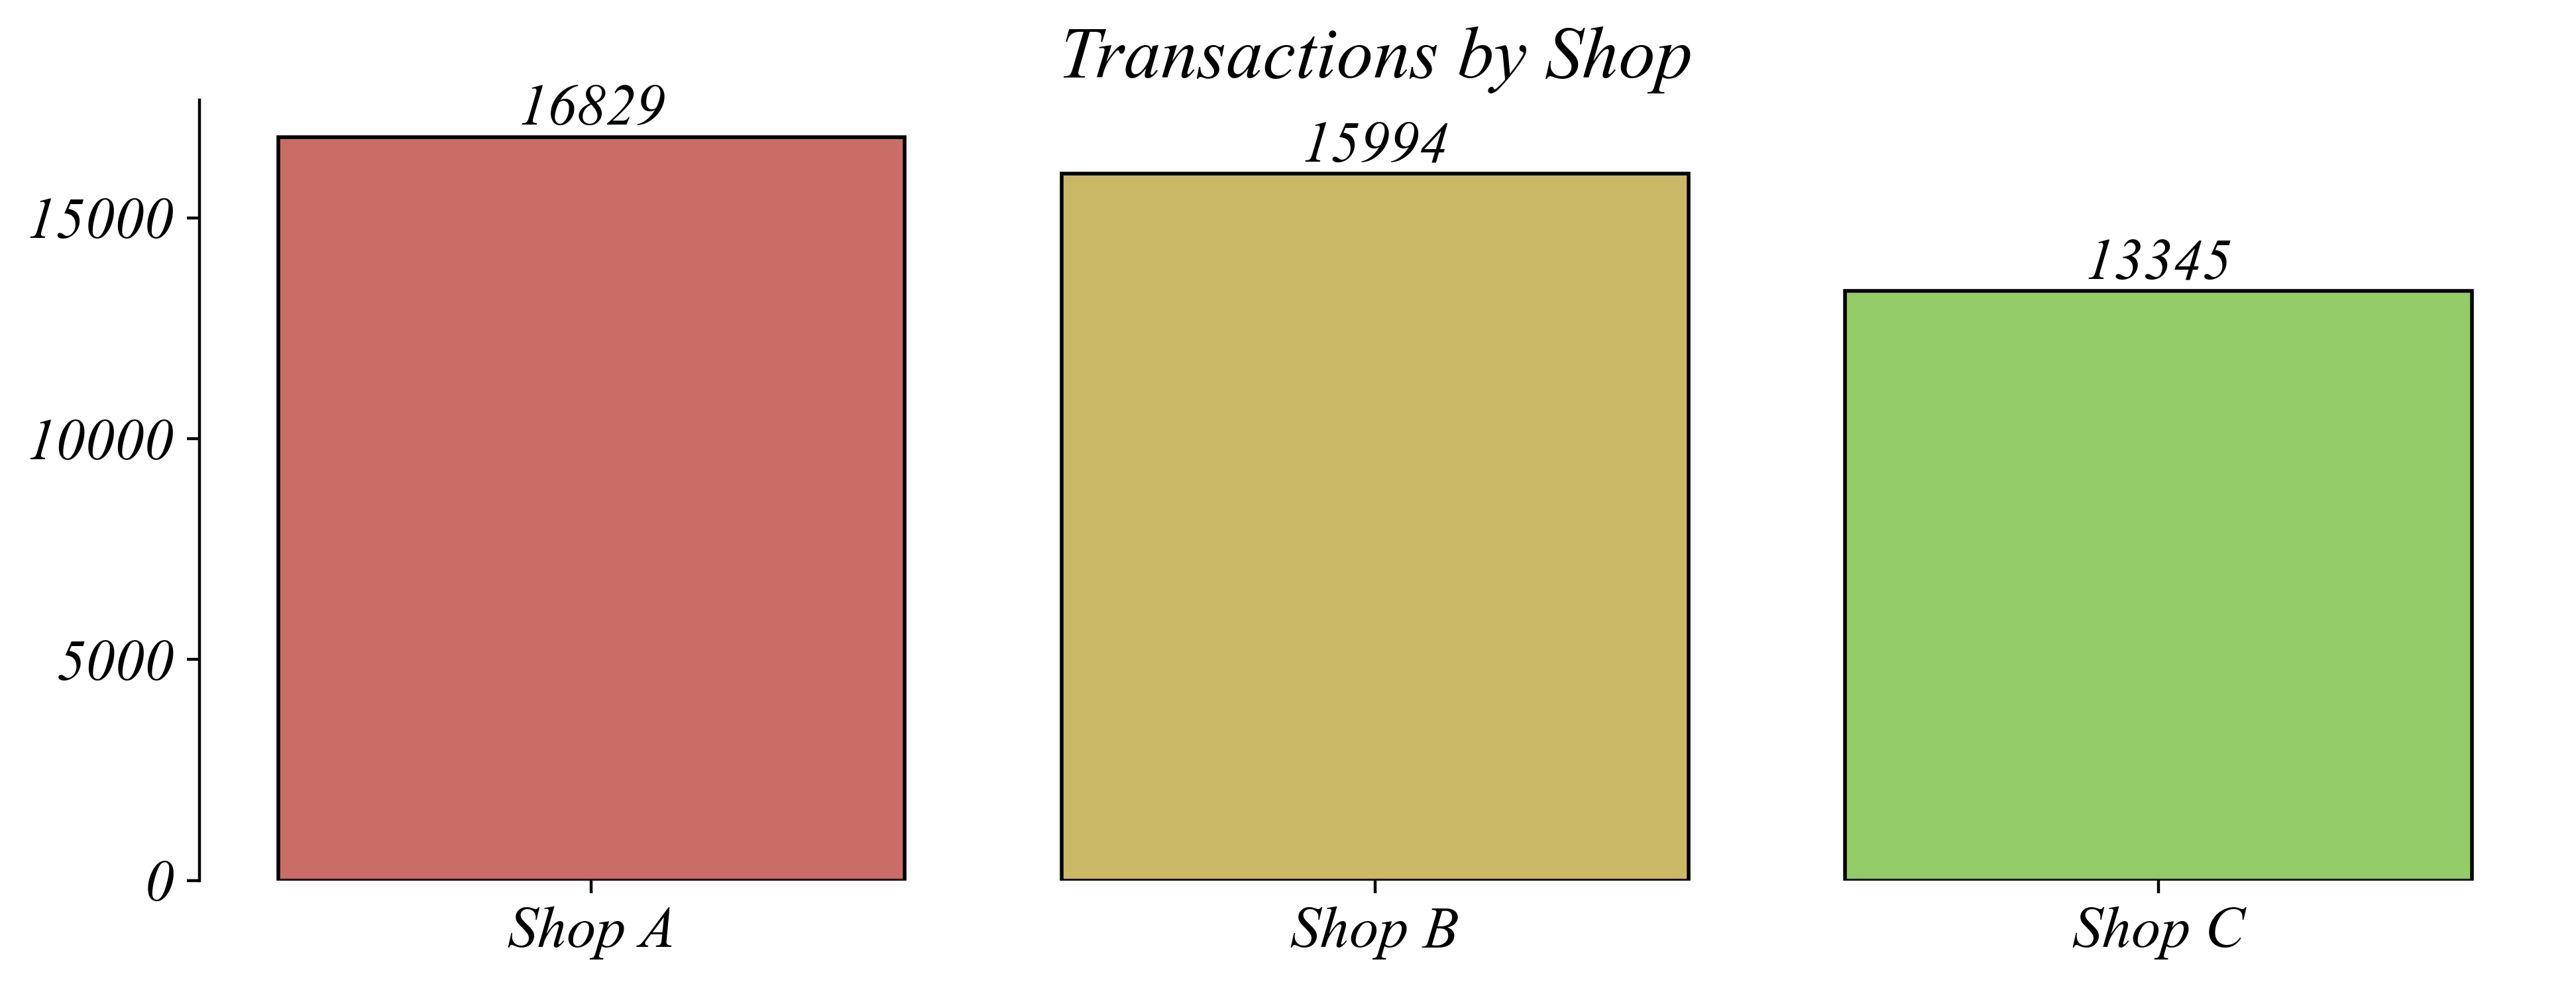

In [25]:
# Load Dataset
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv')

# Figure
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=sales, x='Shop', hue='Shop', palette=category_color_pal[:3], edgecolor='black', legend=False)
for bar in ax.containers:
    ax.bar_label(bar)

# Styling
plt.ylabel('')
plt.xlabel('')
plt.title('Transactions by Shop')
sns.despine(top=True, right=True, bottom=True)
plt.tight_layout()

plt.savefig('i/i_01.png')

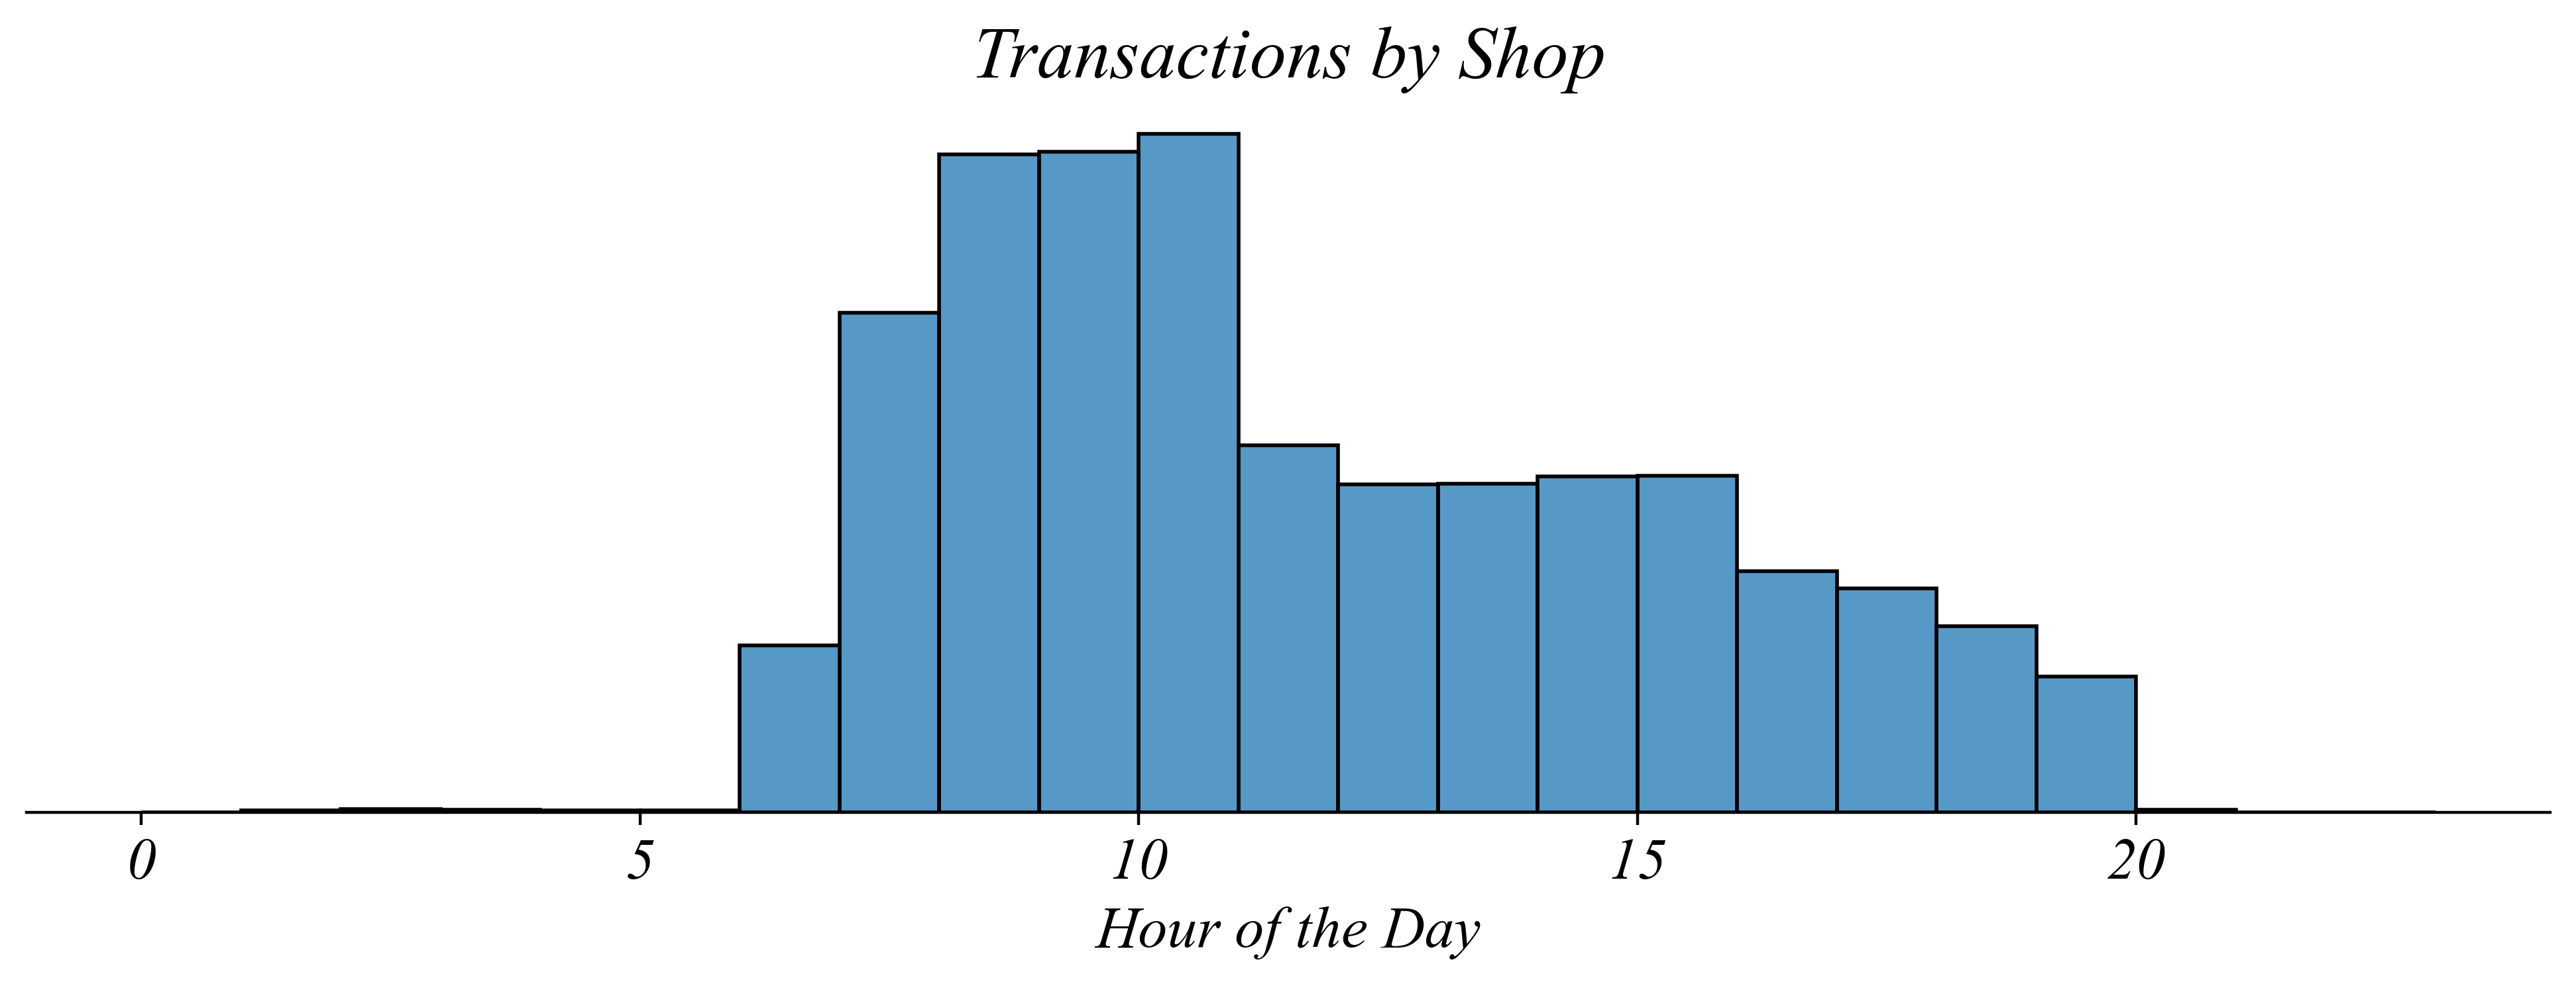

In [33]:
# Load Dataset
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=sales, x='Hours', bins=range(0,24,1), edgecolor='black')

# Styling
plt.ylabel('')
plt.yticks([])
plt.xlabel('Hour of the Day')
plt.title('Transactions by Shop')
sns.despine(top=True, right=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_02.png')

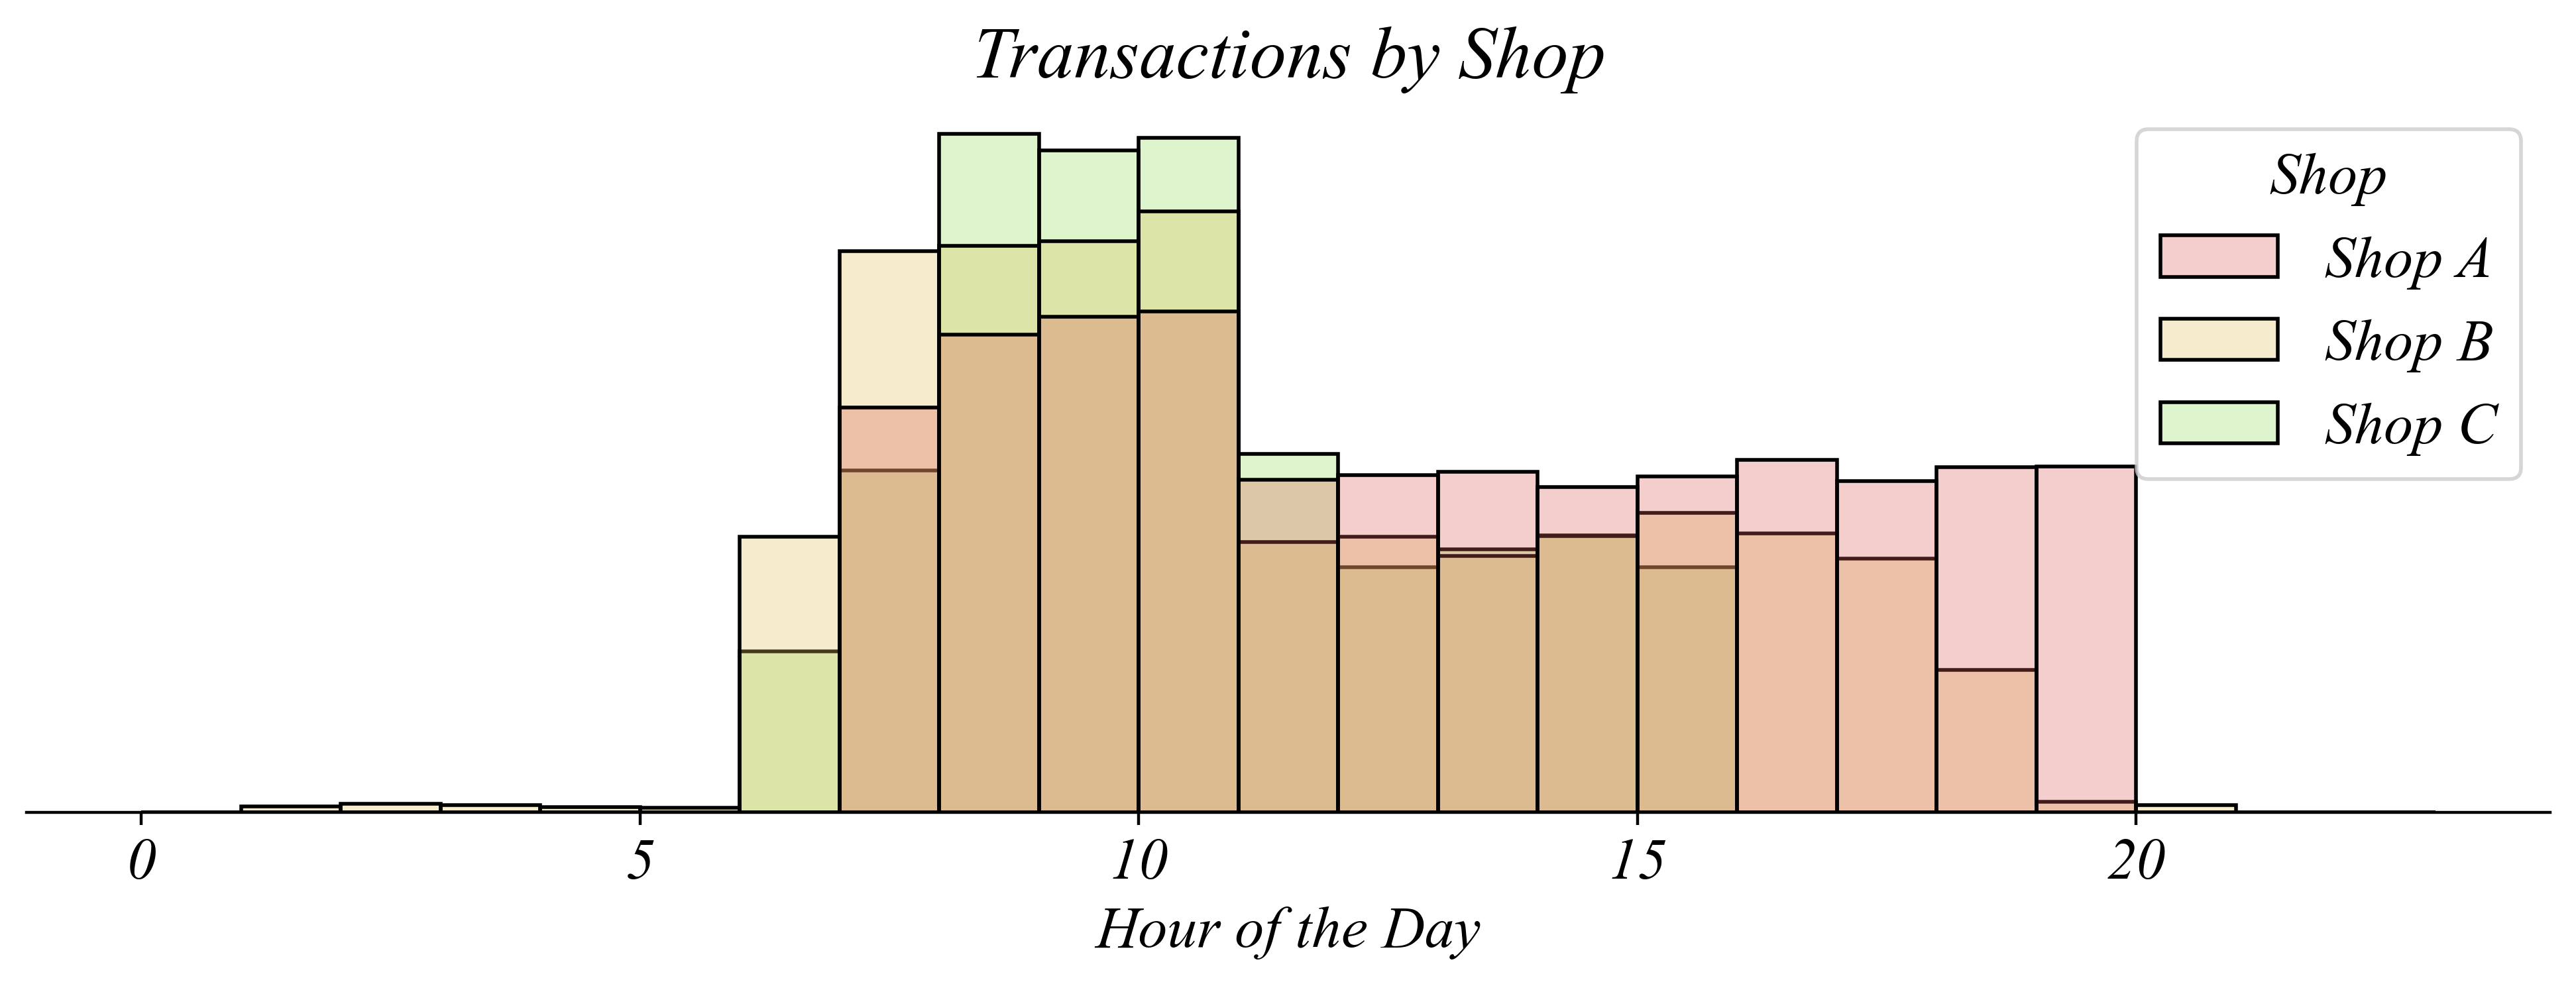

In [33]:
# Load Dataset
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=sales, x='Hours', hue='Shop', palette=category_color_pal[:3], alpha=0.3, bins=range(0,24,1), edgecolor='black')

# Styling
plt.ylabel('')
plt.yticks([])
plt.xlabel('Hour of the Day')
plt.title('Transactions by Shop')
sns.despine(top=True, right=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_03.png')

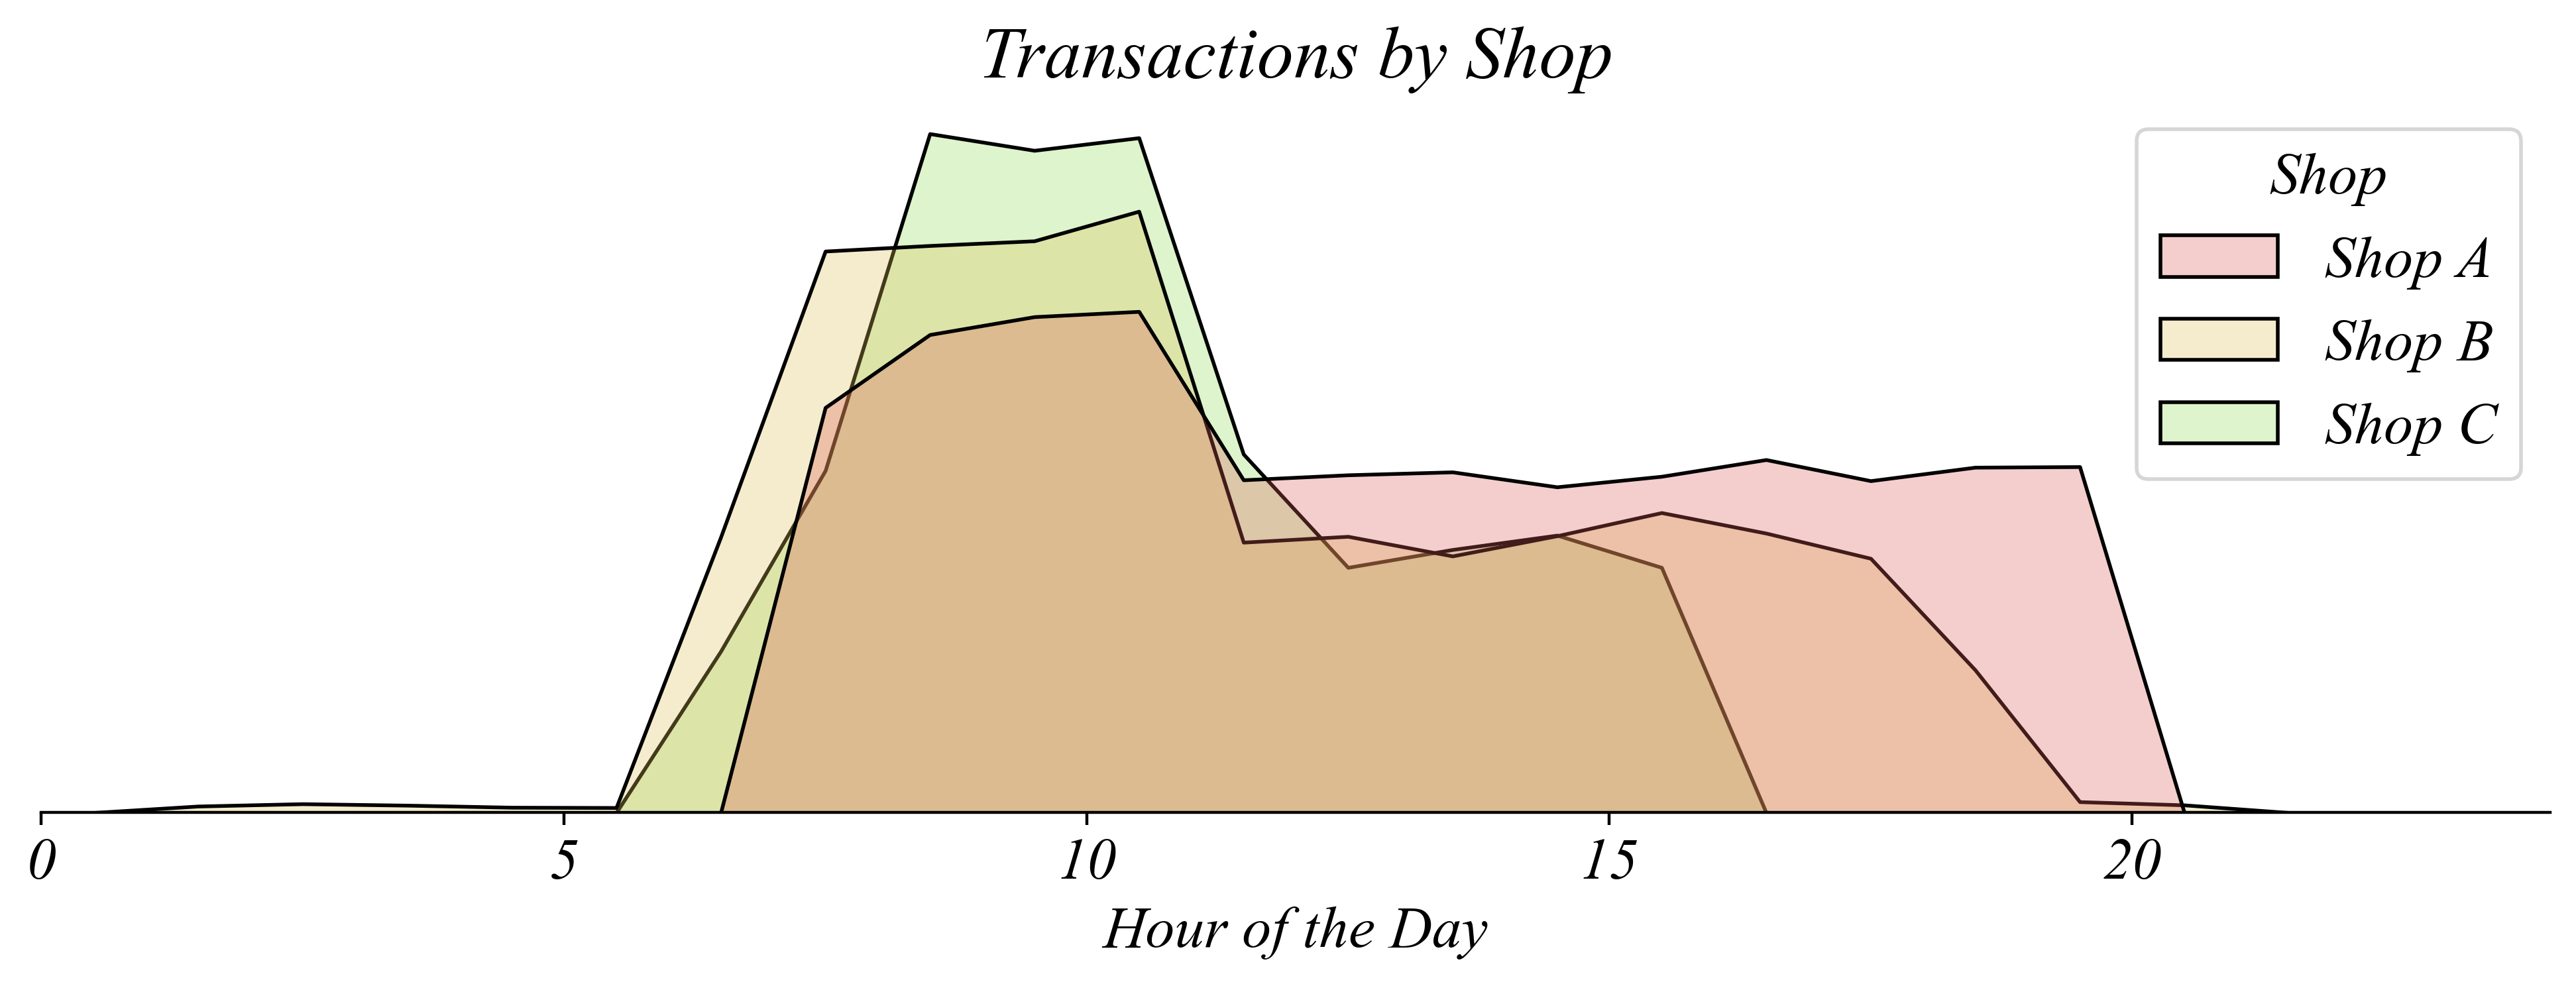

In [35]:
# Load Dataset
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv')

# Create hourly counts by shop
hourly_counts = sales.groupby(['Shop', 'Hours']).size().reset_index(name='Count')

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=sales, x='Hours', hue='Shop', palette=category_color_pal[:3], alpha=0.3, bins=range(0,24,1), edgecolor='black', element='poly')

# Styling
plt.ylabel('')
plt.yticks([])
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Transactions by Shop')
sns.despine(top=True, right=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_04.png')

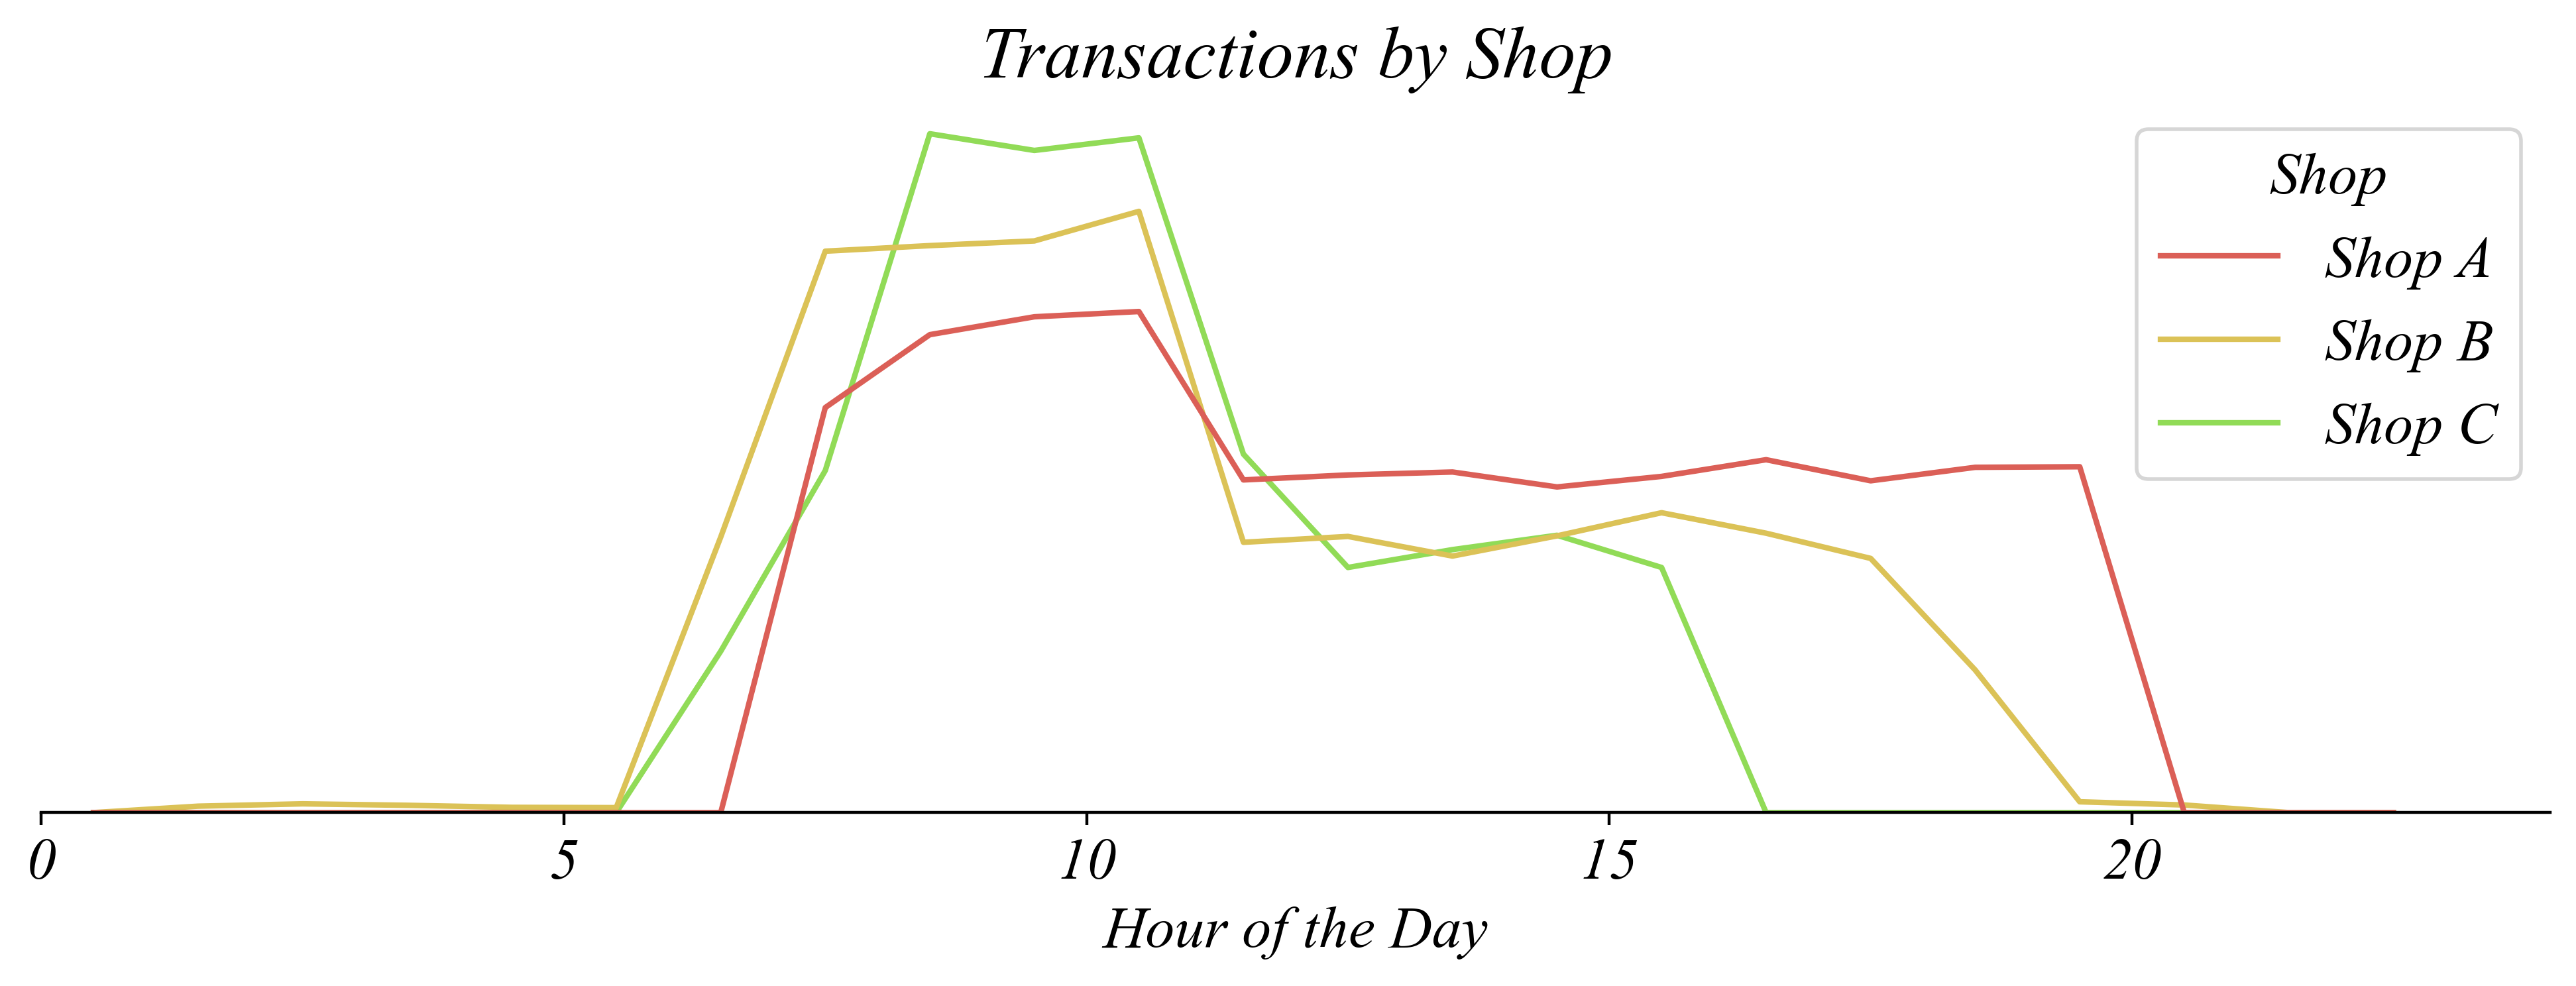

In [41]:
# Load Dataset
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv')

# Create hourly counts by shop
hourly_counts = sales.groupby(['Shop', 'Hours']).size().reset_index(name='Count')

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=sales, x='Hours', hue='Shop', bins=range(0,24,1), element='poly', fill=False,
             palette=category_color_pal[:3])

# Styling
plt.ylabel('')
plt.yticks([])
plt.xlim(0,24)
plt.xlabel('Hour of the Day')
plt.title('Transactions by Shop')
sns.despine(top=True, right=True, left=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_05.png')

In [56]:
# Load Dataset
sales = pd.read_csv('data/Coffee_Sales_Reciepts.csv')

# Create hourly counts by shop
sales.groupby(['Shop', 'Hours']).size().reset_index(name='Count')

Shop  Hours  Count
0   Shop A      7   1383
1   Shop A      8   1632
2   Shop A      9   1693
3   Shop A     10   1711
4   Shop A     11   1136
5   Shop A     12   1153
6   Shop A     13   1163
7   Shop A     14   1112
8   Shop A     15   1148
9   Shop A     16   1205
10  Shop A     17   1133
11  Shop A     18   1179
12  Shop A     19   1181
13  Shop B      1     22
14  Shop B      2     30
15  Shop B      3     25
16  Shop B      4     18
17  Shop B      5     17
18  Shop B      6    941
19  Shop B      7   1917
20  Shop B      8   1936
21  Shop B      9   1952
22  Shop B     10   2053
23  Shop B     11    923
24  Shop B     12    943
25  Shop B     13    876
26  Shop B     14    945
27  Shop B     15   1024
28  Shop B     16    954
29  Shop B     17    868
30  Shop B     18    487
31  Shop B     19     37
32  Shop B     20     26
33  Shop C      6    551
34  Shop C      7   1168
35  Shop C      8   2318
36  Shop C      9   2261
37  Shop C     10   2304
38  Shop C     11   1224
39  Shop C     12    837
40  Shop C     13    898
41  Shop C     14    947
42  Shop C     15    837

#### Wide Format Panel: Coffee Consumption

In [4]:
import pandas as pd
import numpy as np

In [6]:
coffee = pd.read_csv('data/Coffee_Consumption/Coffee_importers_consumption.csv')
population = pd.read_csv('data/Population_By_Country/population.csv')
population.rename(columns={'Country Name':'Country', 'Country Code': 'Code'}, inplace=True)
pre_cap = coffee.merge(population, on='Code', how='inner')
years = ['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019']
percap = pd.DataFrame(pre_cap['Code'].values, columns=['Code'])
for year in years:
    percap[year] = pre_cap[year+'_x']/pre_cap[year+'_y']
percap = percap[percap['Code'] != 'BEL']

percap.to_csv('data/Coffee_Per_Cap.csv')

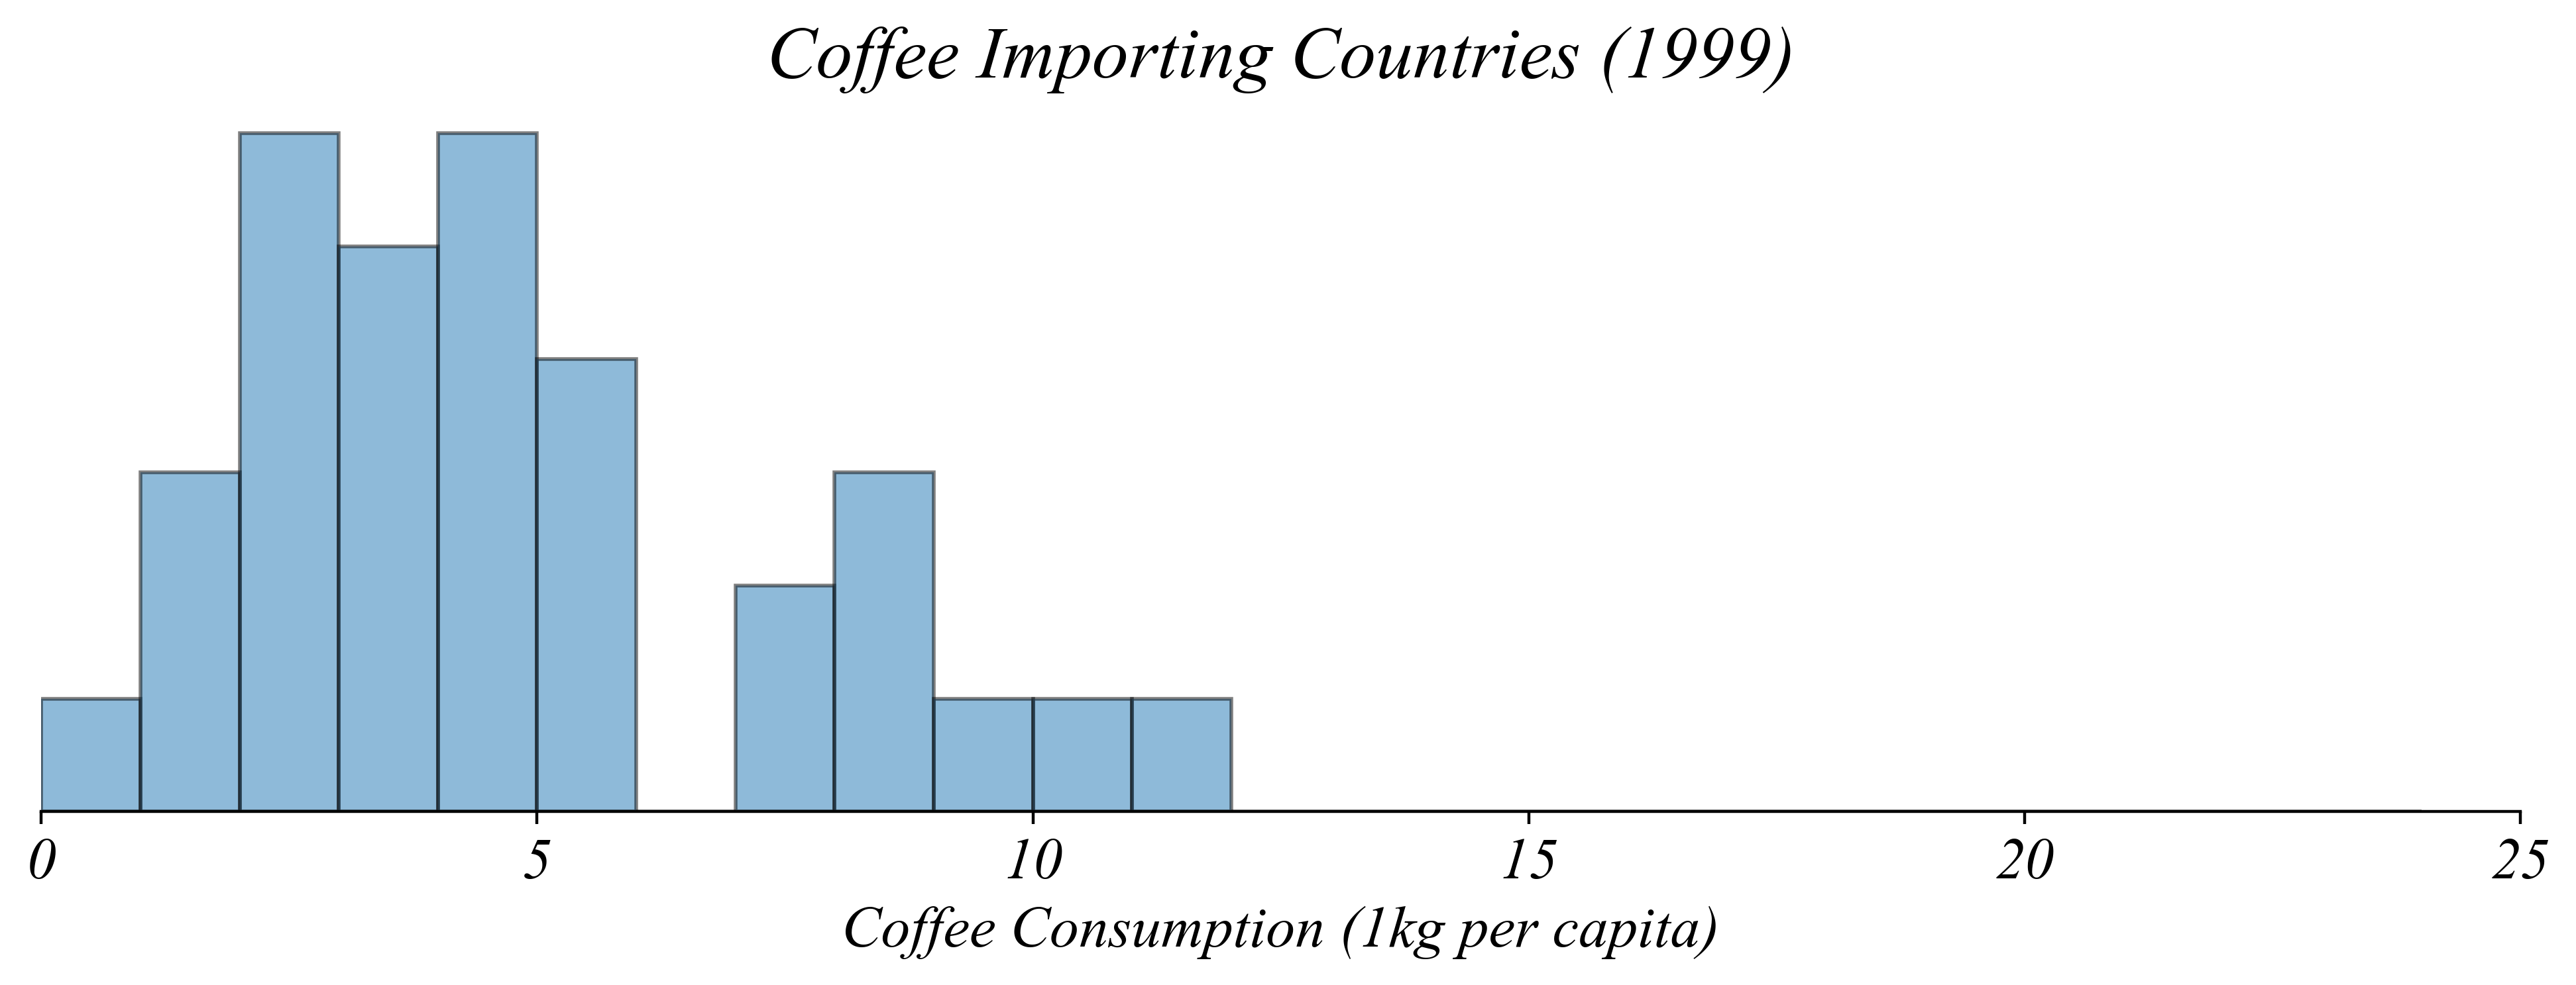

In [9]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
bin_edges = np.arange(0, 25, 1)

# Figure
plt.figure(figsize=(10, 4))
plt.hist(percap['1999'], bins=bin_edges, edgecolor='black', label = '1999', alpha=1/2)

# Styling
plt.title('Coffee Importing Countries (1999)')
plt.ylabel('')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.xlim(0,25)

plt.yticks([])
plt.grid(False)
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_06.png')

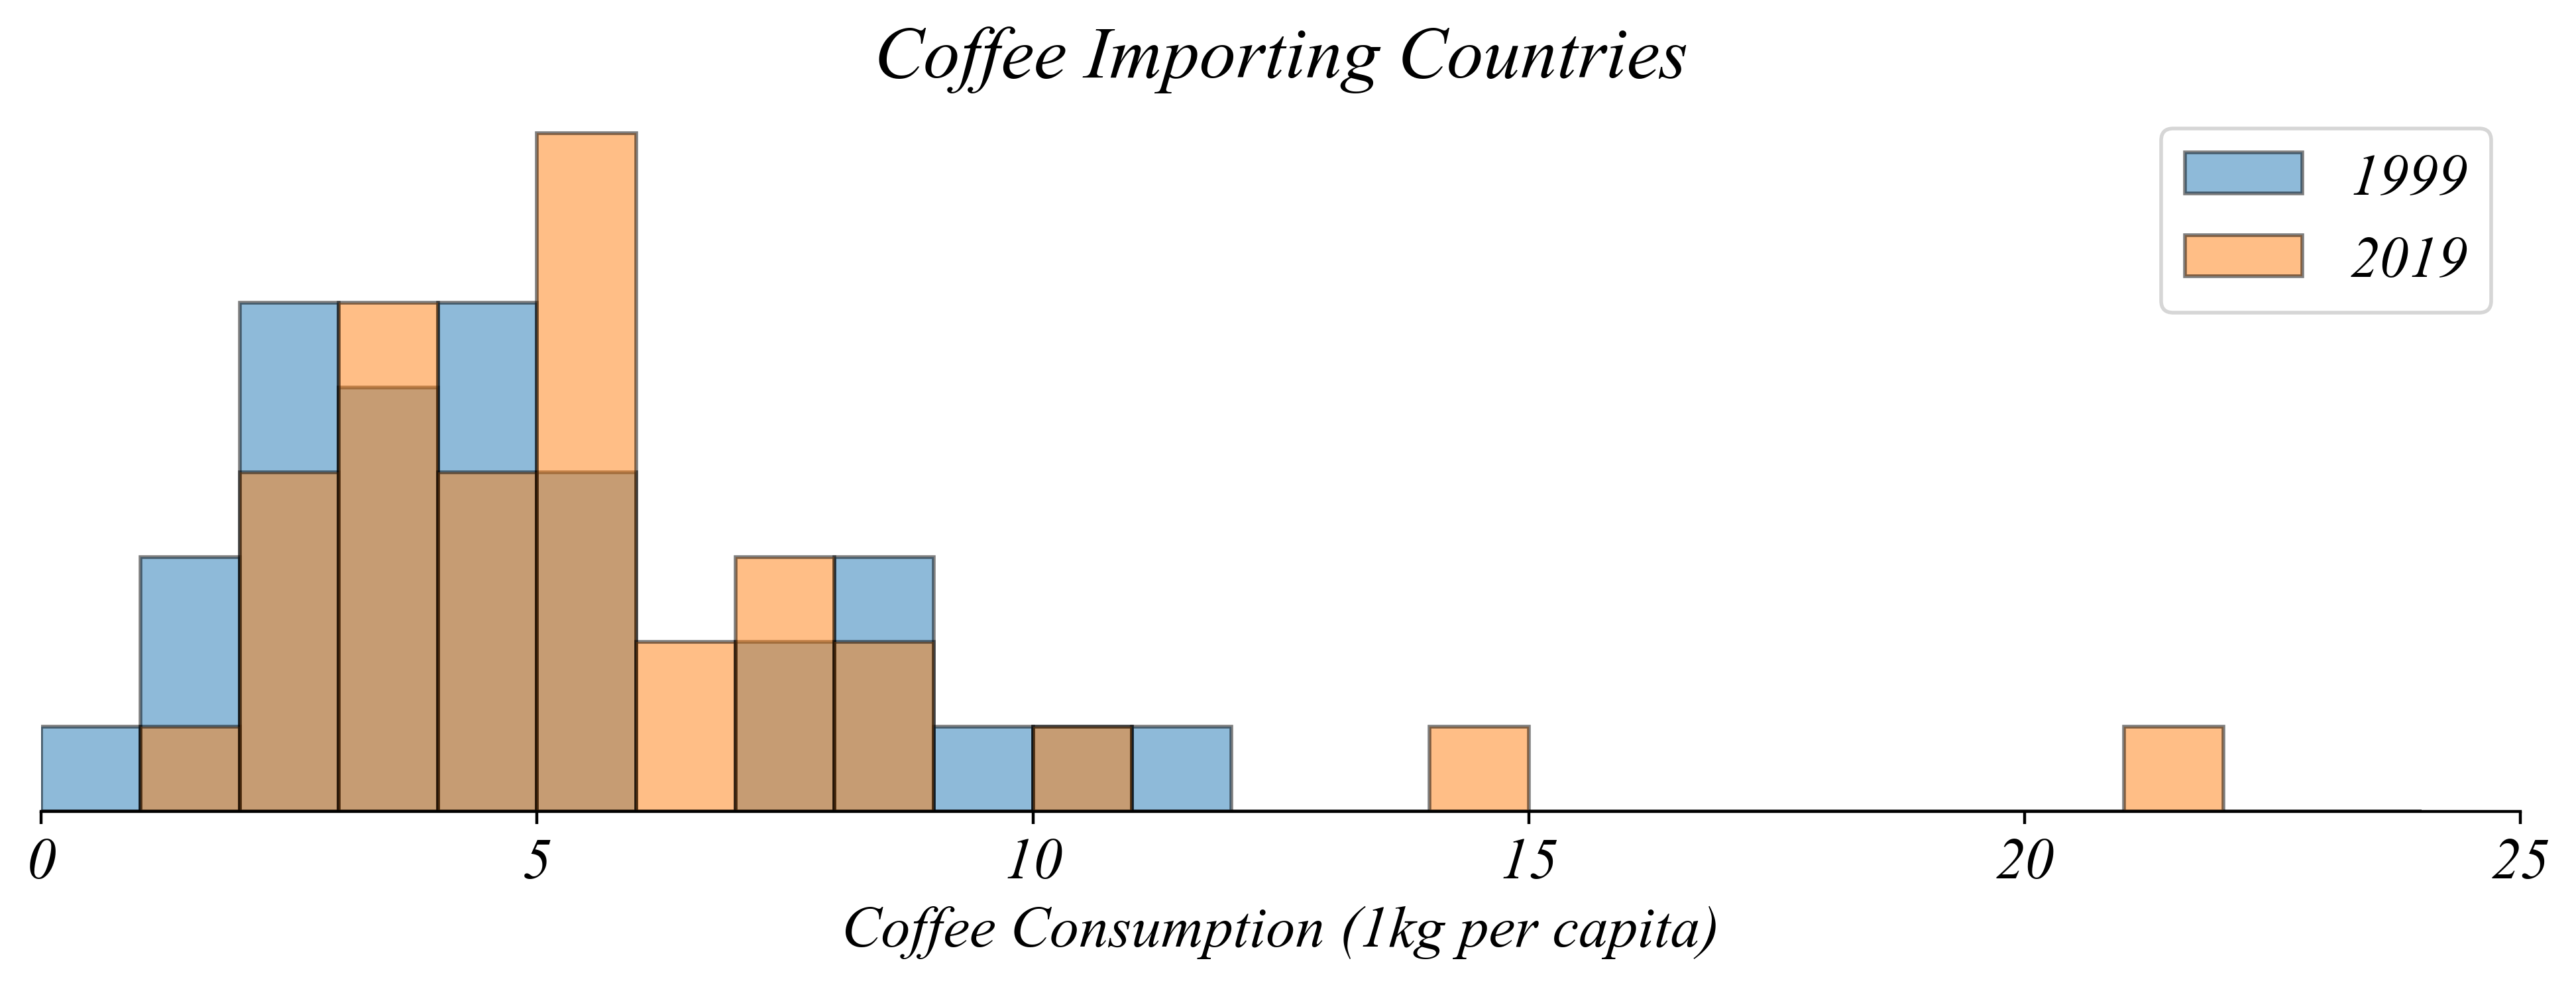

In [11]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
bin_edges = np.arange(0, 25, 1)

# Figure
plt.figure(figsize=(10, 4))
plt.hist(percap['1999'], bins=bin_edges, edgecolor='black', label = '1999', alpha=1/2)
plt.hist(percap['2019'], bins=bin_edges, edgecolor='black', label = '2019', alpha=1/2)

# Styling
plt.title('Coffee Importing Countries')
plt.ylabel('')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.xlim(0,25)

plt.yticks([])
plt.grid(False)
sns.despine(left=True, right=True, top=True)
plt.legend()
plt.tight_layout()

# Save Figure
plt.savefig('i/i_07.png')

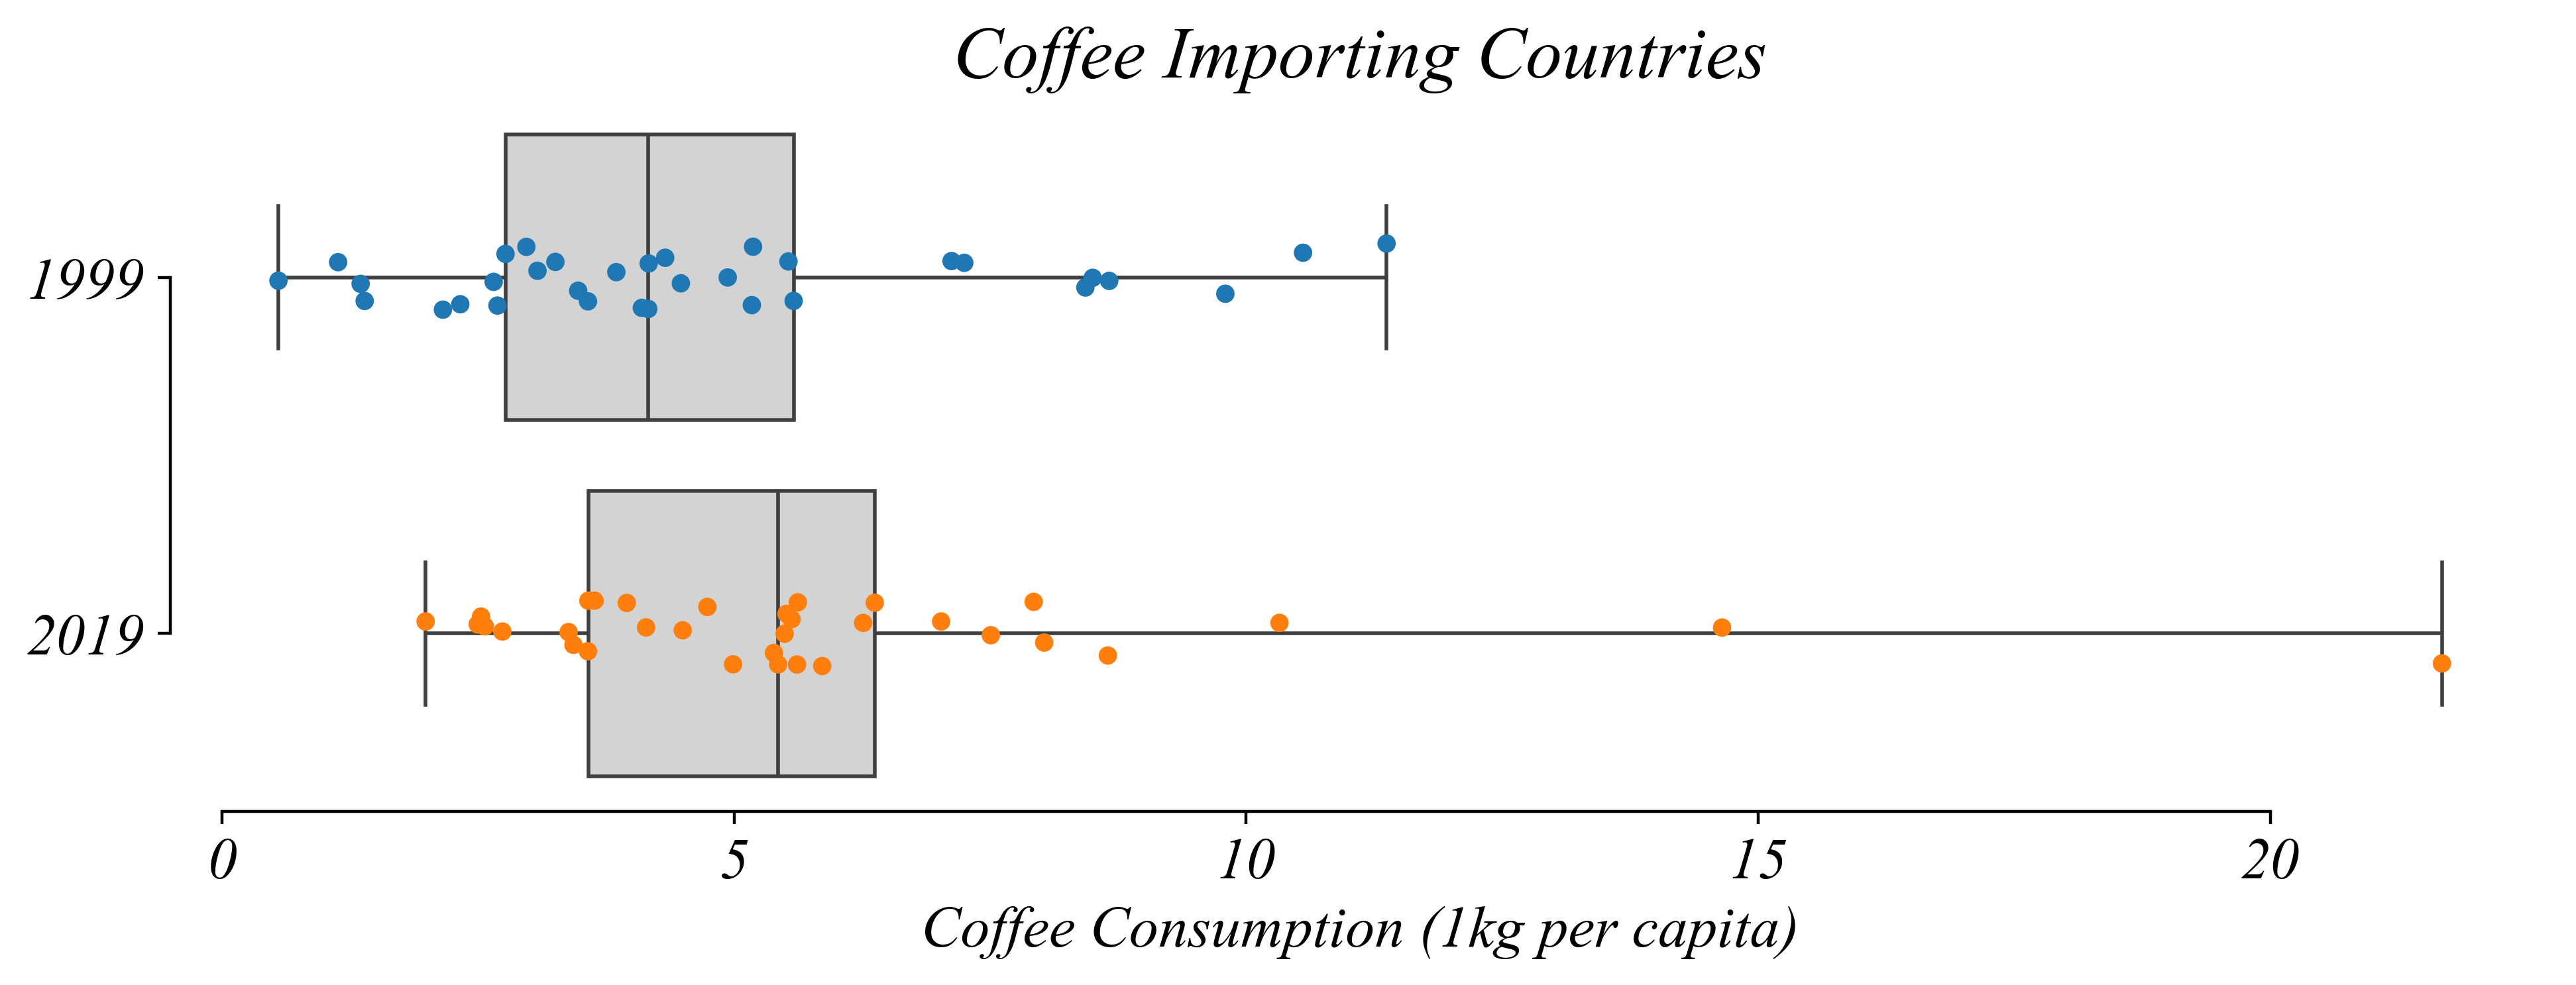

In [4]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[['1999','2019']], orient='h', color='lightgrey', whis=(0, 100))
sns.stripplot(percap[['1999','2019']], orient='h')

# Styling
plt.title('Coffee Importing Countries')
plt.ylabel('')
plt.xlabel('Coffee Consumption (1kg per capita)')

plt.grid(False)
sns.despine(left=False, right=True, top=True, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_08.png')

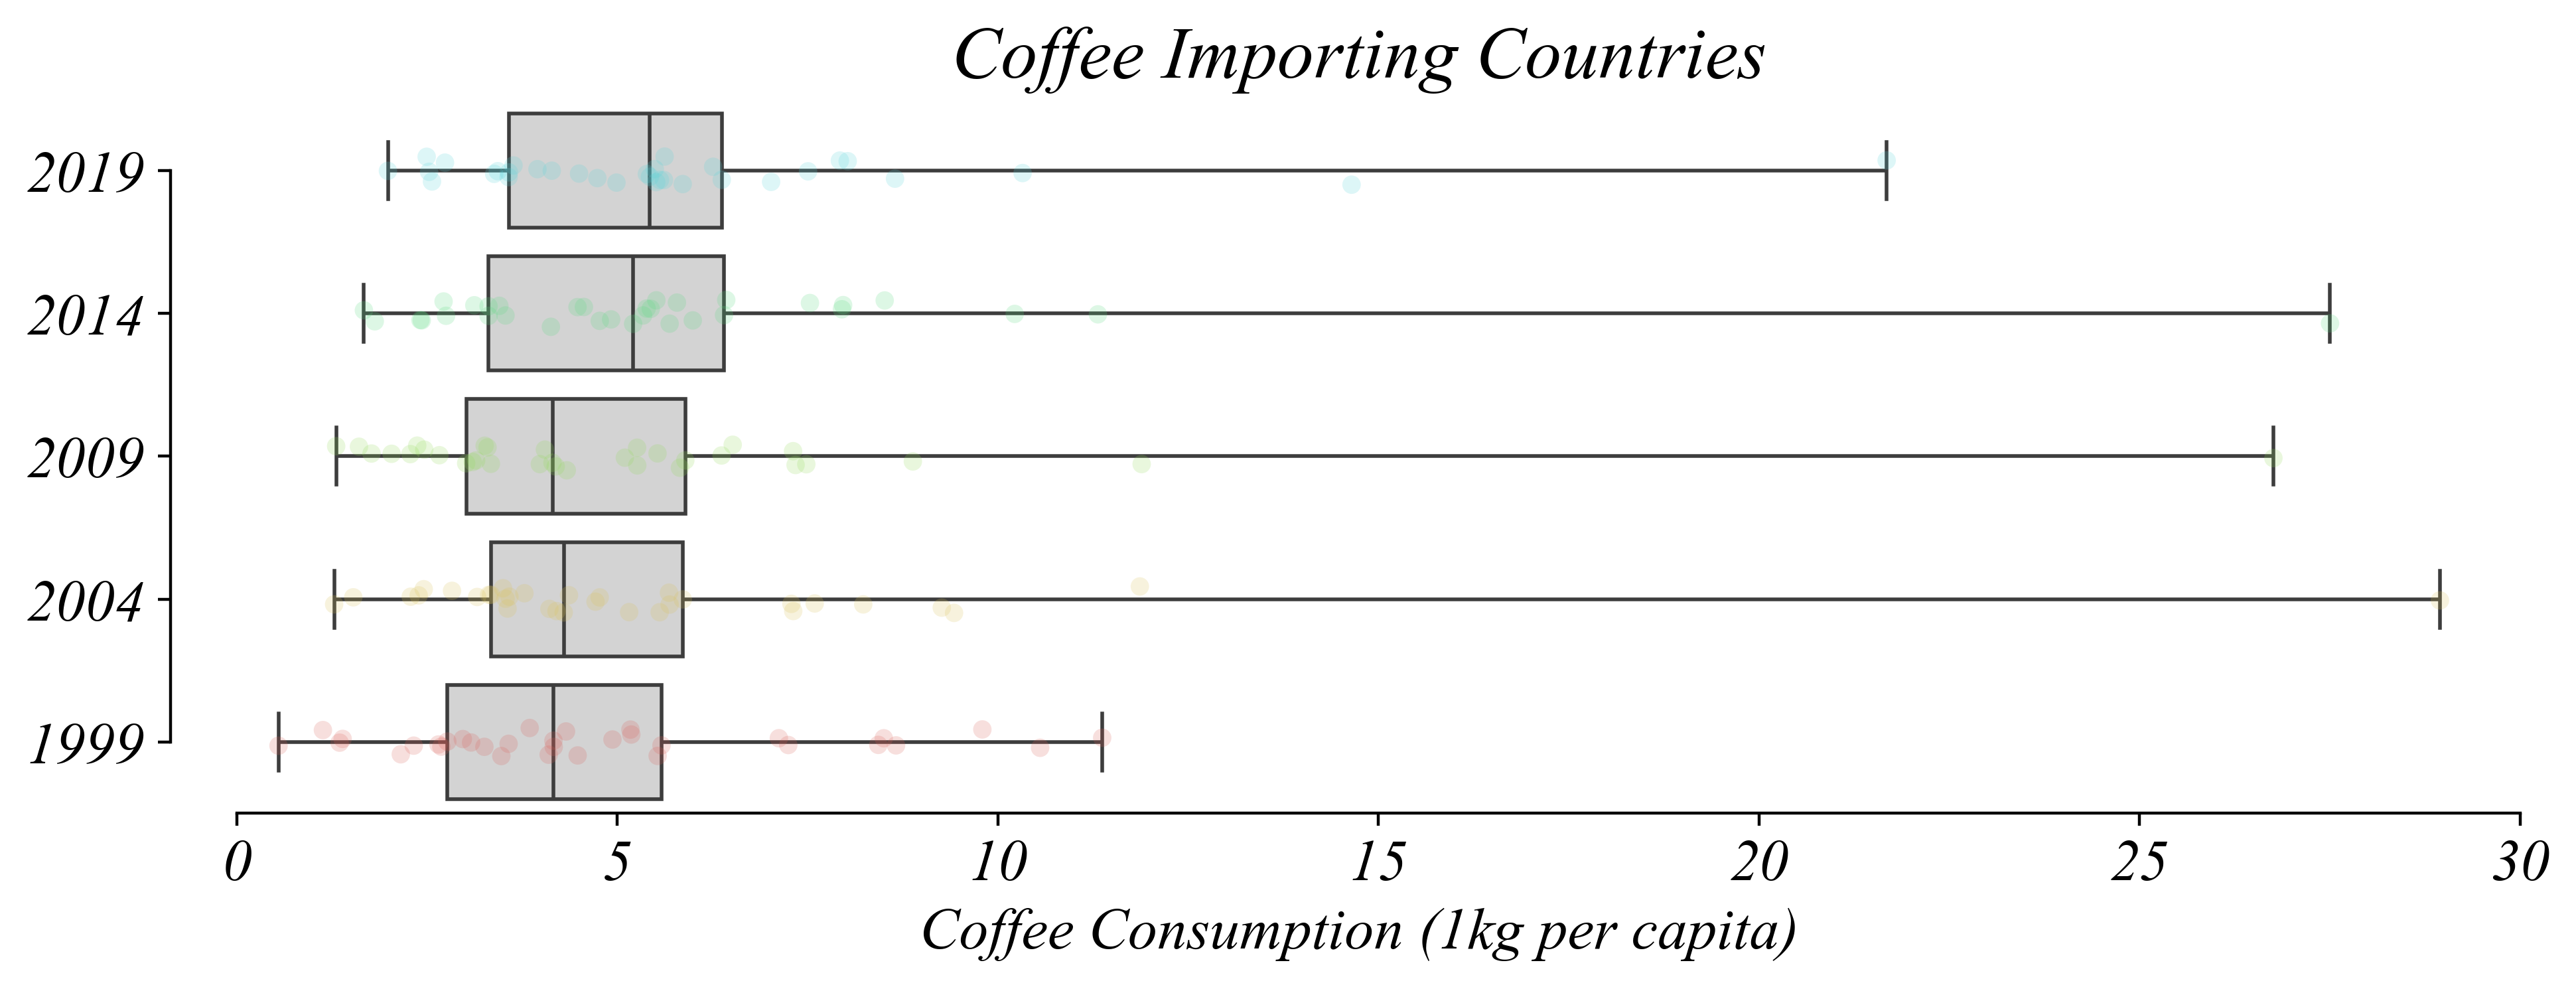

In [21]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[['1999','2004','2009','2014','2019']], orient='h', color='lightgrey', whis=(0, 100))
sns.stripplot(percap[['1999','2004','2009','2014','2019']], orient='h', palette=category_color_pal[:5], alpha=0.2)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_09_c.png')

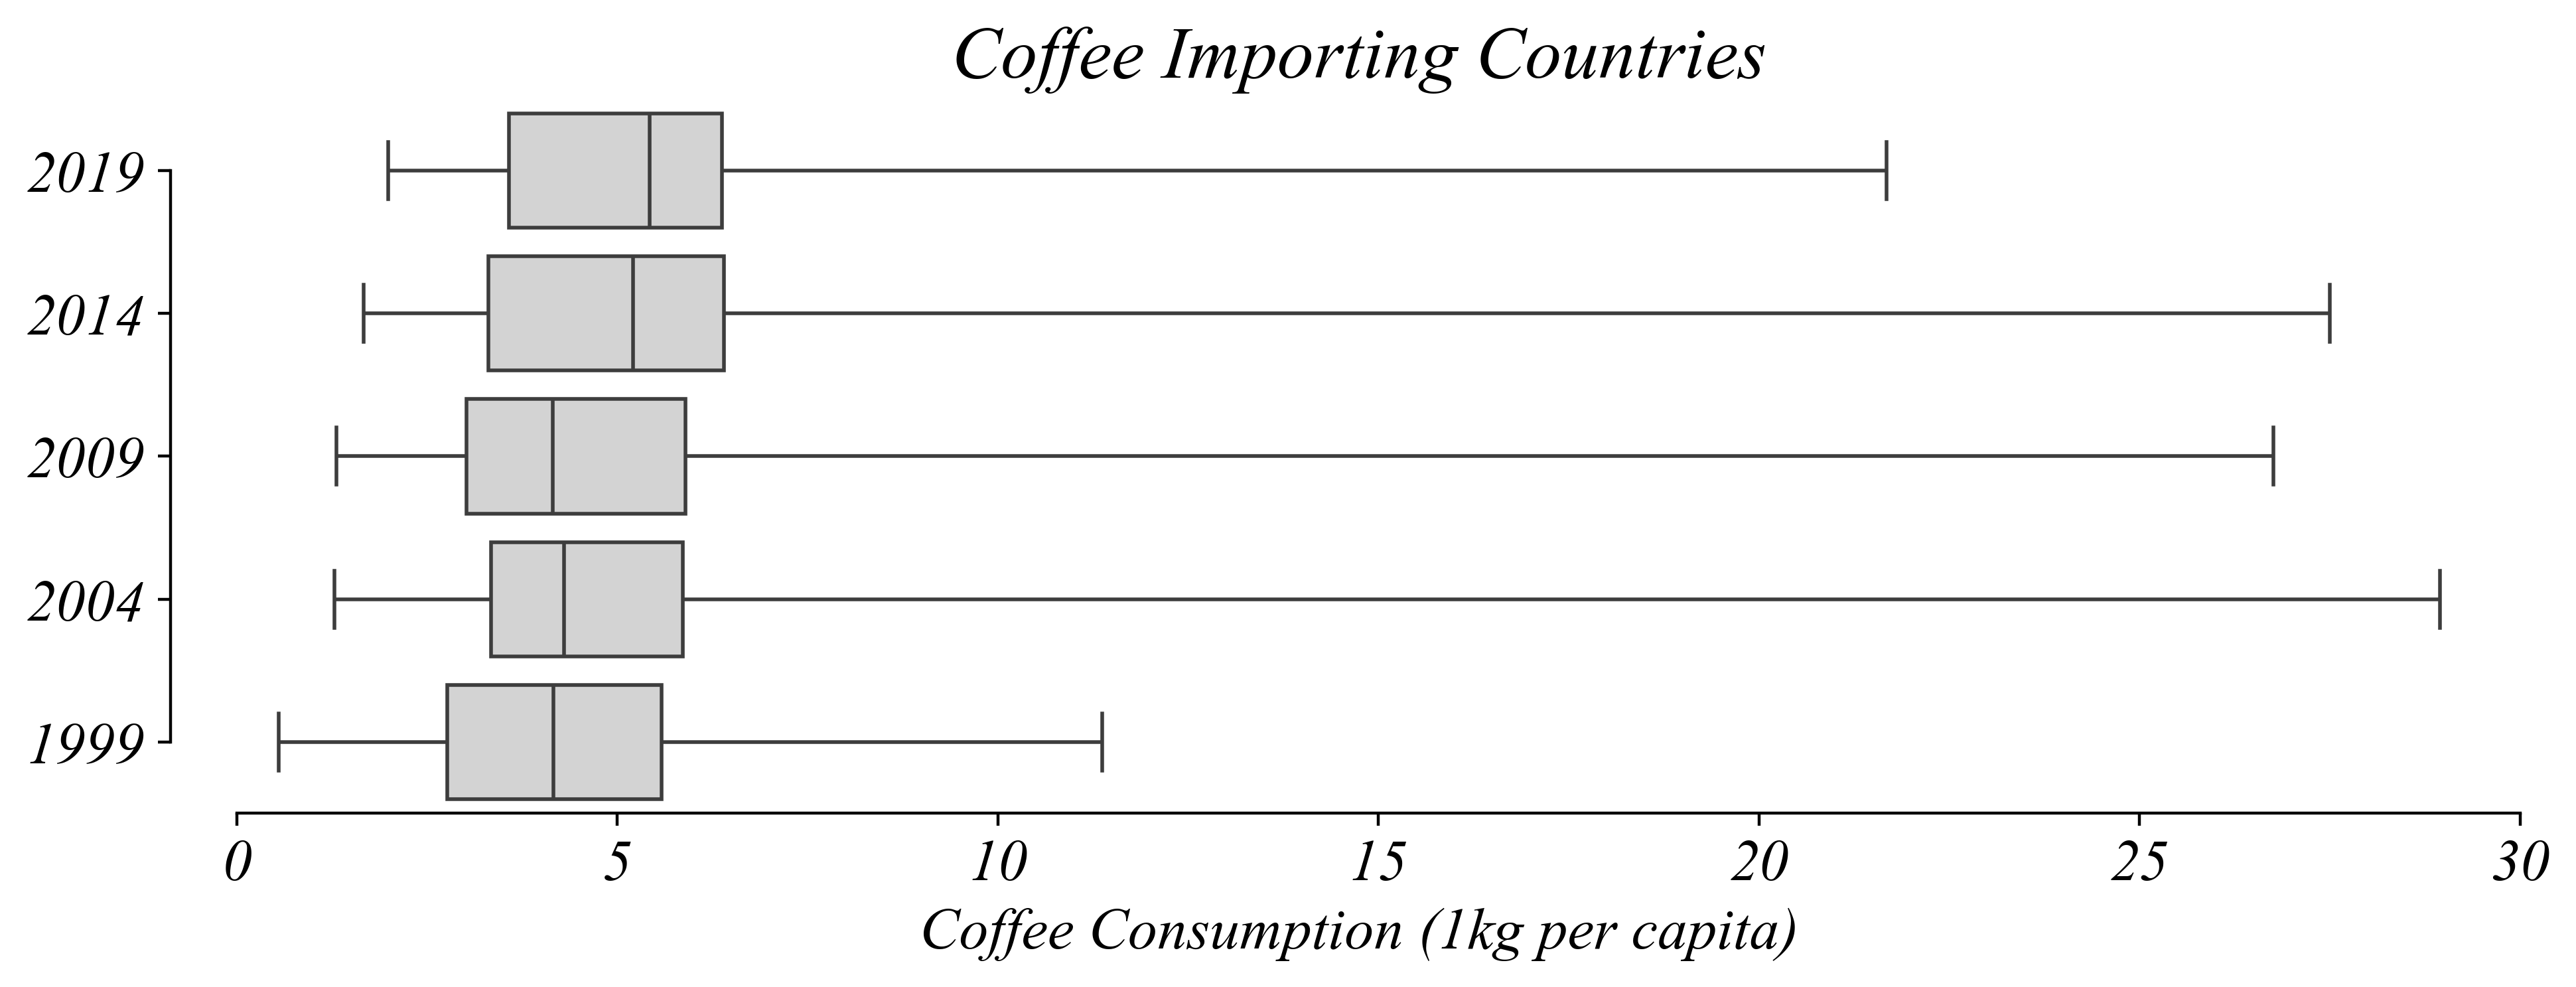

In [20]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[['1999','2004','2009','2014','2019']], orient='h', color='lightgrey', whis=(0, 100))

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_09.png')

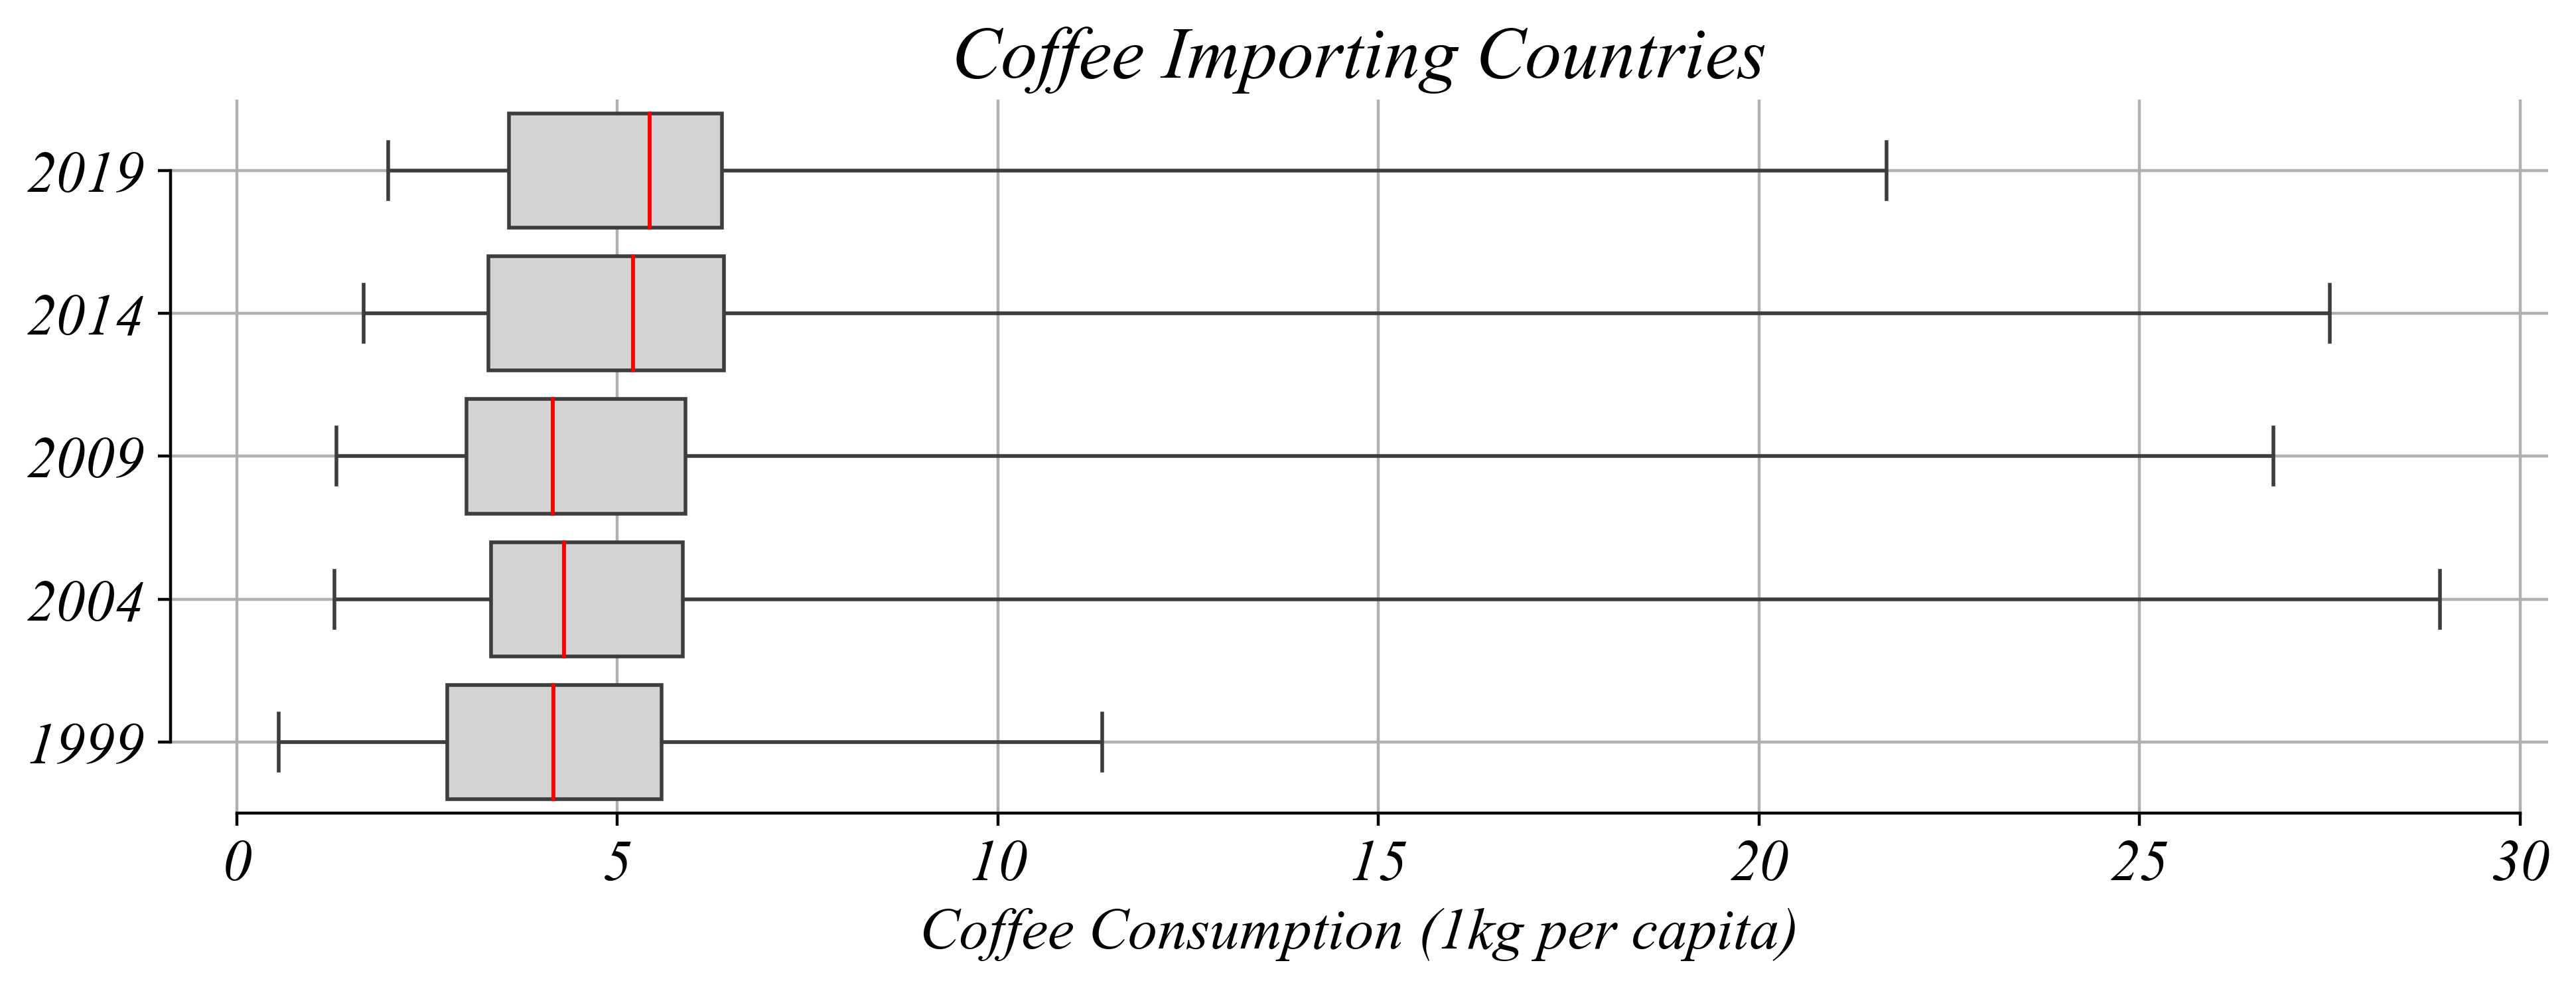

In [26]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].median()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_10.png')

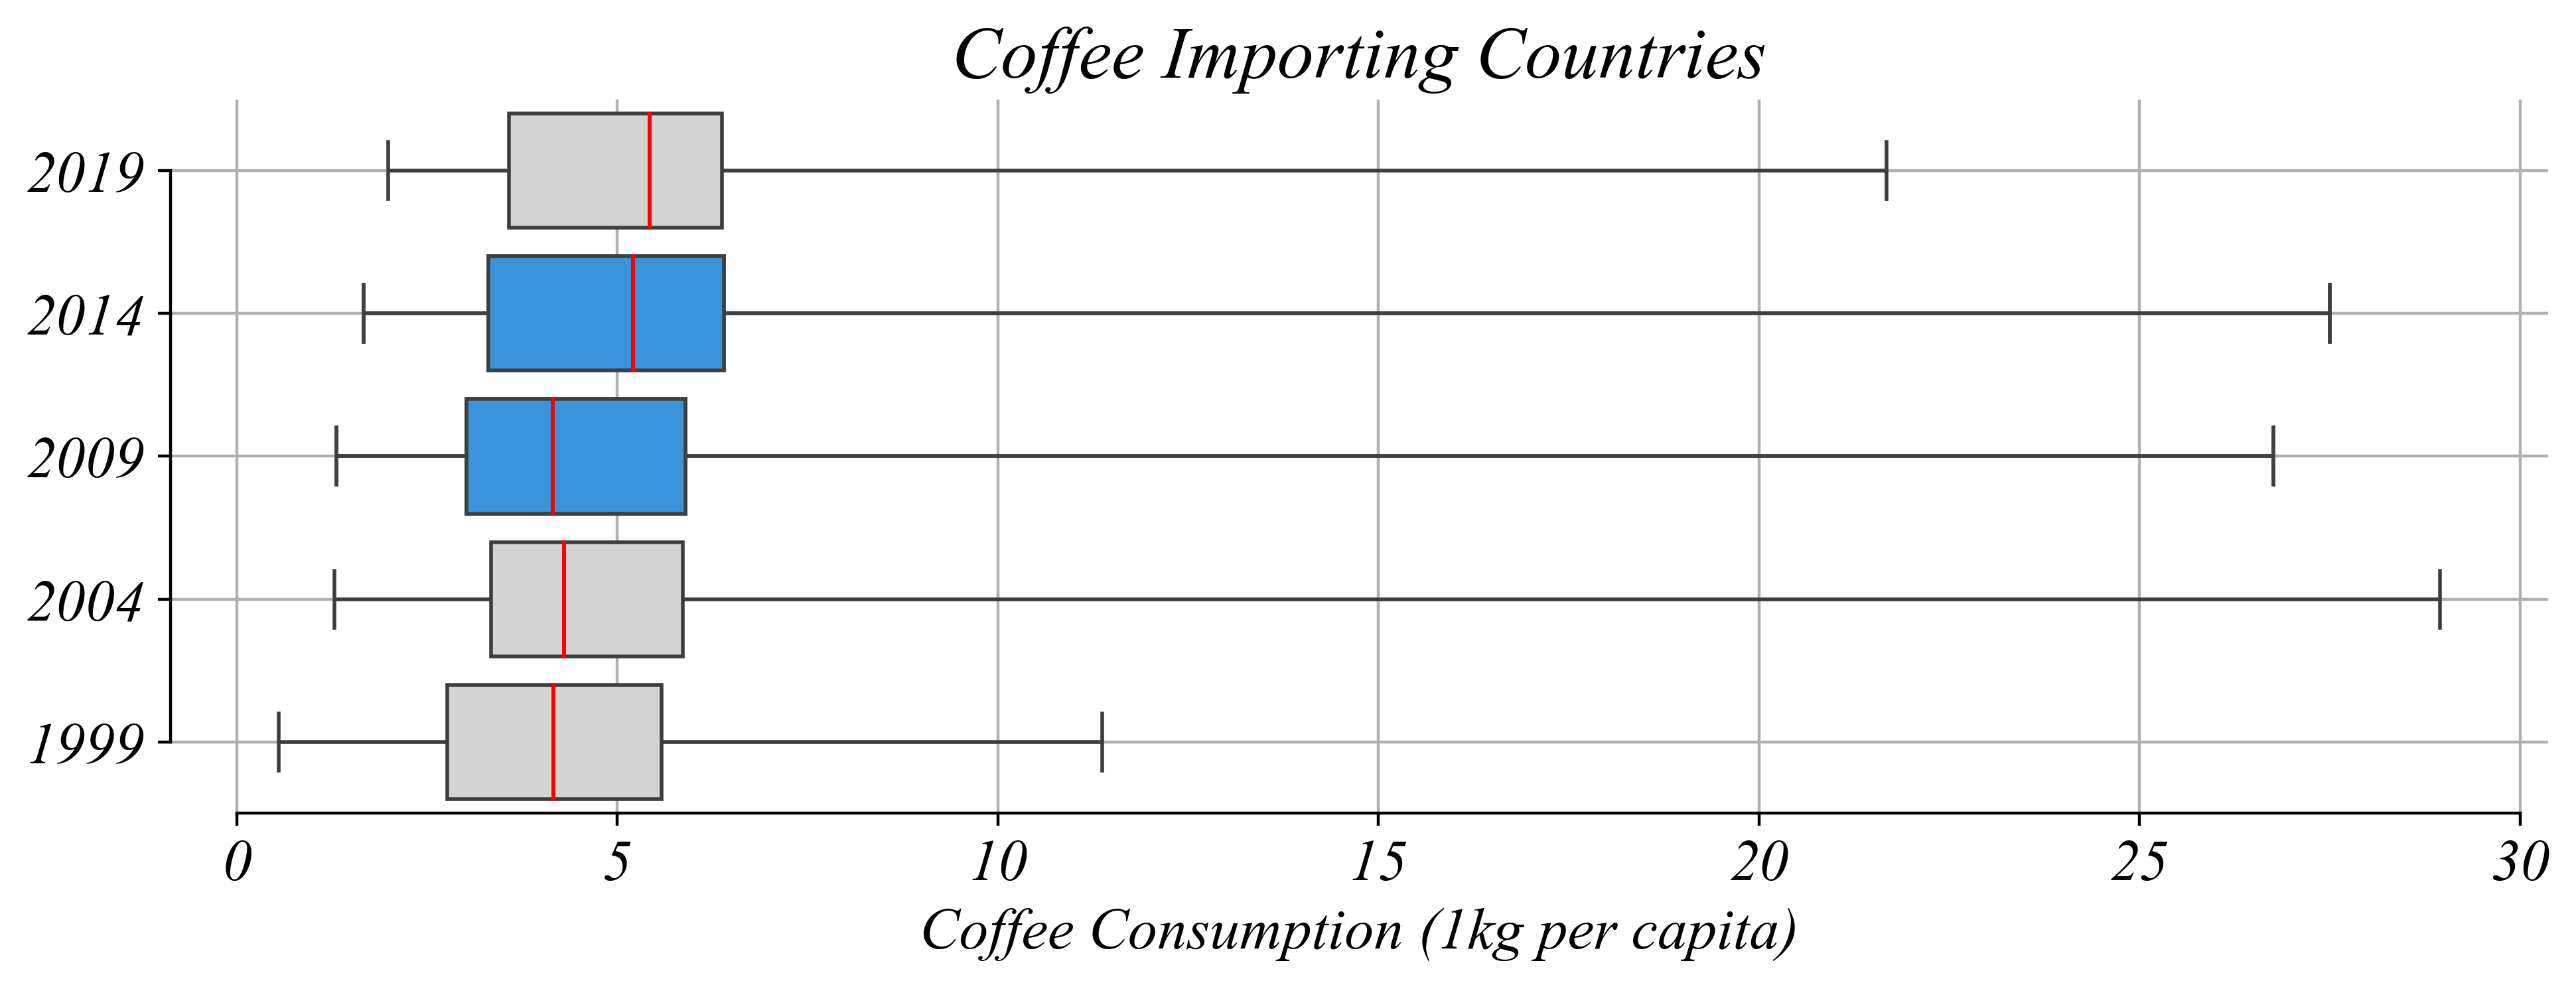

In [27]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(data=percap[['2009','2014']], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].median()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_11.png')

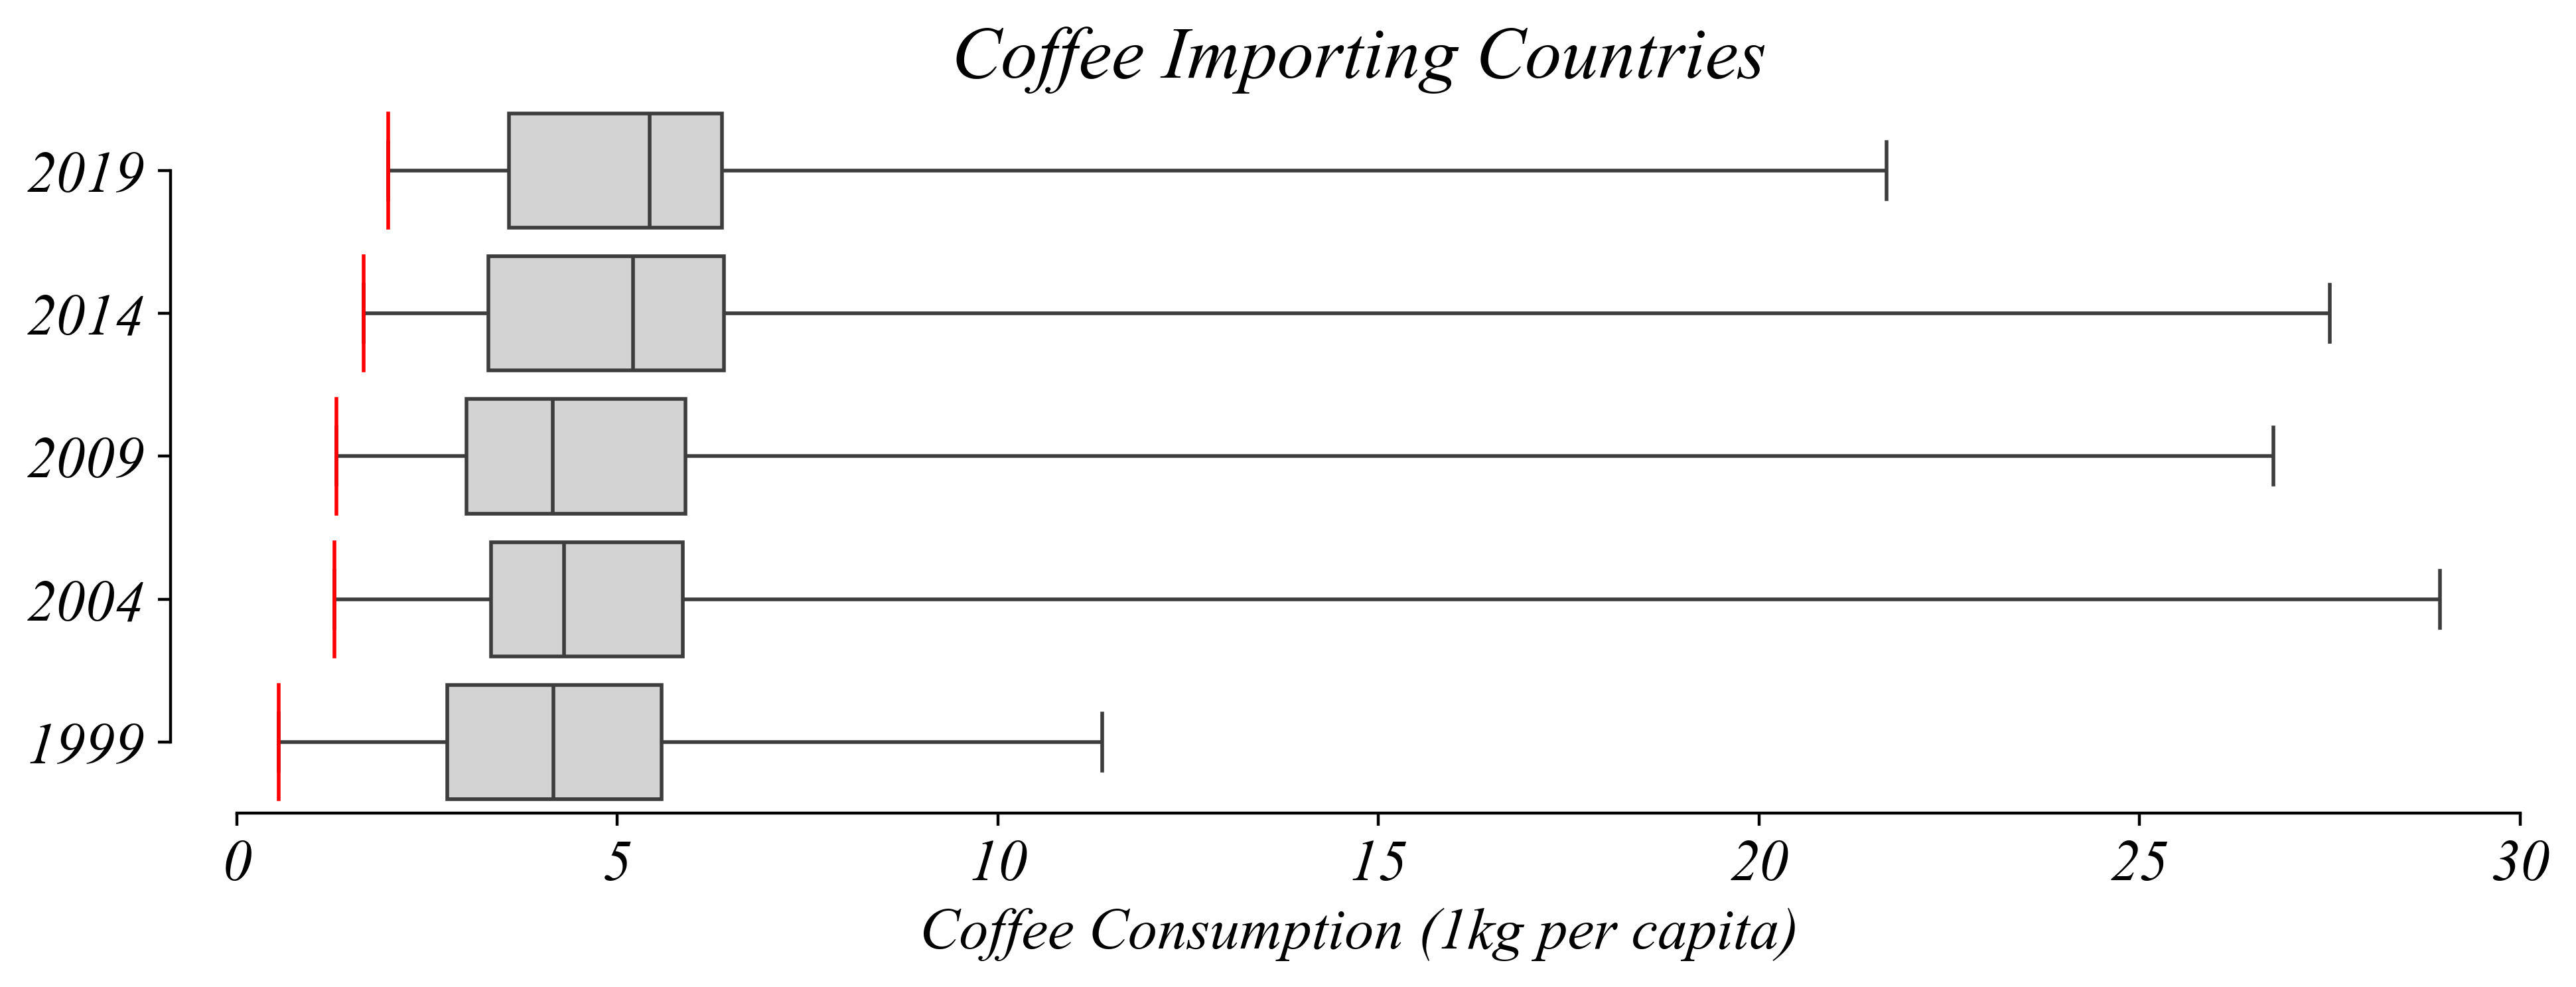

In [46]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].min()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_12.png')

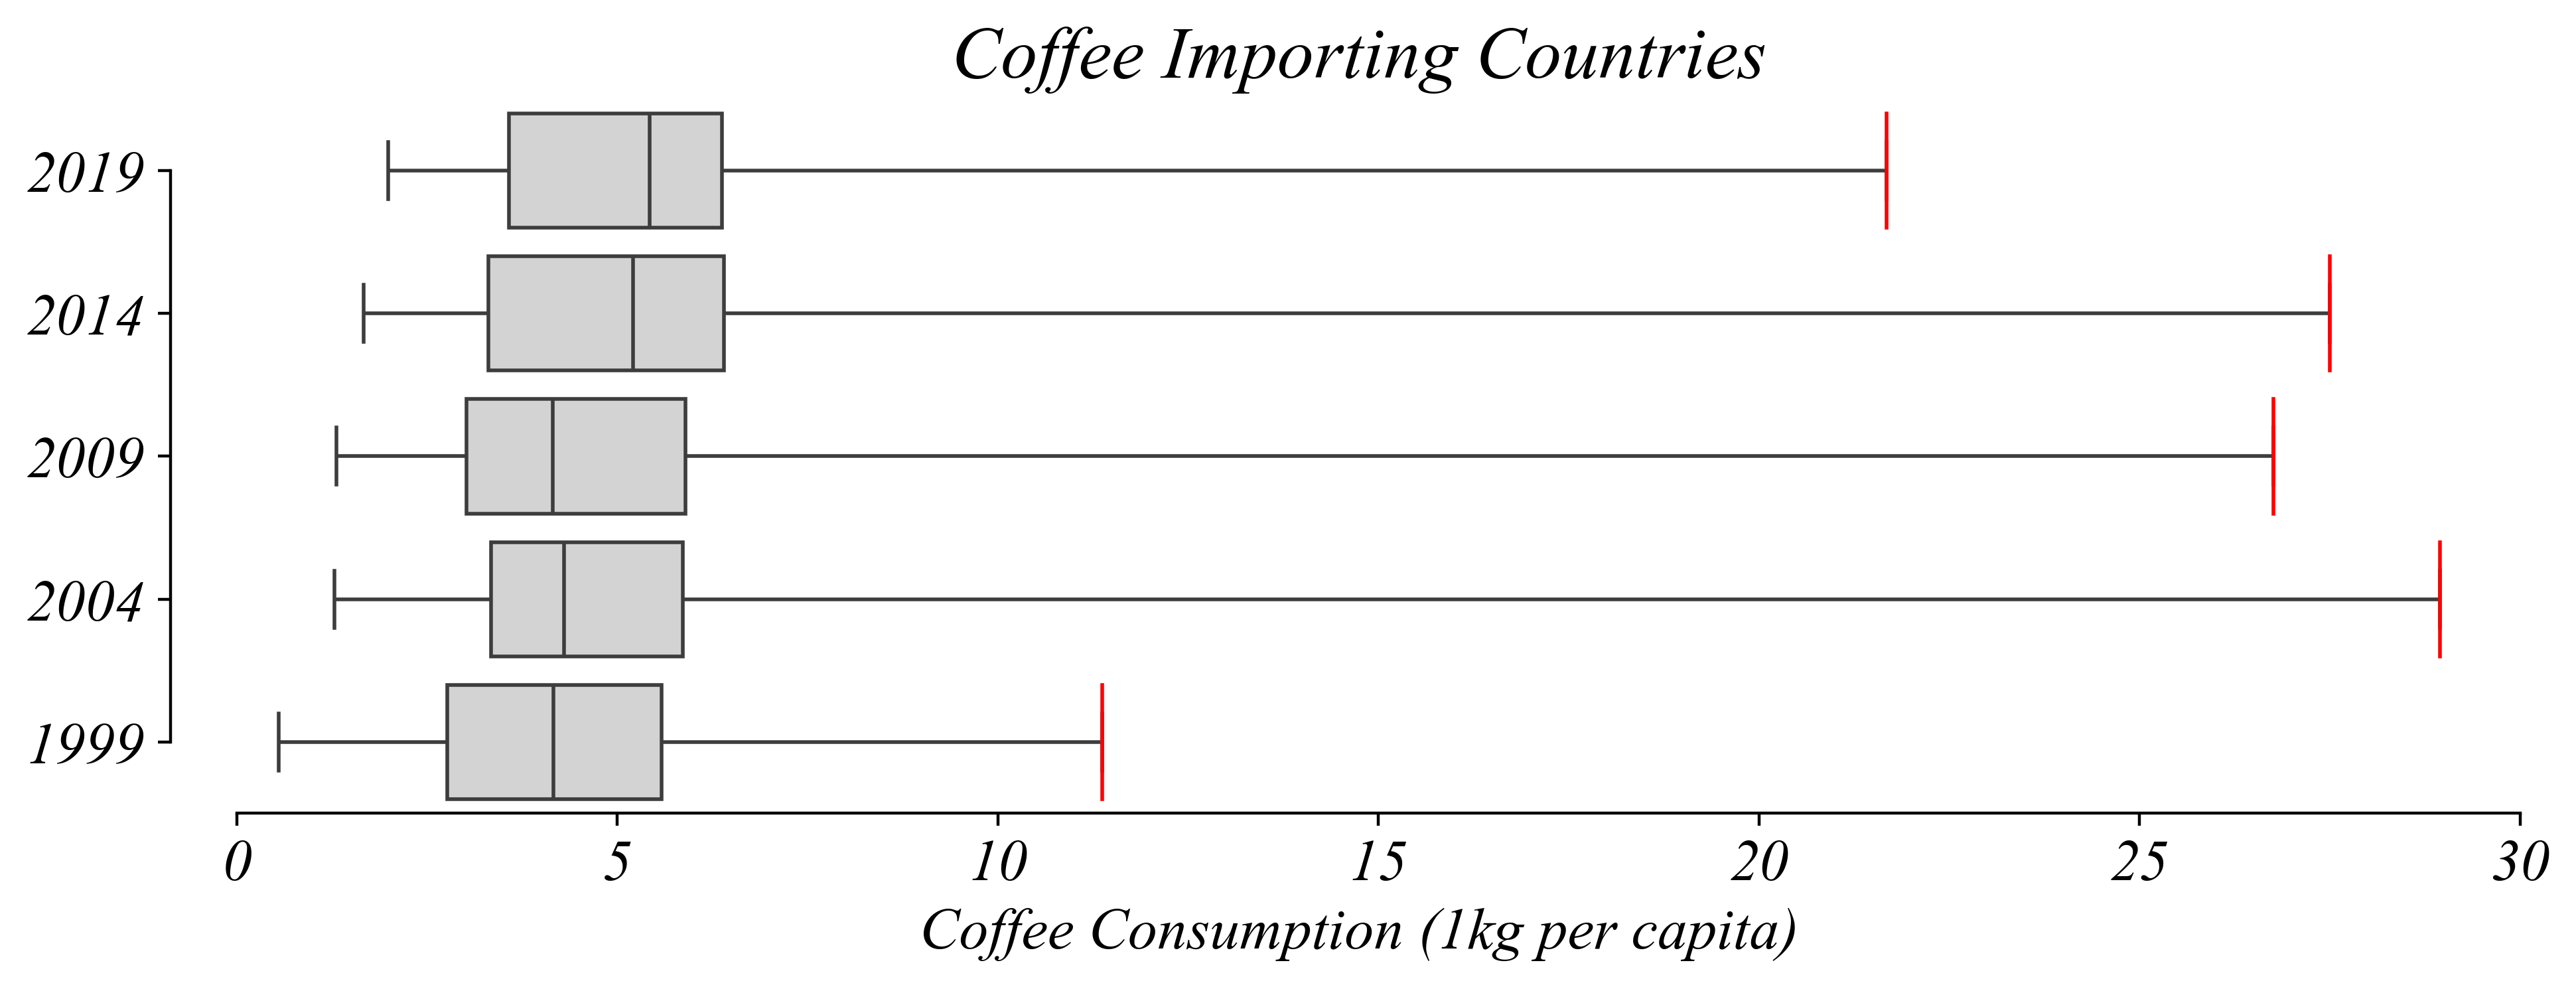

In [47]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].max()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_13.png')

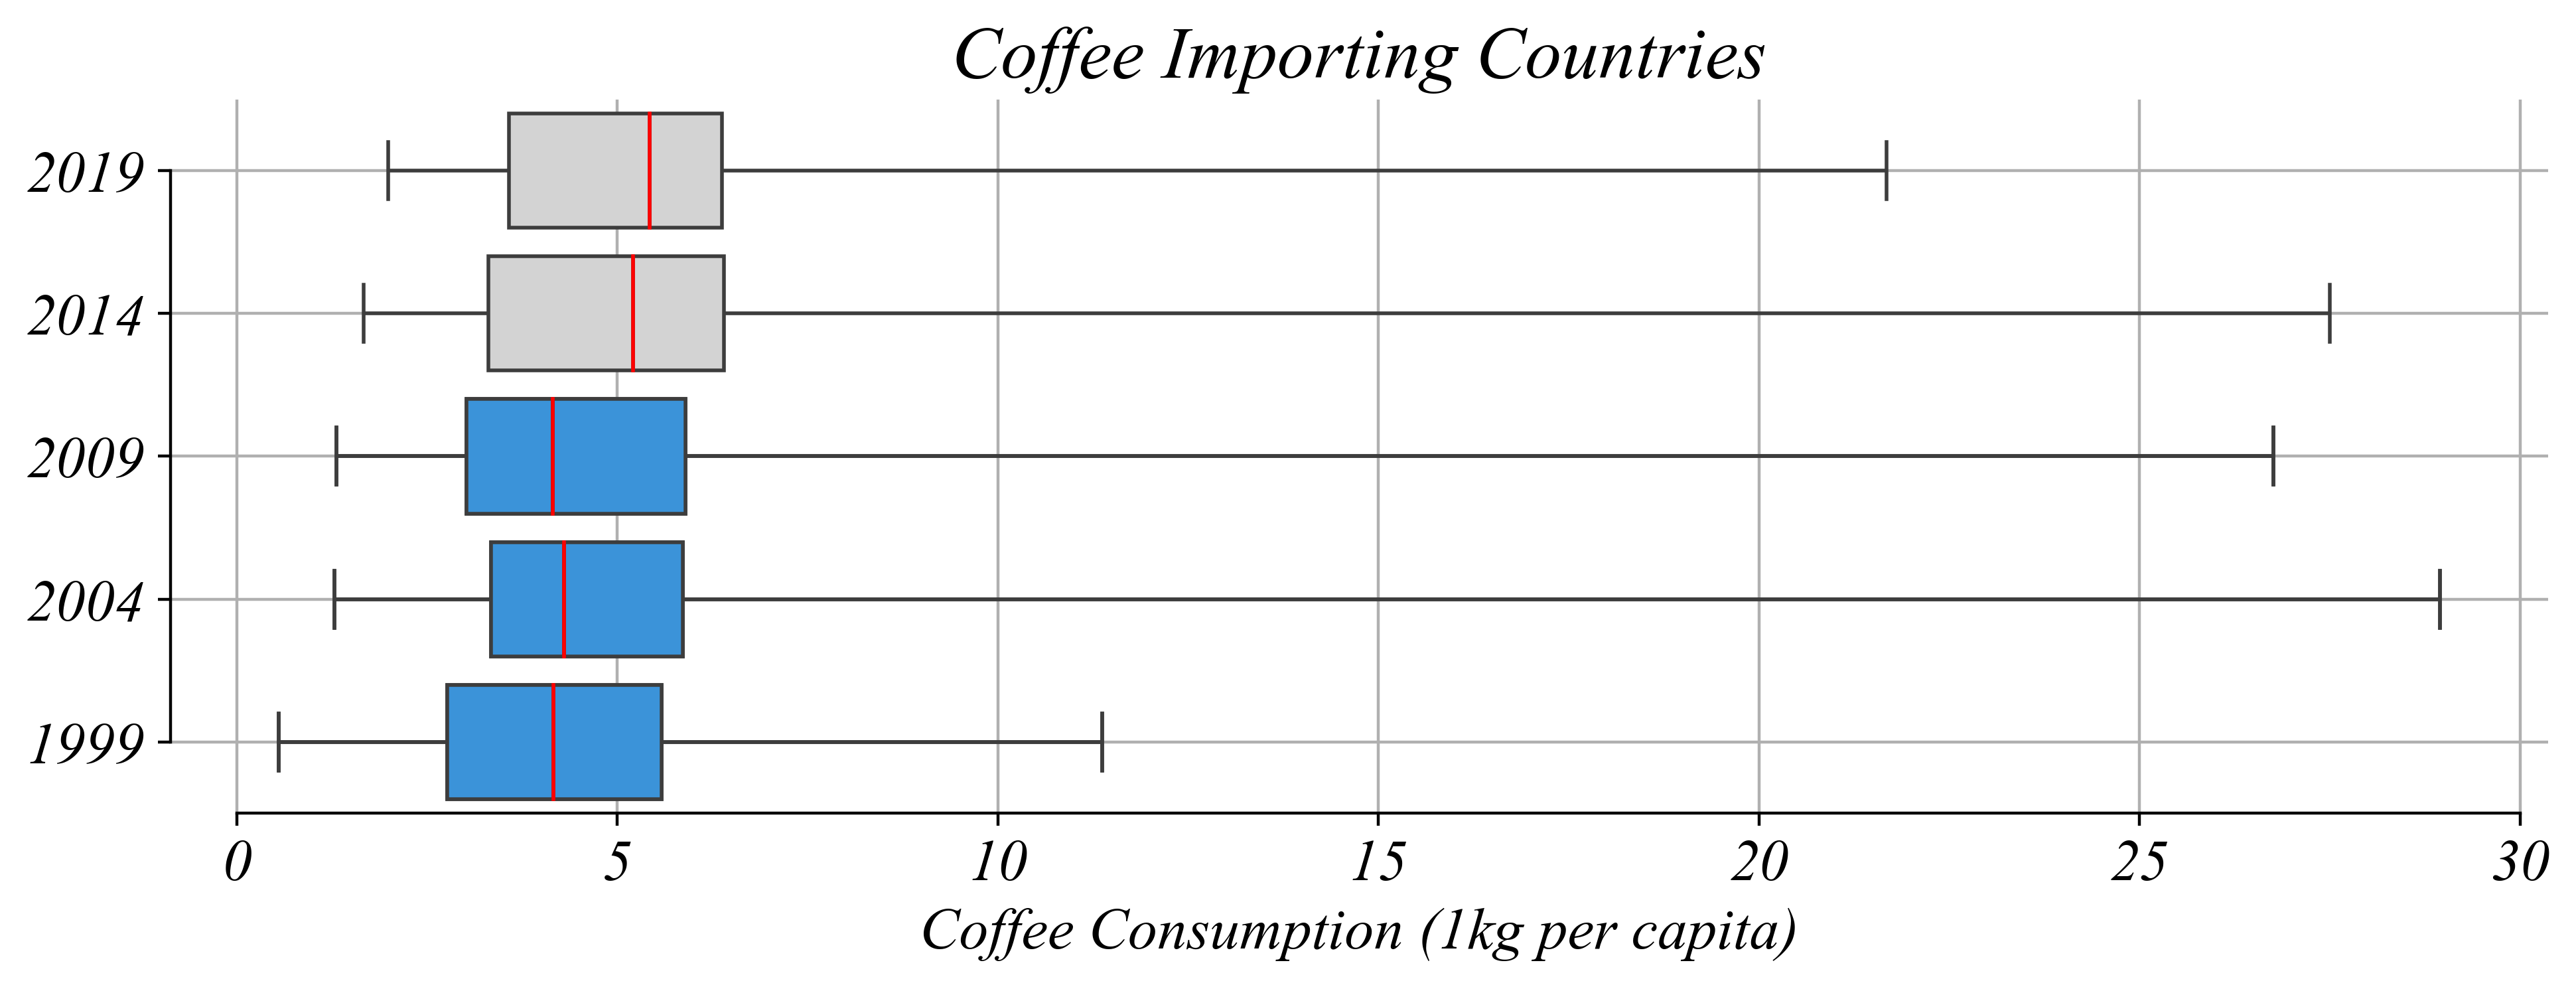

In [22]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(data=percap[['1999','2004','2009',]], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].median()
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_14.png')

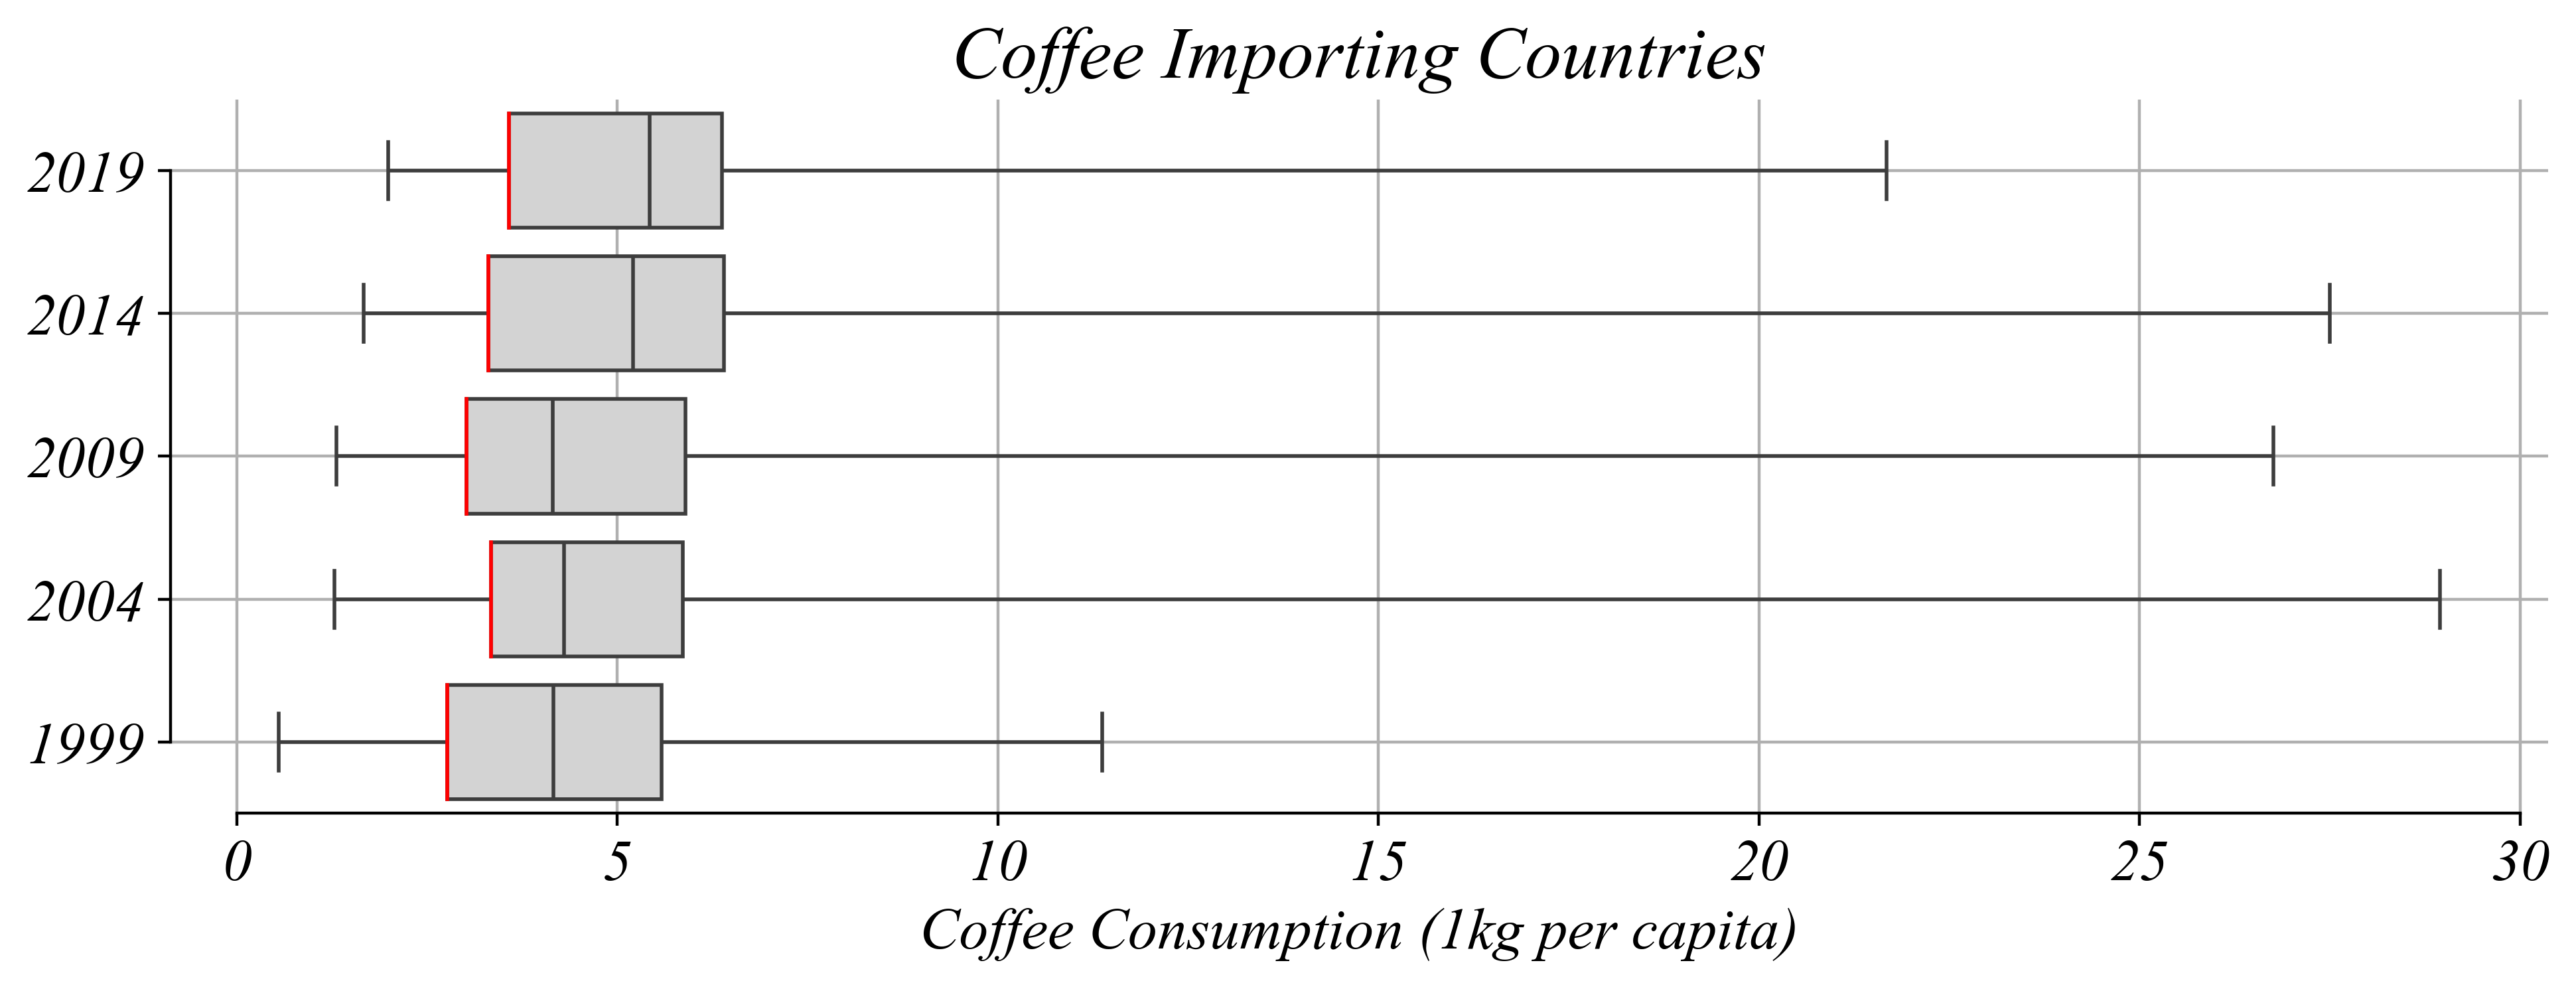

In [24]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].quantile(0.25)
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_15.png')

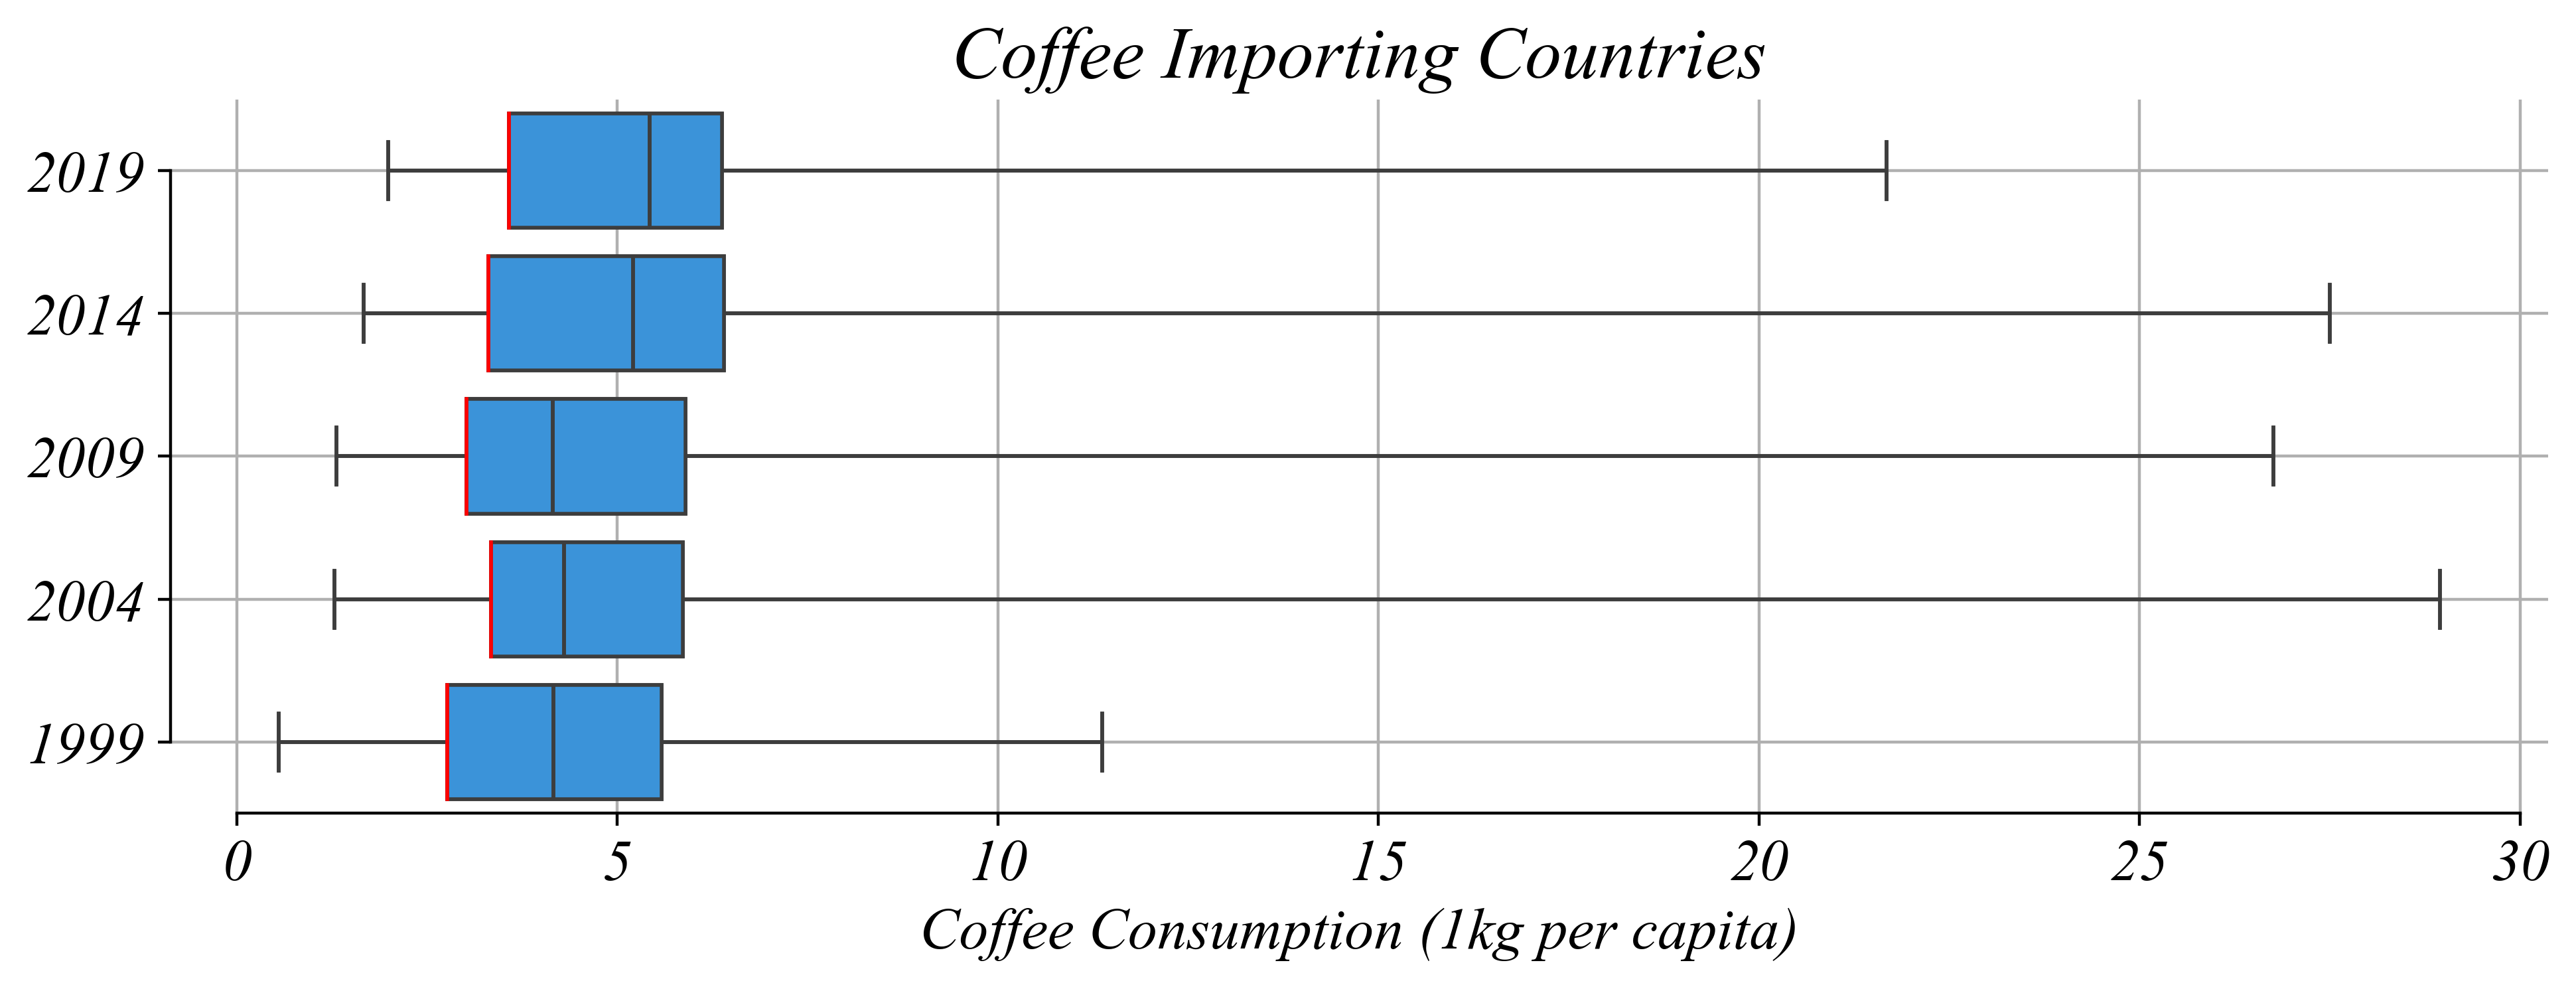

In [25]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(percap[years], orient='h', color='#2196F3', whis=(0, 100))

for i, year in enumerate(years):
    quant = percap[year].quantile(0.25)
    plt.plot([quant, quant], [i - 0.4, i + 0.4], color='red', linewidth=1, zorder=4)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.grid(True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_16.png')

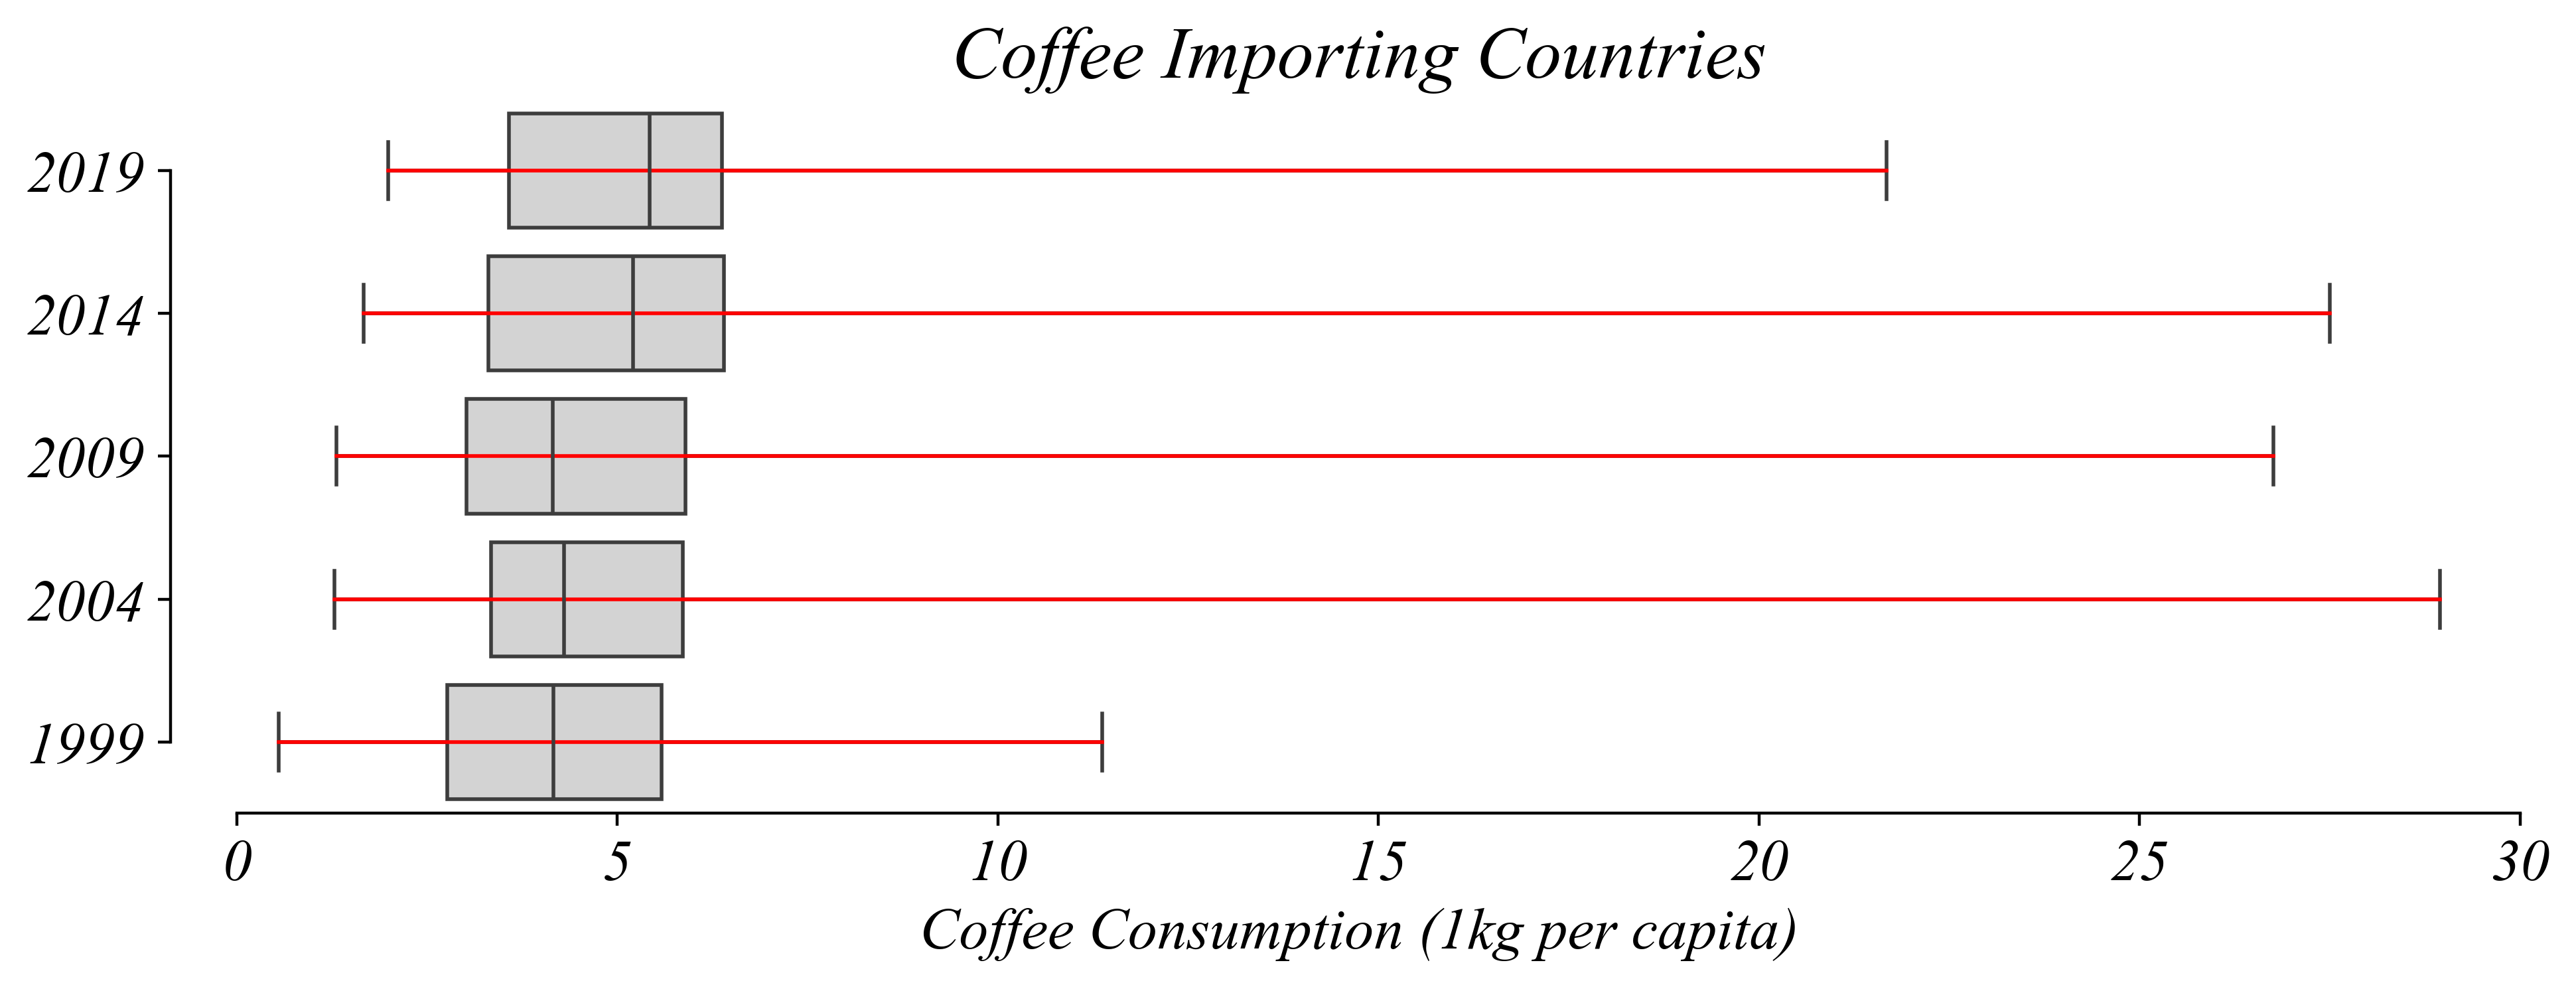

In [58]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
    
for i, year in enumerate(years):
    min = percap[year].min()
    max = percap[year].max()
    plt.plot([min, max], [i, i], color='red', linewidth=1)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_17.png')

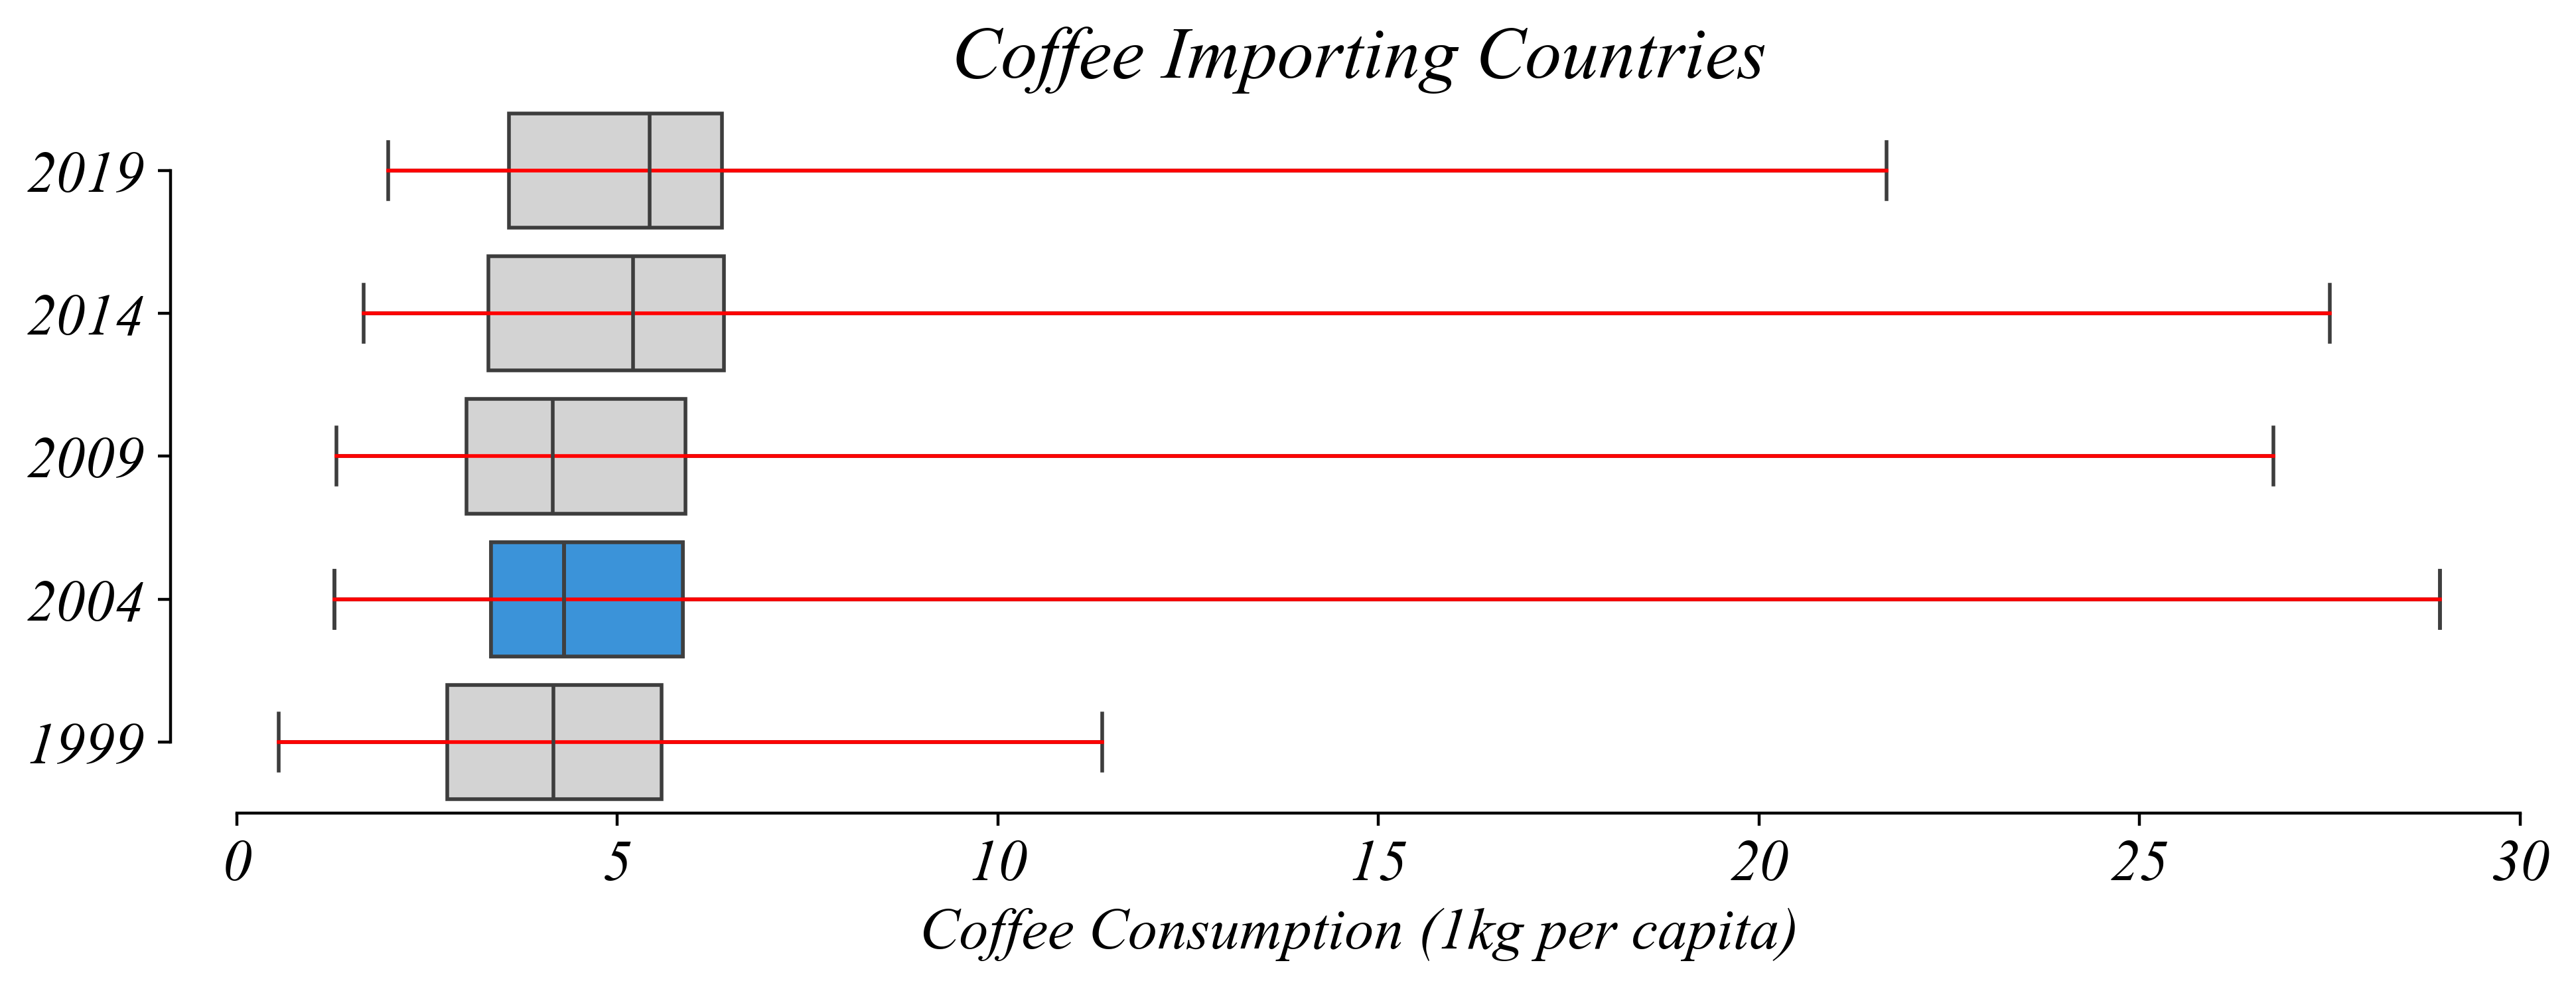

In [57]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
years = ['1999','2004','2009','2014','2019']

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(percap[years], orient='h', color='lightgrey', whis=(0, 100))
sns.boxplot(data=percap[['2004']], orient='h', color='#2196F3', whis=(0, 100))
    
for i, year in enumerate(years):
    min = percap[year].min()
    max = percap[year].max()
    plt.plot([min, max], [i, i], color='red', linewidth=1)

# Styling
plt.title('Coffee Importing Countries')
plt.xlabel('Coffee Consumption (1kg per capita)')
plt.ylabel('')  
plt.ylim(-0.5,4.5)
sns.despine(left=False, top=True, bottom=False, trim=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_18.png')

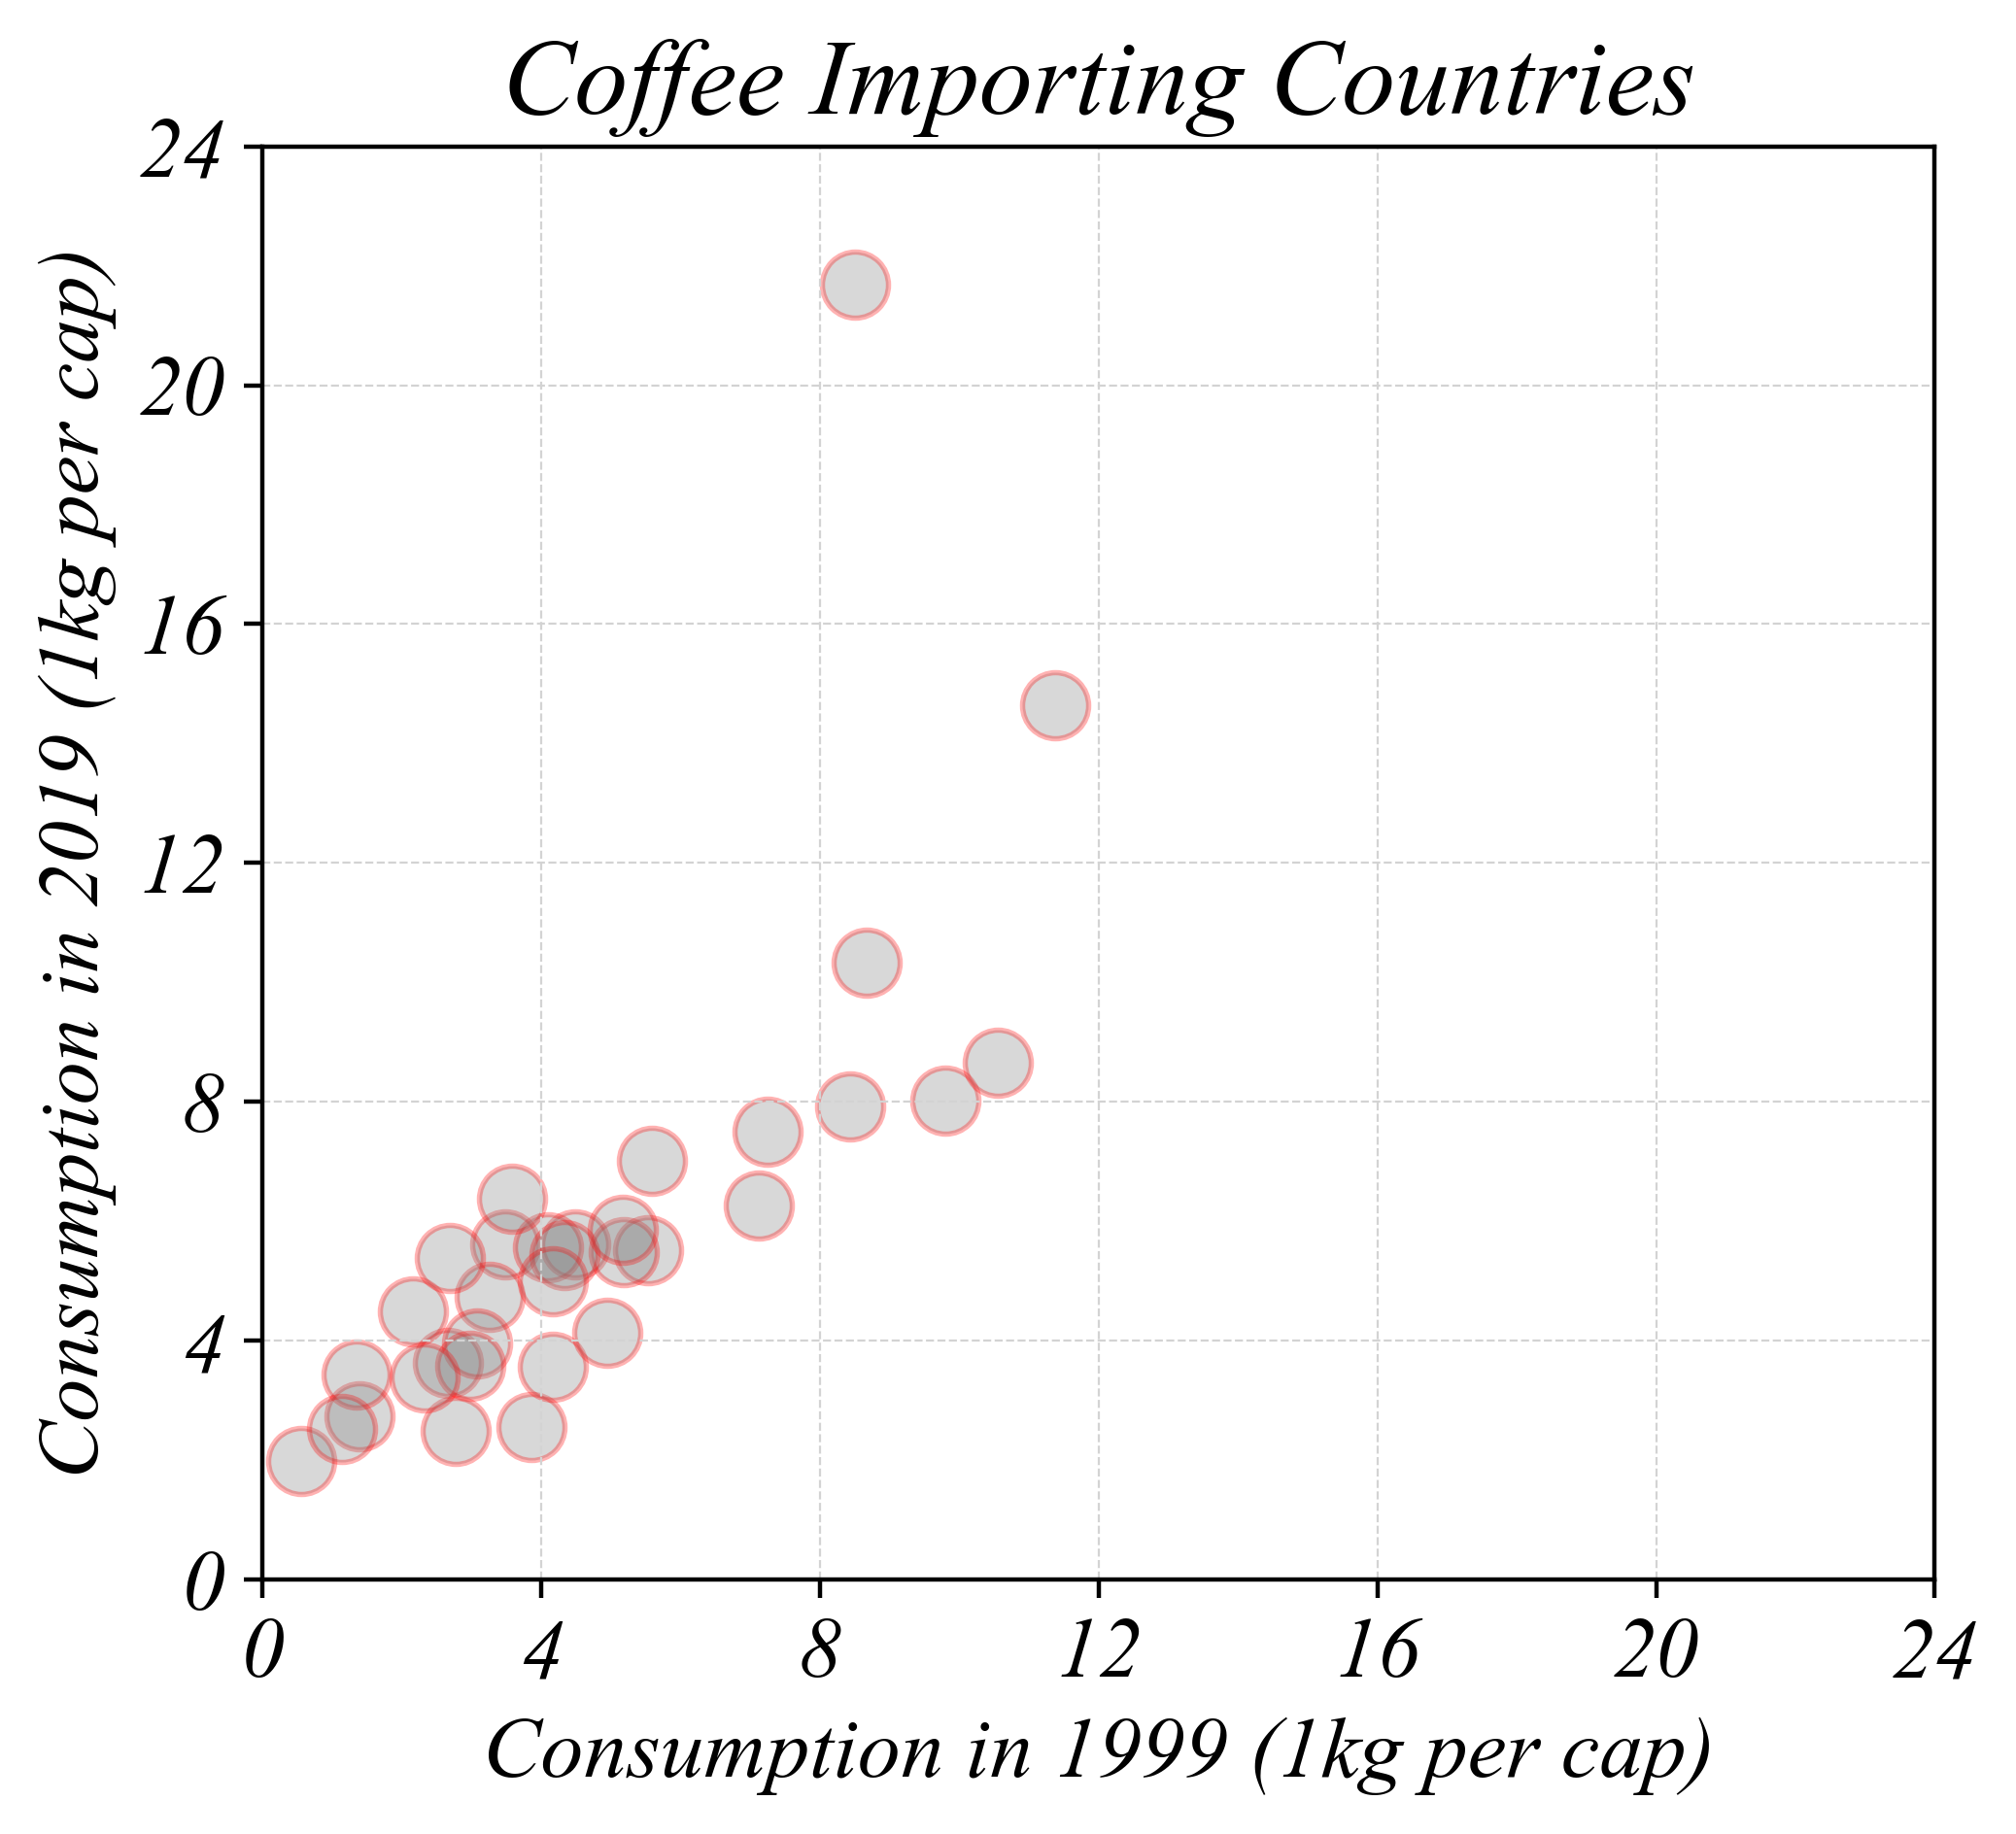

In [3]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)

# Figure (square with whitespace)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 2.4, 1])
fig.add_subplot(gs[0, 1])

sns.scatterplot(percap, x='1999', y='2019', color='grey', edgecolors='red', alpha=0.3, s=150)

# Styling
tick_labels = [0, 4, 8, 12, 16, 20, 24]

plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0,24)

plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0,24)

plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_19.png')

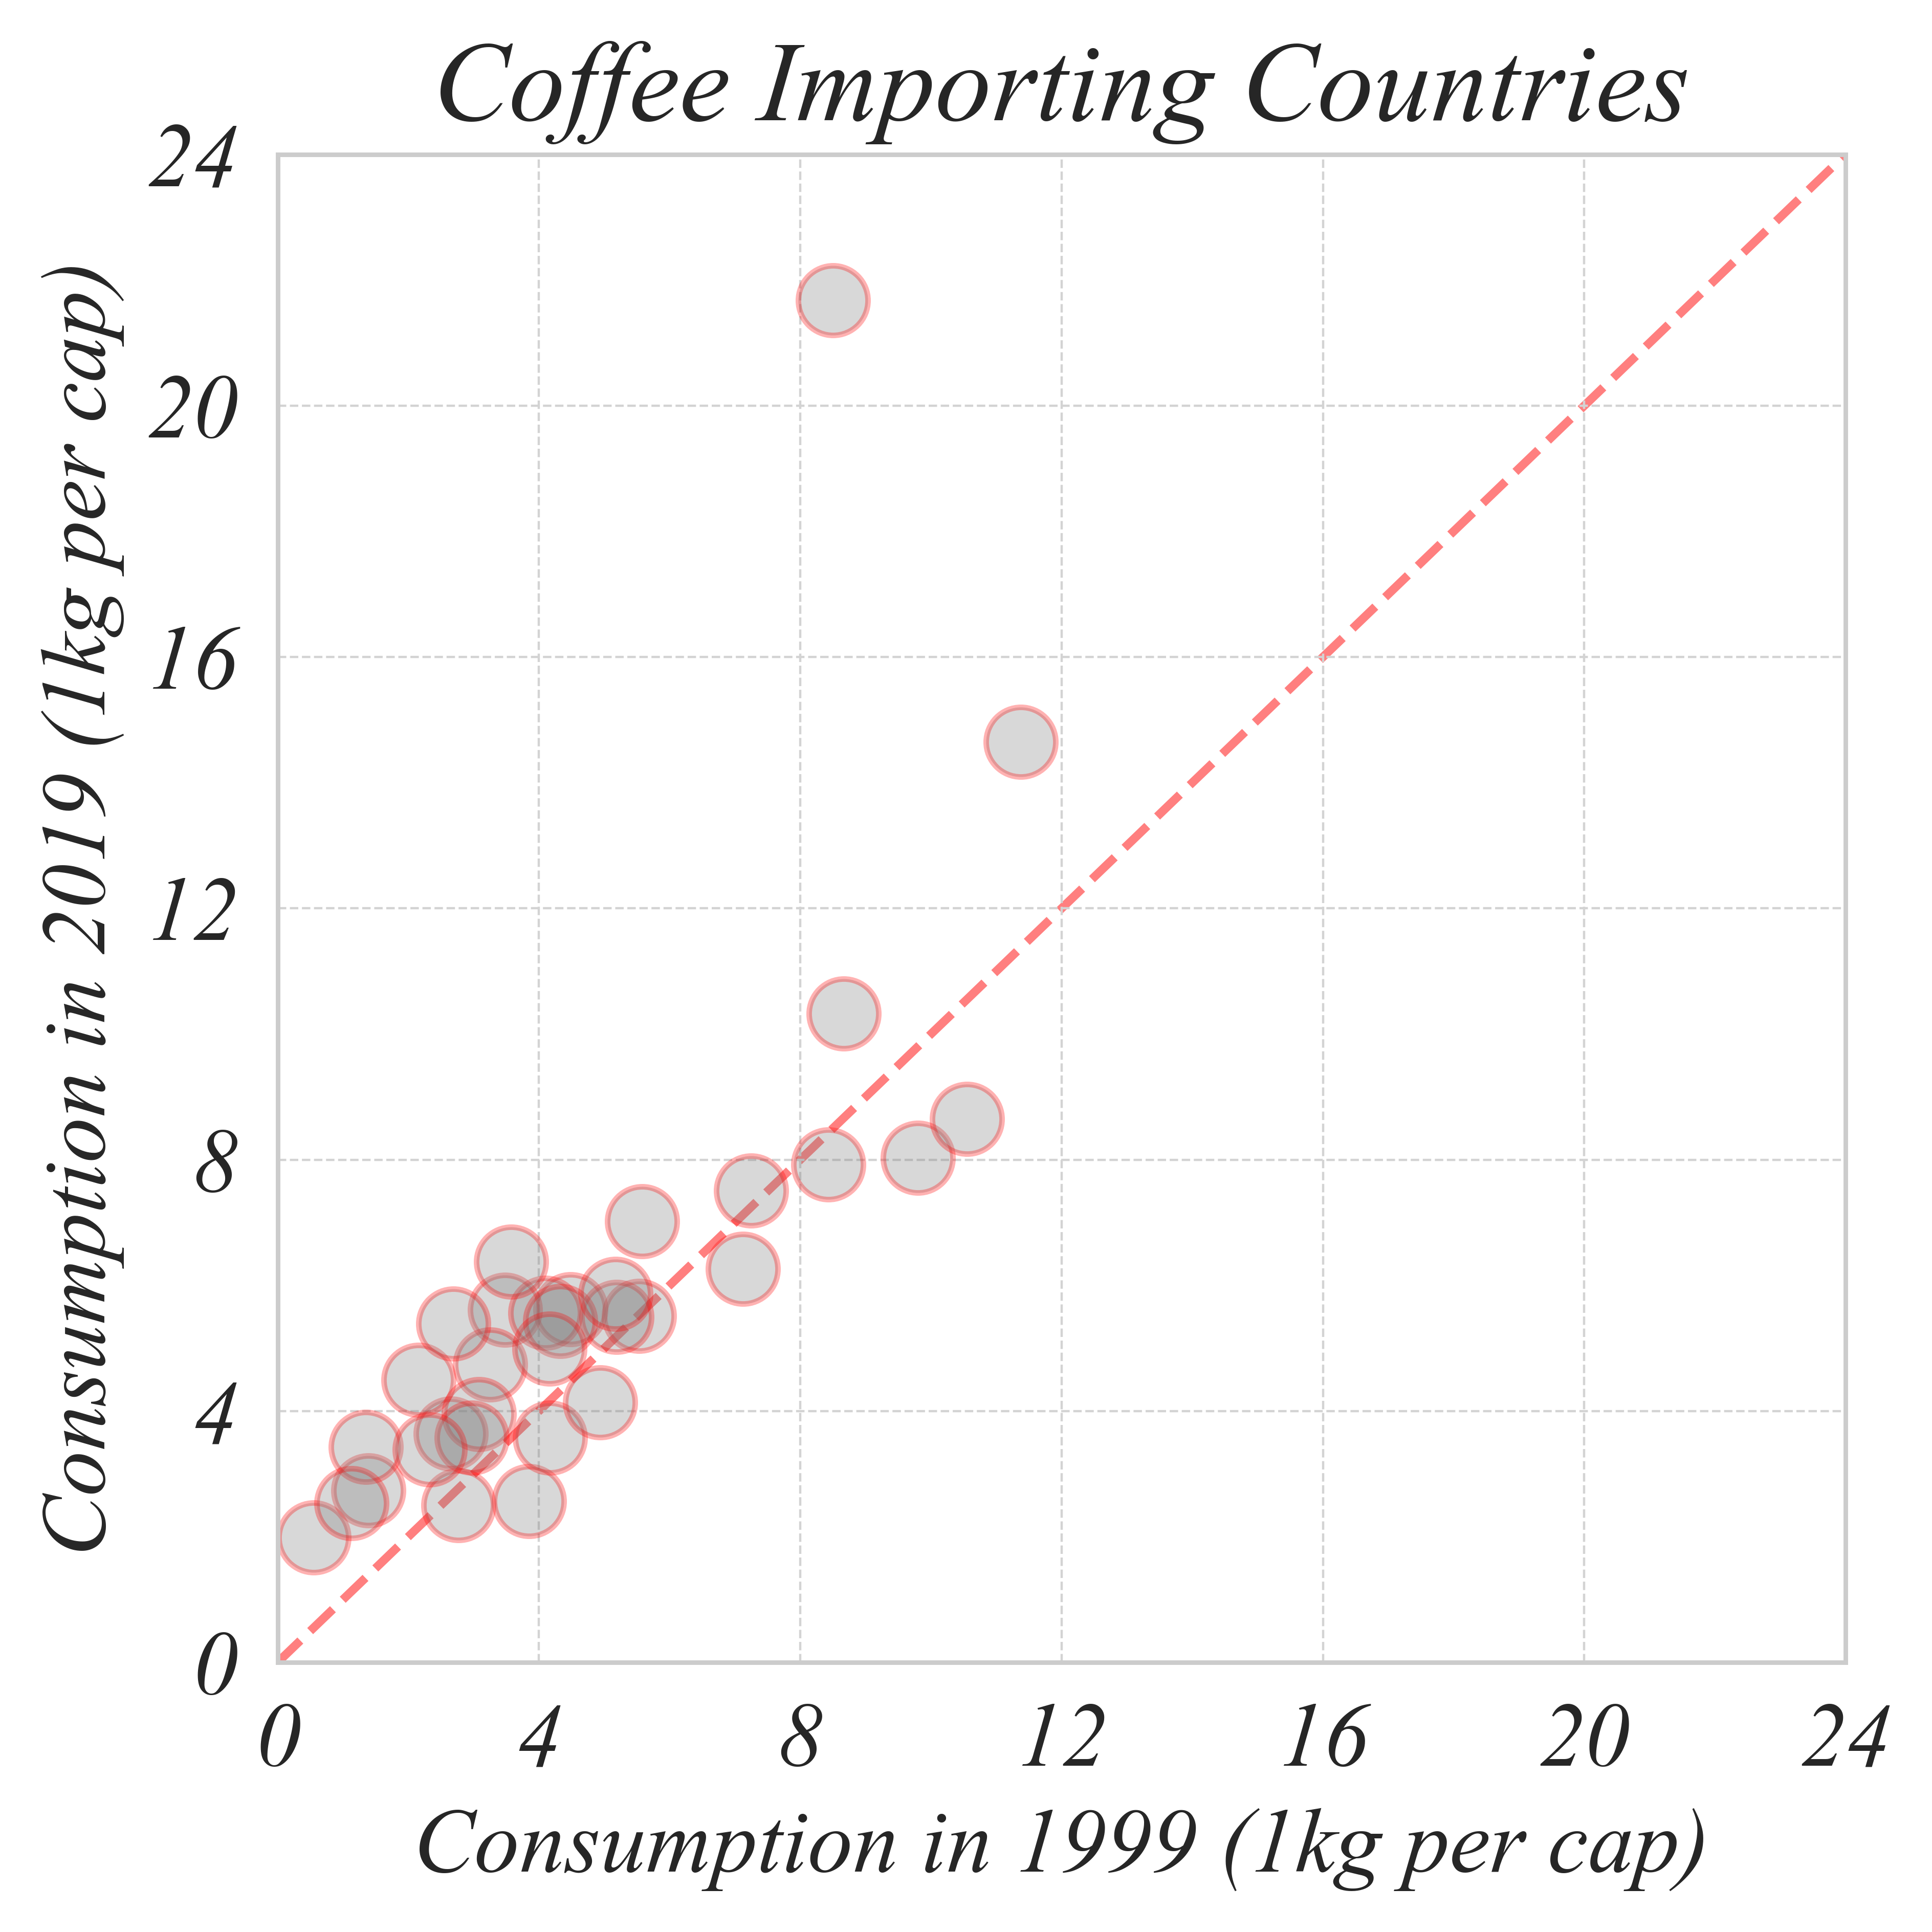

In [50]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)

# Figure
plt.figure(figsize=(5, 5), dpi=800)
sns.scatterplot(percap, x='1999', y='2019', color='grey', edgecolors='red', alpha=0.3, s=150)
plt.plot([0,24],[0,24], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
tick_labels = [0, 4, 8, 12, 16, 20, 24]

plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0,24)

plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0,24)

plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_20.png')

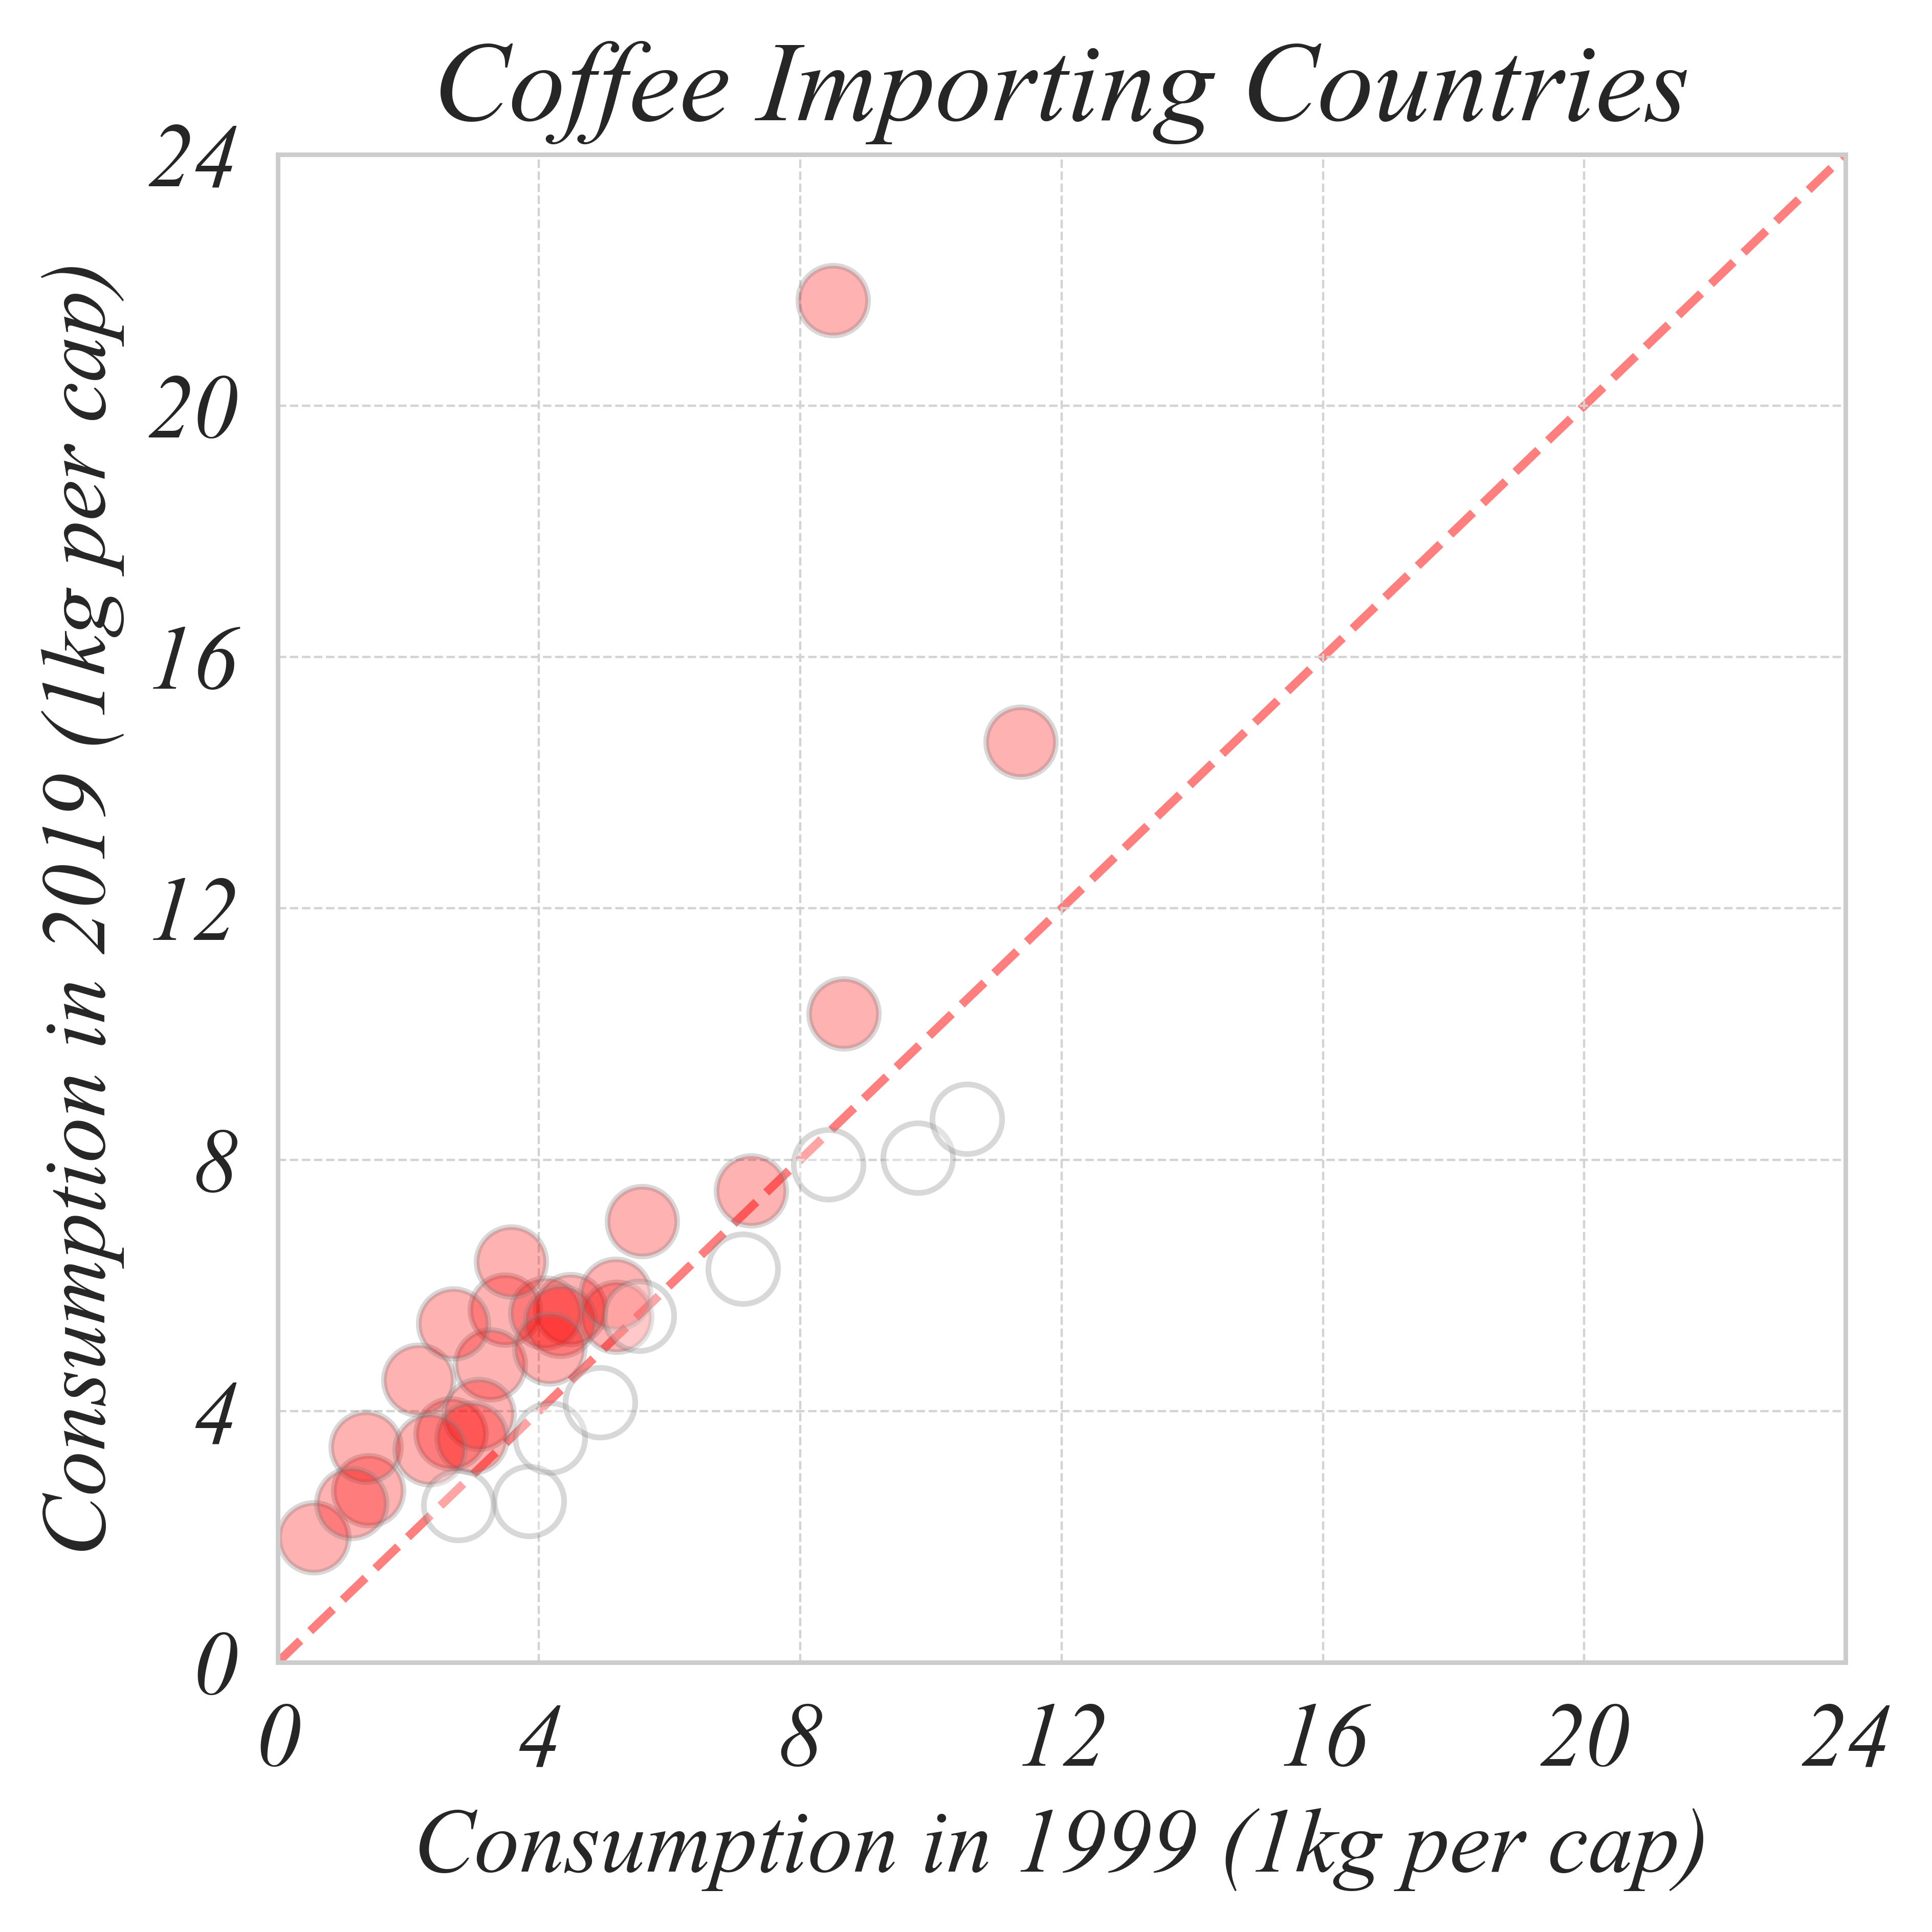

In [52]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
increase = percap[percap['1999'] <= percap['2019']]
decrease = percap[percap['1999'] > percap['2019']]

# Figure
plt.figure(figsize=(5, 5), dpi=800)
plt.scatter(increase['1999'], increase['2019'], color='red', edgecolors='grey', alpha=0.3, s=150)
plt.scatter(decrease['1999'], decrease['2019'], color='white', edgecolors='grey', alpha=0.3, s=150)
plt.plot([0,24],[0,24], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
tick_labels = [0, 4, 8, 12, 16, 20, 24]

plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0,24)

plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0,24)

plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_21.png')

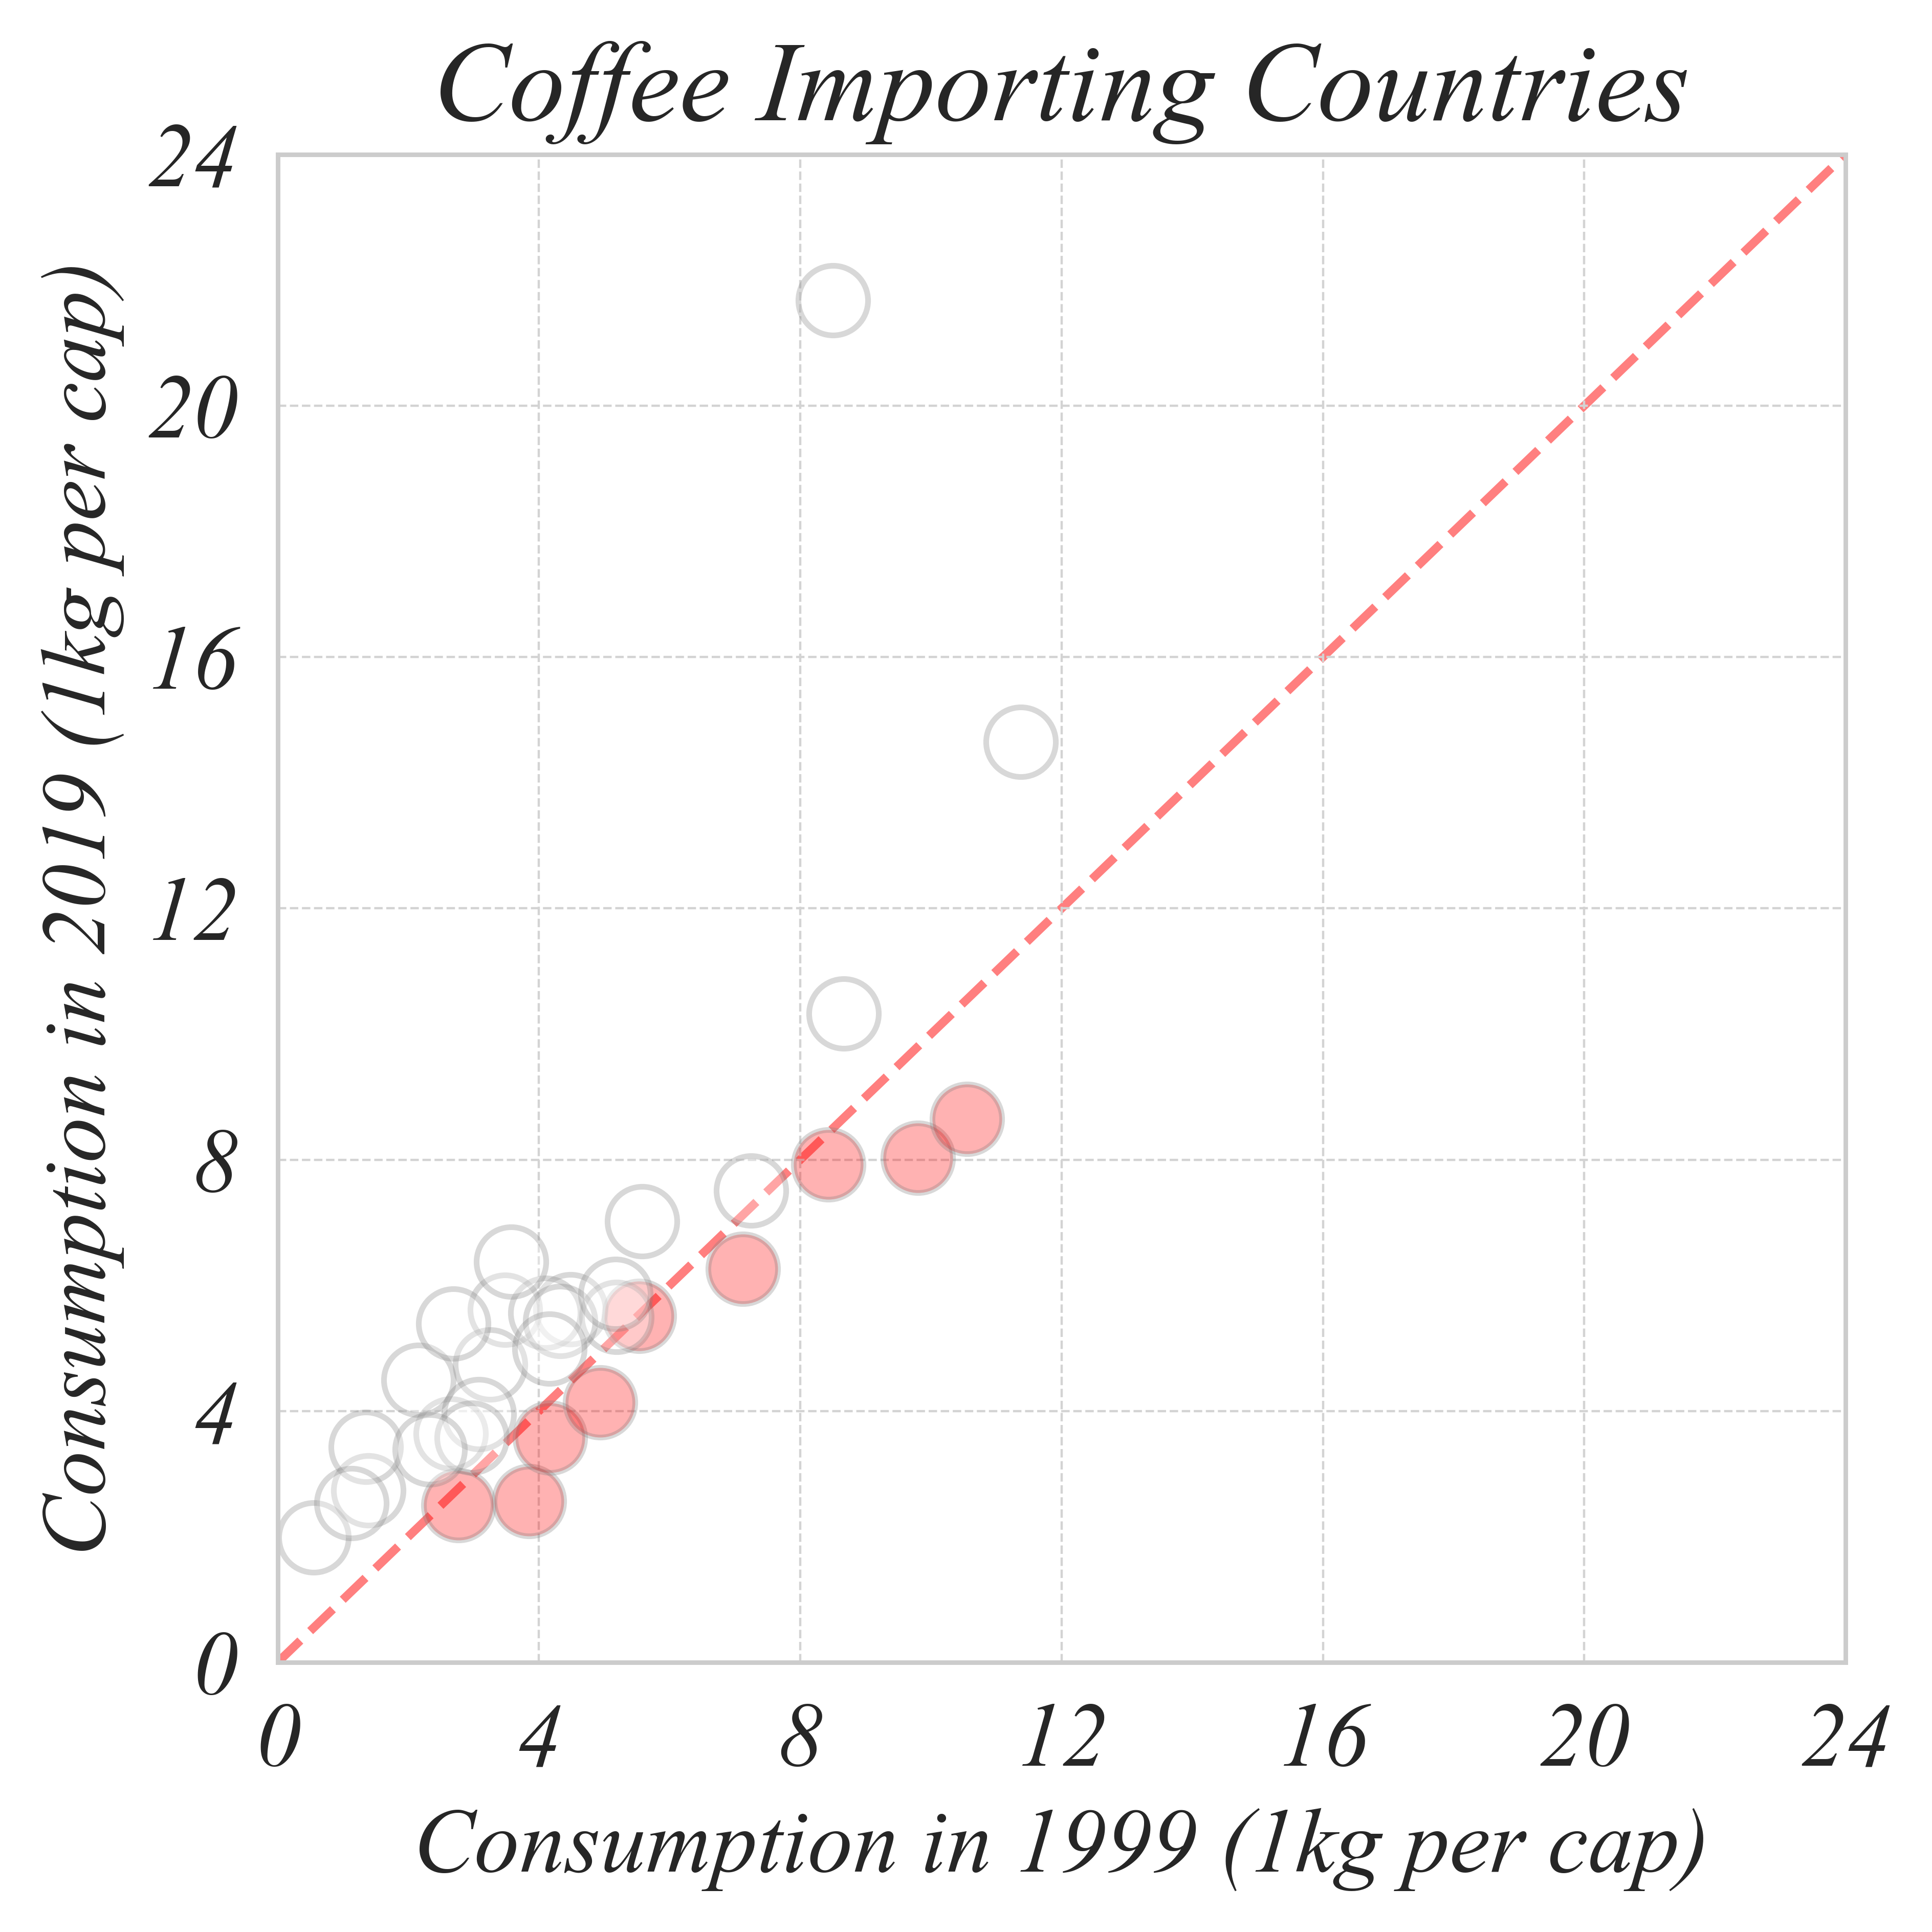

In [53]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
increase = percap[percap['1999'] <= percap['2019']]
decrease = percap[percap['1999'] > percap['2019']]

# Figure
plt.figure(figsize=(5, 5), dpi=800)
plt.scatter(decrease['1999'], decrease['2019'], color='red', edgecolors='grey', alpha=0.3, s=150)
plt.scatter(increase['1999'], increase['2019'], color='white', edgecolors='grey', alpha=0.3, s=150)
plt.plot([0,24],[0,24], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
tick_labels = [0, 4, 8, 12, 16, 20, 24]

plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0,24)

plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0,24)

plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_22.png')

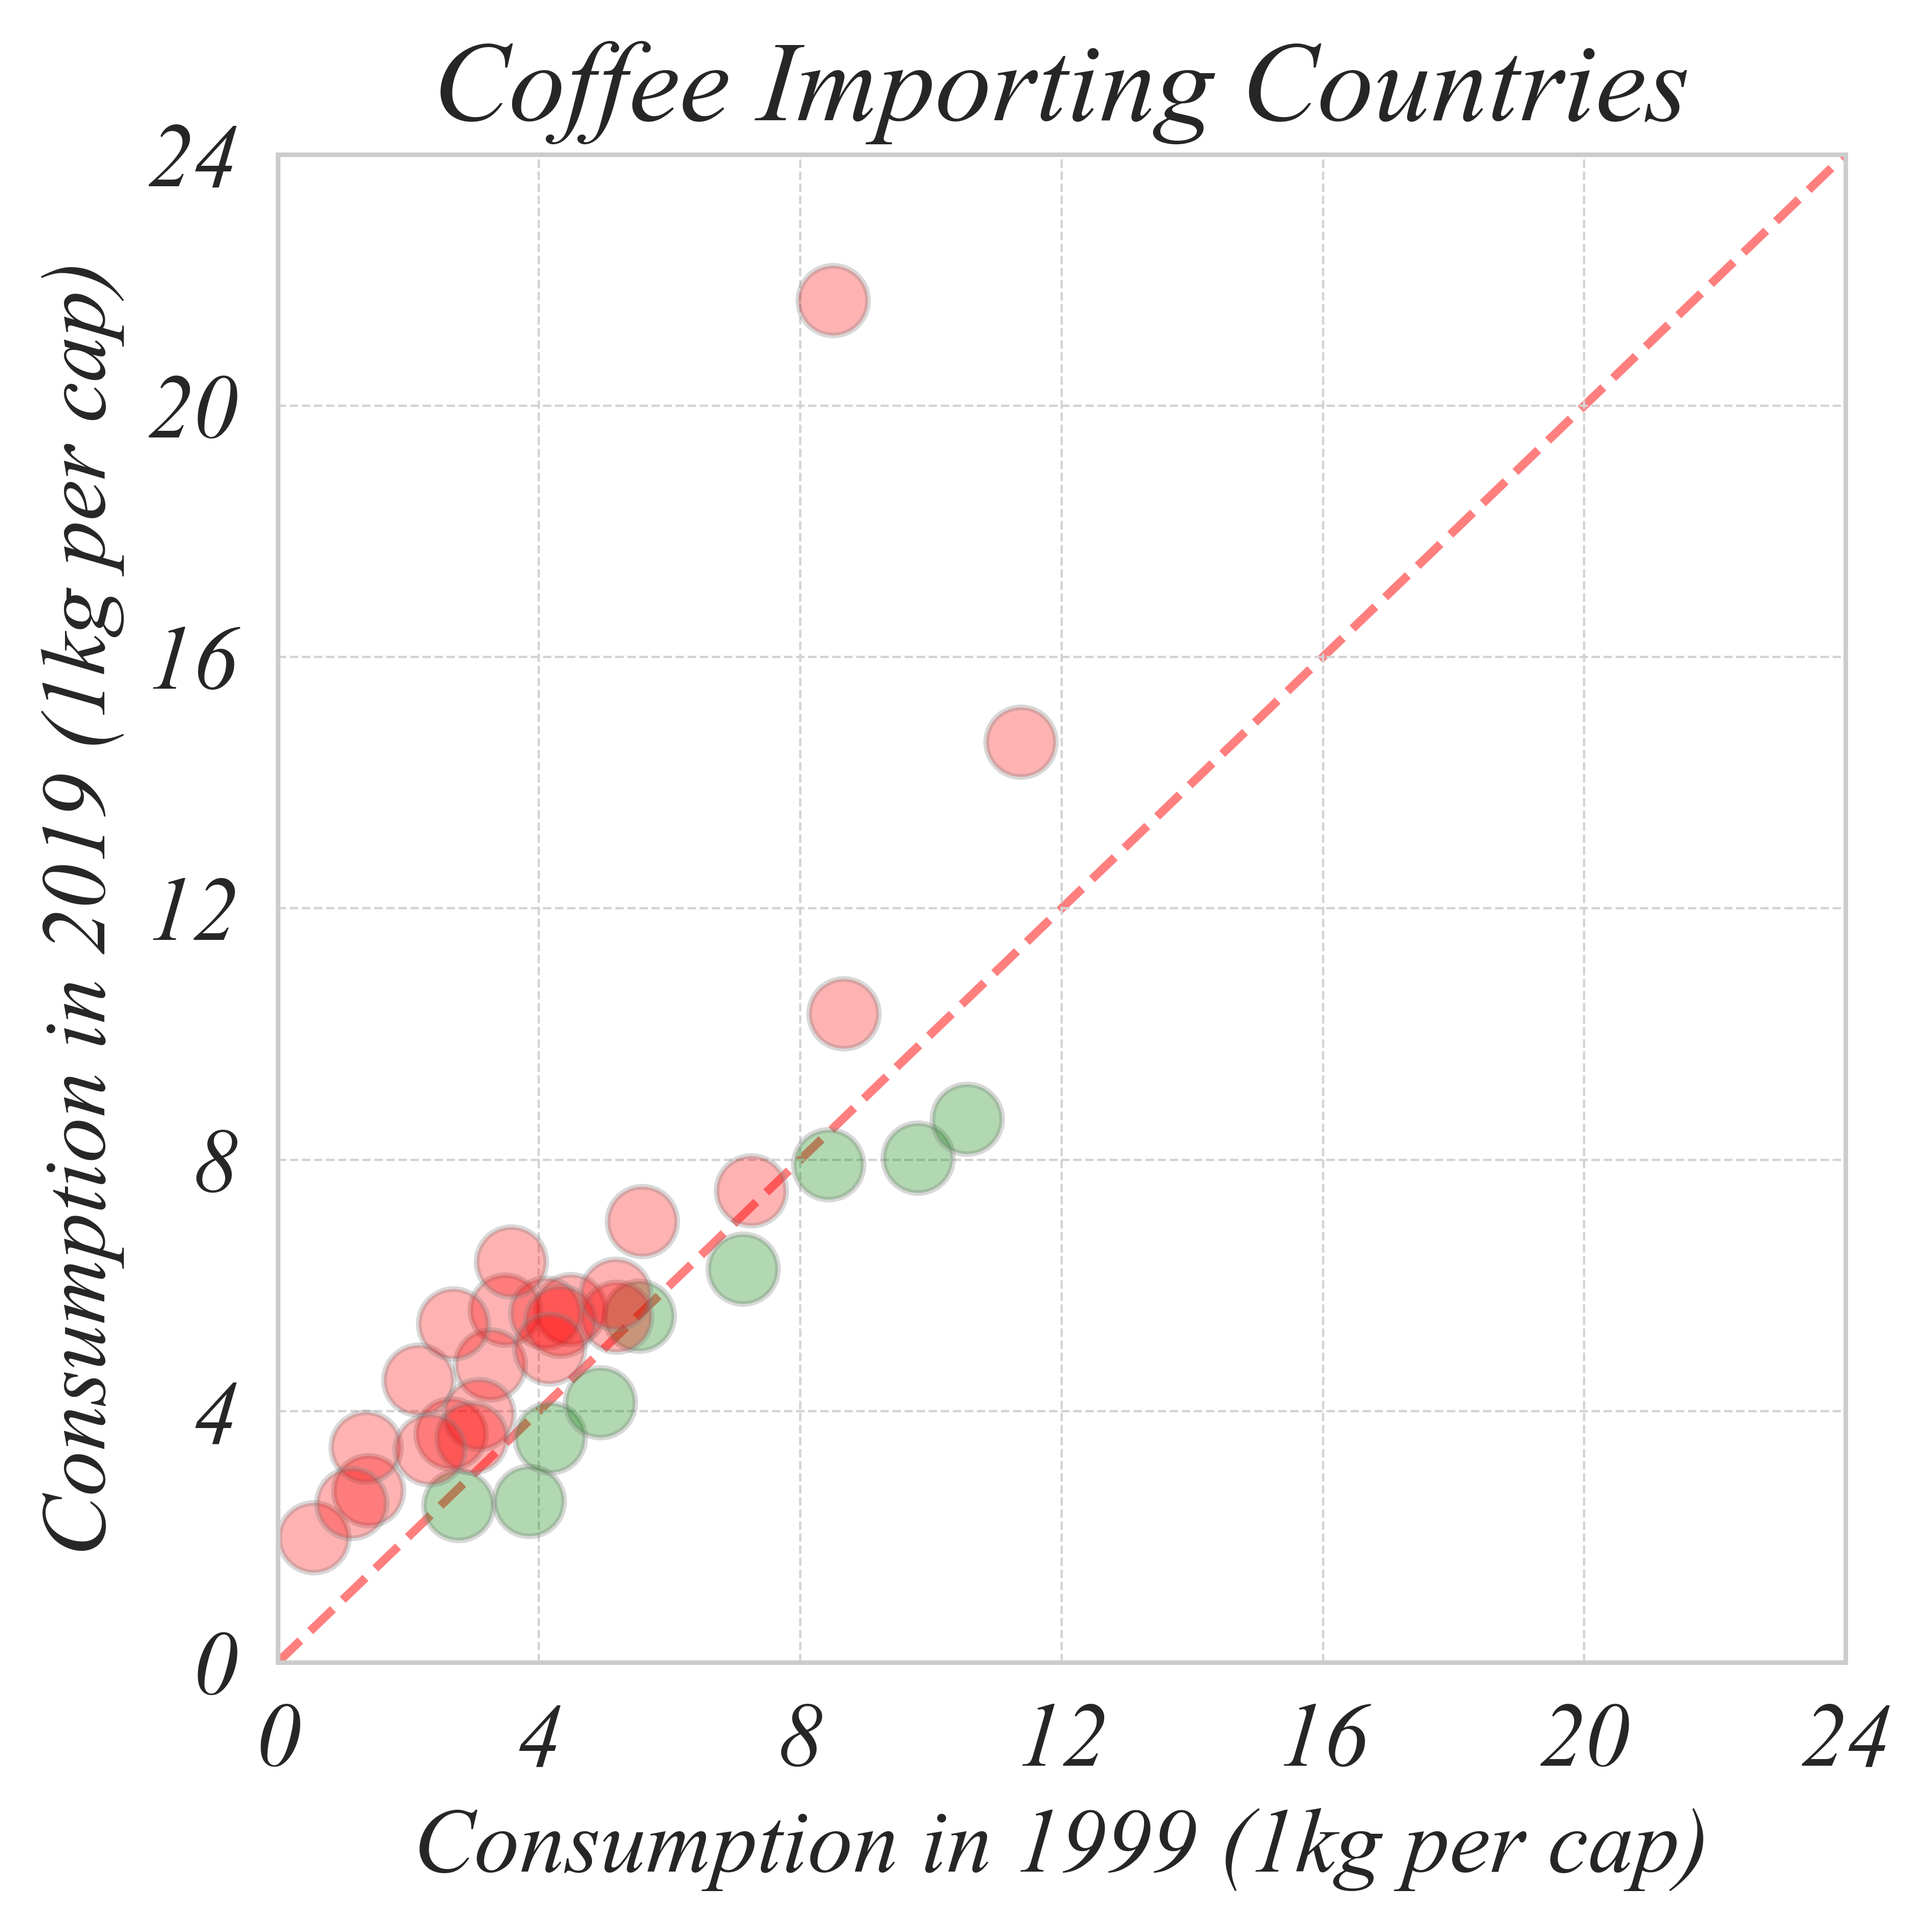

In [54]:
# Load Data
percap = pd.read_csv('data/Coffee_Per_Cap.csv', index_col=0)
increase = percap[percap['1999'] <= percap['2019']]
decrease = percap[percap['1999'] > percap['2019']]

# Figure
plt.figure(figsize=(5, 5), dpi=800)
plt.scatter(decrease['1999'], decrease['2019'], color='green', edgecolors='grey', alpha=0.3, s=150)
plt.scatter(increase['1999'], increase['2019'], color='red', edgecolors='grey', alpha=0.3, s=150)
plt.plot([0,24],[0,24], linestyle='--', color='red', zorder=-1, alpha=0.5)

# Styling
tick_labels = [0, 4, 8, 12, 16, 20, 24]

plt.xlabel('Consumption in 1999 (1kg per cap)')
plt.xticks(ticks=tick_labels, labels=tick_labels)
plt.xlim(0,24)

plt.ylabel('Consumption in 2019 (1kg per cap)')
plt.yticks(ticks=tick_labels, labels=tick_labels)
plt.ylim(0,24)

plt.title('Coffee Importing Countries')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_23.png')

## Homework

In [3]:
data = pd.read_csv('data/working.csv')

In [4]:
data.head()

Entity Code  Year  Average annual working hours per worker
0  Argentina  ARG  1950                                2034.0000
1  Argentina  ARG  1951                                2037.8667
2  Argentina  ARG  1952                                2041.7408
3  Argentina  ARG  1953                                2045.6223
4  Argentina  ARG  1954                                2049.5112

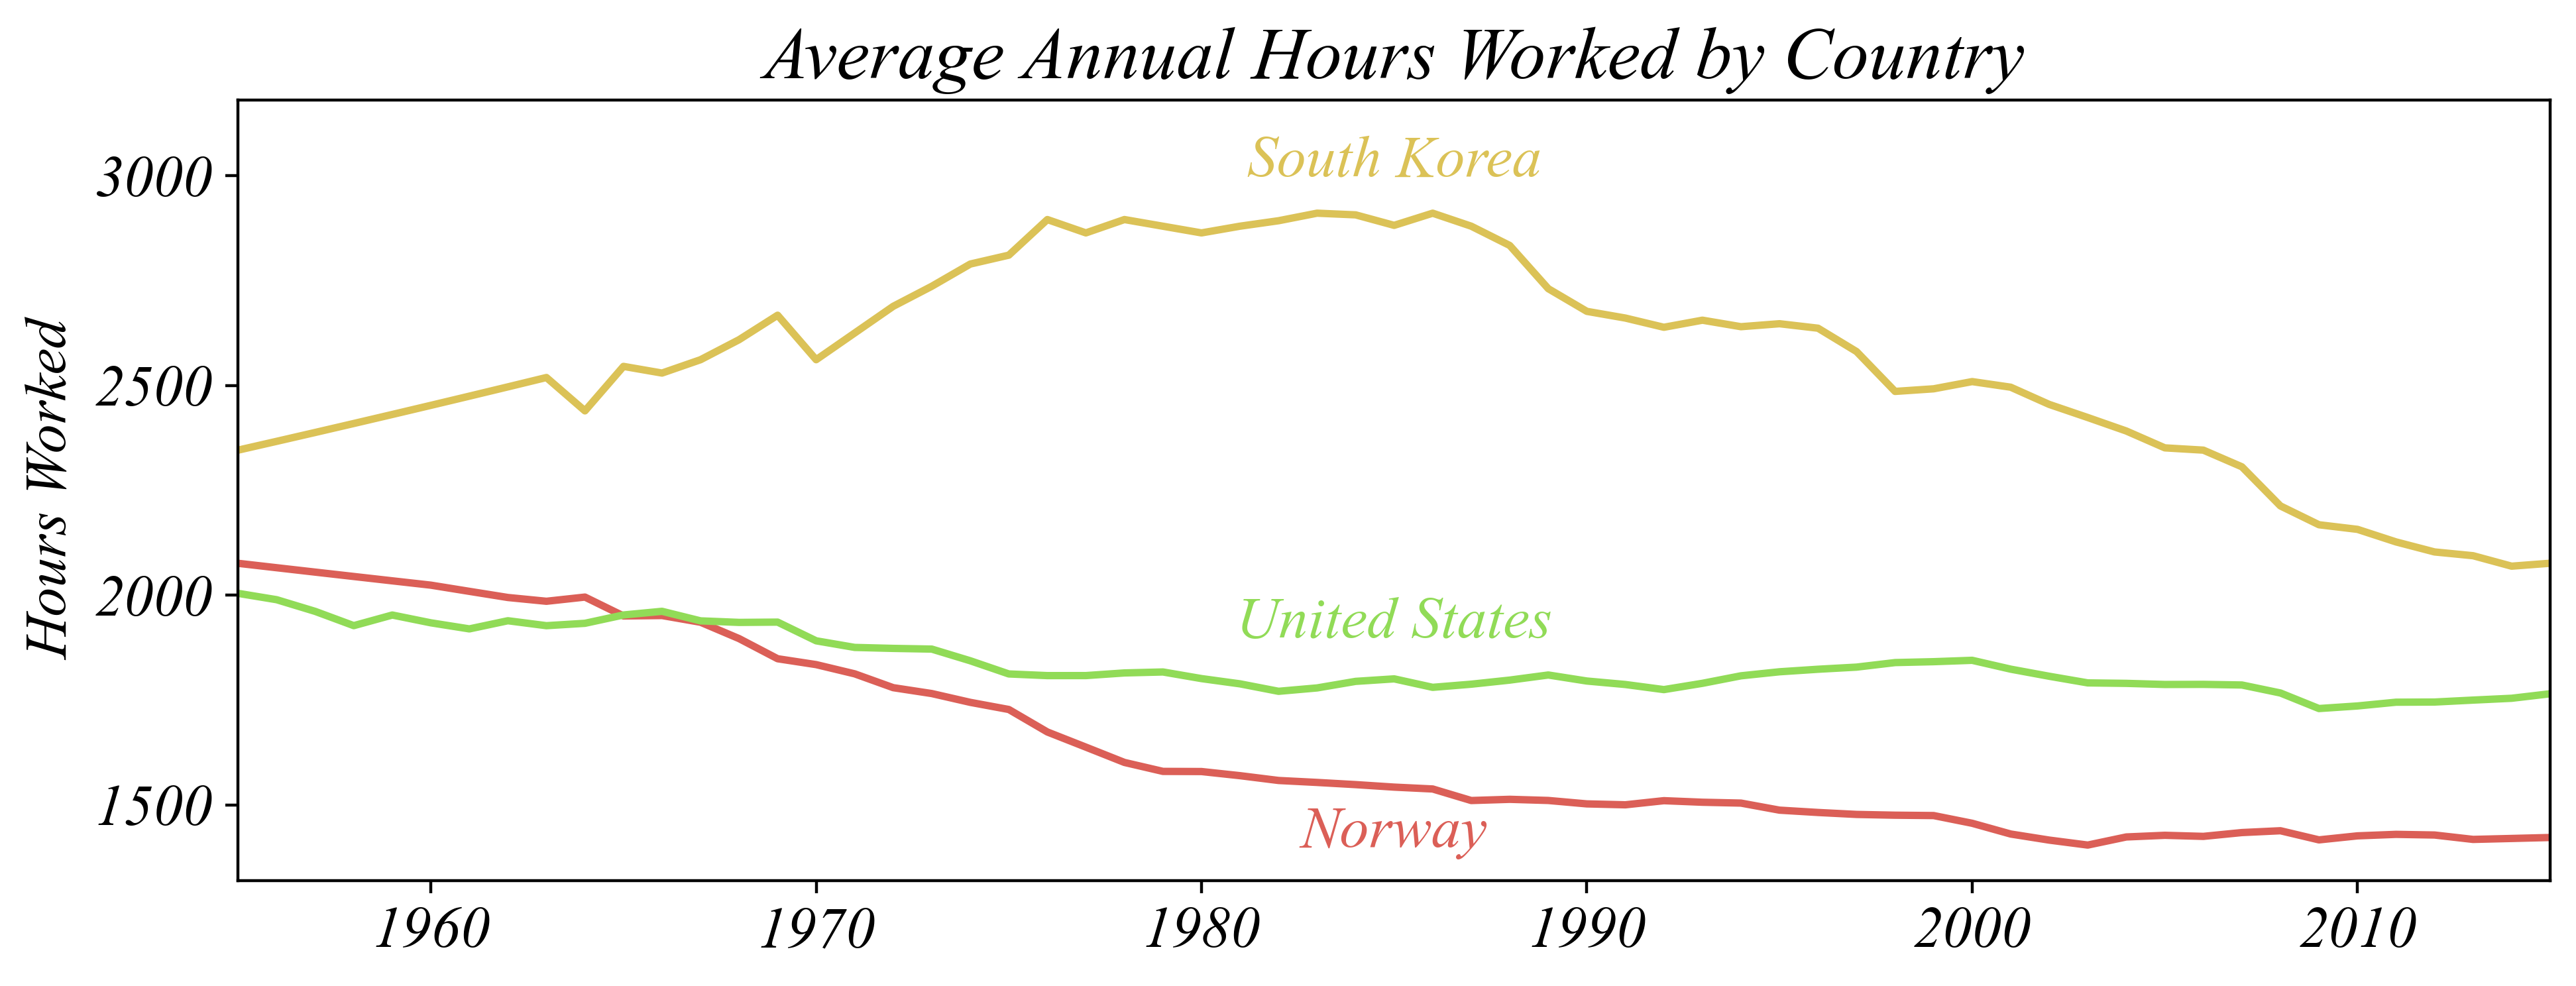

In [5]:
# Load Dataset
working = pd.read_csv('data/working.csv')
working = working[working['Entity'].isin(['South Korea', 'United States', 'Norway'])]

# Figure
plt.figure(figsize=(10, 4))
ax = sns.lineplot(working, x='Year', y='Average annual working hours per worker', hue='Entity', 
             palette=category_color_pal[:3], linewidth=2, legend=False)

# Get colors from the plot lines
line_colors = [line.get_color() for line in ax.get_lines()]

# Get the order of entities (seaborn orders them alphabetically by default)
entities = sorted(working['Entity'].unique())  # ['Norway', 'South Korea', 'United States']

# Create a color mapping
color_map = dict(zip(entities, line_colors))

# Add annotations with matching colors
plt.text(1985, 1400, 'Norway', fontsize=16, ha='center', color=color_map['Norway'])
plt.text(1985, 1900, 'United States', fontsize=16, ha='center', color=color_map['United States'])
plt.text(1985, 3000, 'South Korea', fontsize=16, ha='center', color=color_map['South Korea'])


# Styling
plt.ylabel('')
plt.ylabel('Hours Worked')
plt.xlabel('')
plt.xlim(1955, 2015)
plt.title('Average Annual Hours Worked by Country')
plt.tight_layout()

# Save Figure
plt.savefig('i/hw_01.png')

#### Homework Data

In [31]:
# Load Dataset
working = pd.read_csv('data/working.csv')
working = working[working['Entity'].isin(['Mexico', 'United States', 'Canada'])]
working.to_csv('data/working_north_america.csv')